In [1]:
from pyhive import hive
cursor = hive.connect('localhost').cursor()


In [2]:
cursor.execute('SHOW databases')
print(cursor.fetchall())

[('default',)]


In [3]:
create_table_query = """
CREATE TABLE origin(ip STRING, Time STRING, url STRING, status INT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE"""

In [4]:
cursor.execute(create_table_query)

In [5]:
cursor.execute("DESCRIBE ORIGIN")

In [6]:
print(cursor.fetchall())

[('ip', 'string', ''), ('time', 'string', ''), ('url', 'string', ''), ('status', 'int', '')]


In [7]:
load_data_query = """
LOAD DATA INPATH '/user/data/weblog.csv'
OVERWRITE INTO TABLE origin"""

In [8]:
cursor.execute(load_data_query)

In [9]:
cursor.execute("SELECT * FROM origin LIMIT 3")
print(cursor.fetchall())

[('IP', 'Time', 'URL', None), ('10.128.2.1', '[29/Nov/2017:06:58:55', 'GET /login.php HTTP/1.1', 200), ('10.128.2.1', '[29/Nov/2017:06:59:02', 'POST /process.php HTTP/1.1', 302)]


In [10]:
create_table_query2 = """
CREATE TABLE origin2(ip STRING, Time STRING, url STRING, status INT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE"""
load_data_query2 = """
LOAD DATA INPATH '/user/data/webLog.csv'
OVERWRITE INTO TABLE origin2"""

In [11]:
cursor.execute(create_table_query2)
cursor.execute(load_data_query2)

In [12]:
cursor.execute("SELECT count(*) from origin")
print(cursor.fetchall())

[(16008,)]


In [13]:
# cursor.execute("DROP TABLE origin")
# cursor.execute("DROP TABLE origin2")

In [14]:
weblog_table_query = """
CREATE TABLE weblog(ip STRING,

month STRING, year STRING, hour STRING, method STRING, page STRING, status INT)

 ROW FORMAT DELIMITED

 FIELDS TERMINATED BY ','

 LINES TERMINATED BY '\n'

 STORED AS TEXTFILE"""

In [15]:
cursor.execute(weblog_table_query)

In [16]:
insert_query1 = """
insert into weblog select ip, split(time,'[/]')[1] as month, substring(split(time,'[/]')[2],0,4) as year, substring(split(time,'[/]')[2],6,2) as hour, split(url,' ')[0] as method, split(split(url,' ')[1],'[?]')[0] as page, status from origin where ip like '%.%.%.%'"""
insert_query2 = """
insert into weblog select ip, split(time,'[/]')[1] as month, substring(split(time,'[/]')[2],0,4) as year, substring(split(time,'[/]')[2],6,2) as hour, split(url,' ')[0] as method, split(split(url,' ')[1],'[?]')[0] as page, status from origin2 where ip like '%.%.%.%'"""

In [17]:
cursor.execute(insert_query1)
cursor.execute(insert_query2)

In [18]:
cursor.execute("SELECT * from weblog LIMIT 3")
print(cursor.fetchall())

[('10.128.2.1', 'Nov', '2017', '06', 'GET', '/login.php', 200), ('10.128.2.1', 'Nov', '2017', '06', 'POST', '/process.php', 302), ('10.128.2.1', 'Nov', '2017', '06', 'GET', '/home.php', 200)]


In [21]:
data_query = """SELECT COUNT(1), ip FROM weblog GROUP BY ip;
SELECT COUNT(1), ip, hour FROM weblog GROUP BY ip, hour CLUSTER BY ip;
SELECT COUNT(1), ip, month FROM weblog GROUP BY ip, month CLUSTER BY ip;
SELECT COUNT(1), ip, year FROM weblog GROUP BY ip, year CLUSTER BY ip;
SELECT COUNT(1), ip, method FROM weblog GROUP BY ip, method CLUSTER BY ip;
SELECT COUNT(1), ip, page FROM weblog GROUP BY ip, page CLUSTER BY ip;
SELECT COUNT(1), ip, status FROM weblog GROUP BY ip, status CLUSTER BY ip;
SELECT COUNT(1), hour FROM weblog GROUP BY hour;
SELECT COUNT(1), hour, ip FROM weblog GROUP BY hour, ip CLUSTER BY hour;
SELECT COUNT(1), hour, month FROM weblog GROUP BY hour, month CLUSTER BY hour;
SELECT COUNT(1), hour, year FROM weblog GROUP BY hour, year CLUSTER BY hour;
SELECT COUNT(1), hour, method FROM weblog GROUP BY hour, method CLUSTER BY hour;
SELECT COUNT(1), hour, page FROM weblog GROUP BY hour, page CLUSTER BY hour;
SELECT COUNT(1), hour, status FROM weblog GROUP BY hour, status CLUSTER BY hour;
SELECT COUNT(1), month FROM weblog GROUP BY month;
SELECT COUNT(1), month, ip FROM weblog GROUP BY month, ip CLUSTER BY month;
SELECT COUNT(1), month, hour FROM weblog GROUP BY month, hour CLUSTER BY month;
SELECT COUNT(1), month, year FROM weblog GROUP BY month, year CLUSTER BY month;
SELECT COUNT(1), month, method FROM weblog GROUP BY month, method CLUSTER BY month;
SELECT COUNT(1), month, page FROM weblog GROUP BY month, page CLUSTER BY month;
SELECT COUNT(1), month, status FROM weblog GROUP BY month, status CLUSTER BY month;
SELECT COUNT(1), year FROM weblog GROUP BY year;
SELECT COUNT(1), year, ip FROM weblog GROUP BY year, ip CLUSTER BY year;
SELECT COUNT(1), year, hour FROM weblog GROUP BY year, hour CLUSTER BY year;
SELECT COUNT(1), year, month FROM weblog GROUP BY year, month CLUSTER BY year;
SELECT COUNT(1), year, method FROM weblog GROUP BY year, method CLUSTER BY year;
SELECT COUNT(1), year, page FROM weblog GROUP BY year, page CLUSTER BY year;
SELECT COUNT(1), year, status FROM weblog GROUP BY year, status CLUSTER BY year;
SELECT COUNT(1), method FROM weblog GROUP BY method;
SELECT COUNT(1), method, ip FROM weblog GROUP BY method, ip CLUSTER BY method;
SELECT COUNT(1), method, hour FROM weblog GROUP BY method, hour CLUSTER BY method;
SELECT COUNT(1), method, month FROM weblog GROUP BY method, month CLUSTER BY method;
SELECT COUNT(1), method, year FROM weblog GROUP BY method, year CLUSTER BY method;
SELECT COUNT(1), method, page FROM weblog GROUP BY method, page CLUSTER BY method;
SELECT COUNT(1), method, status FROM weblog GROUP BY method, status CLUSTER BY method;
SELECT COUNT(1), page FROM weblog GROUP BY page;
SELECT COUNT(1), page, ip FROM weblog GROUP BY page, ip CLUSTER BY page;
SELECT COUNT(1), page, hour FROM weblog GROUP BY page, hour CLUSTER BY page;
SELECT COUNT(1), page, month FROM weblog GROUP BY page, month CLUSTER BY page;
SELECT COUNT(1), page, year FROM weblog GROUP BY page, year CLUSTER BY page;
SELECT COUNT(1), page, method FROM weblog GROUP BY page, method CLUSTER BY page;
SELECT COUNT(1), page, status FROM weblog GROUP BY page, status CLUSTER BY page;
SELECT COUNT(1), status FROM weblog GROUP BY status;
SELECT COUNT(1), status, ip FROM weblog GROUP BY status, ip CLUSTER BY status;
SELECT COUNT(1), status, hour FROM weblog GROUP BY status, hour CLUSTER BY status;
SELECT COUNT(1), status, month FROM weblog GROUP BY status, month CLUSTER BY status;
SELECT COUNT(1), status, year FROM weblog GROUP BY status, year CLUSTER BY status;
SELECT COUNT(1), status, method FROM weblog GROUP BY status, method CLUSTER BY status;
SELECT COUNT(1), status, page FROM weblog GROUP BY status, page CLUSTER BY status;
"""

In [22]:
queries = data_query.split(";\n")
for i, query in enumerate(queries):
    print(f"{i}st : {query}")

0st : SELECT COUNT(1), ip FROM weblog GROUP BY ip
1st : SELECT COUNT(1), ip, hour FROM weblog GROUP BY ip, hour CLUSTER BY ip
2st : SELECT COUNT(1), ip, month FROM weblog GROUP BY ip, month CLUSTER BY ip
3st : SELECT COUNT(1), ip, year FROM weblog GROUP BY ip, year CLUSTER BY ip
4st : SELECT COUNT(1), ip, method FROM weblog GROUP BY ip, method CLUSTER BY ip
5st : SELECT COUNT(1), ip, page FROM weblog GROUP BY ip, page CLUSTER BY ip
6st : SELECT COUNT(1), ip, status FROM weblog GROUP BY ip, status CLUSTER BY ip
7st : SELECT COUNT(1), hour FROM weblog GROUP BY hour
8st : SELECT COUNT(1), hour, ip FROM weblog GROUP BY hour, ip CLUSTER BY hour
9st : SELECT COUNT(1), hour, month FROM weblog GROUP BY hour, month CLUSTER BY hour
10st : SELECT COUNT(1), hour, year FROM weblog GROUP BY hour, year CLUSTER BY hour
11st : SELECT COUNT(1), hour, method FROM weblog GROUP BY hour, method CLUSTER BY hour
12st : SELECT COUNT(1), hour, page FROM weblog GROUP BY hour, page CLUSTER BY hour
13st : SELECT C

In [25]:
answer_list = list()
for query in queries:
    cursor.execute(query)
    answer_list.append(cursor.fetchall())

OperationalError: TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=["*org.apache.hive.service.cli.HiveSQLException:Error while compiling statement: FAILED: ParseException line 1:0 cannot recognize input near '<EOF>' '<EOF>' '<EOF>':28:27", 'org.apache.hive.service.cli.operation.Operation:toSQLException:Operation.java:380', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:206', 'org.apache.hive.service.cli.operation.SQLOperation:runInternal:SQLOperation.java:290', 'org.apache.hive.service.cli.operation.Operation:run:Operation.java:320', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatementInternal:HiveSessionImpl.java:530', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatement:HiveSessionImpl.java:506', 'sun.reflect.GeneratedMethodAccessor28:invoke::-1', 'sun.reflect.DelegatingMethodAccessorImpl:invoke:DelegatingMethodAccessorImpl.java:43', 'java.lang.reflect.Method:invoke:Method.java:498', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:78', 'org.apache.hive.service.cli.session.HiveSessionProxy:access$000:HiveSessionProxy.java:36', 'org.apache.hive.service.cli.session.HiveSessionProxy$1:run:HiveSessionProxy.java:63', 'java.security.AccessController:doPrivileged:AccessController.java:-2', 'javax.security.auth.Subject:doAs:Subject.java:422', 'org.apache.hadoop.security.UserGroupInformation:doAs:UserGroupInformation.java:1886', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:59', 'com.sun.proxy.$Proxy35:executeStatement::-1', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:280', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatement:ThriftCLIService.java:531', 'org.apache.hive.service.rpc.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1437', 'org.apache.hive.service.rpc.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1422', 'org.apache.thrift.ProcessFunction:process:ProcessFunction.java:39', 'org.apache.thrift.TBaseProcessor:process:TBaseProcessor.java:39', 'org.apache.hive.service.auth.TSetIpAddressProcessor:process:TSetIpAddressProcessor.java:56', 'org.apache.thrift.server.TThreadPoolServer$WorkerProcess:run:TThreadPoolServer.java:286', 'java.util.concurrent.ThreadPoolExecutor:runWorker:ThreadPoolExecutor.java:1149', 'java.util.concurrent.ThreadPoolExecutor$Worker:run:ThreadPoolExecutor.java:624', 'java.lang.Thread:run:Thread.java:748', "*org.apache.hadoop.hive.ql.parse.ParseException:line 1:0 cannot recognize input near '<EOF>' '<EOF>' '<EOF>':33:6", 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:211', 'org.apache.hadoop.hive.ql.parse.ParseUtils:parse:ParseUtils.java:77', 'org.apache.hadoop.hive.ql.parse.ParseUtils:parse:ParseUtils.java:70', 'org.apache.hadoop.hive.ql.Driver:compile:Driver.java:468', 'org.apache.hadoop.hive.ql.Driver:compileInternal:Driver.java:1317', 'org.apache.hadoop.hive.ql.Driver:compileAndRespond:Driver.java:1295', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:204'], sqlState='42000', errorCode=40000, errorMessage="Error while compiling statement: FAILED: ParseException line 1:0 cannot recognize input near '<EOF>' '<EOF>' '<EOF>'"), operationHandle=None)

In [27]:
len(answer_list)

49

In [72]:
answer_list

[[(2416, '"10.128.2.1"'),
  (1652, '"10.129.2.1"'),
  (2493, '"10.130.2.1"'),
  (2600, '"10.131.0.1"'),
  (1626, '"10.131.2.1"'),
  (4257, '10.128.2.1'),
  (1652, '10.129.2.1'),
  (4056, '10.130.2.1'),
  (4198, '10.131.0.1'),
  (1626, '10.131.2.1')],
 [(25, '"10.128.2.1"', '00'),
  (13, '"10.128.2.1"', '01'),
  (17, '"10.128.2.1"', '02'),
  (17, '"10.128.2.1"', '03'),
  (36, '"10.128.2.1"', '04'),
  (59, '"10.128.2.1"', '05'),
  (47, '"10.128.2.1"', '06'),
  (57, '"10.128.2.1"', '07'),
  (70, '"10.128.2.1"', '08'),
  (33, '"10.128.2.1"', '09'),
  (25, '"10.128.2.1"', '10'),
  (55, '"10.128.2.1"', '11'),
  (147, '"10.128.2.1"', '12'),
  (131, '"10.128.2.1"', '13'),
  (102, '"10.128.2.1"', '14'),
  (292, '"10.128.2.1"', '15'),
  (222, '"10.128.2.1"', '16'),
  (137, '"10.128.2.1"', '17'),
  (131, '"10.128.2.1"', '18'),
  (112, '"10.128.2.1"', '19'),
  (589, '"10.128.2.1"', '20'),
  (41, '"10.128.2.1"', '21'),
  (37, '"10.128.2.1"', '22'),
  (21, '"10.128.2.1"', '23'),
  (11, '"10.129.2.1"

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
def total_bar(index):
    x = list(map(lambda x: str(x[1]) , answer_list[index]))
    y = list(map(lambda x: x[0], answer_list[index]))
    plt.figure()
    plt.bar(x, y)
    plt.show()

In [92]:
def detail_bar(index):
    
    dom = list(set(list(map(lambda x: x[1], answer_list[index]))))

    for title in dom:
        x = [str(value[2]) for value in answer_list[index] if value[1] == title]
#         print(x)
        y = [value[0] for value in answer_list[index] if value[1] == title]
#         print(y)
        plt.figure()
        plt.bar(x, y)
        plt.title(title)
        plt.show()

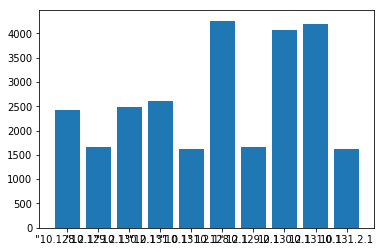

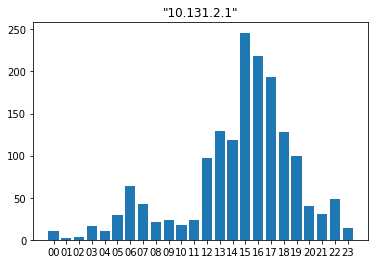

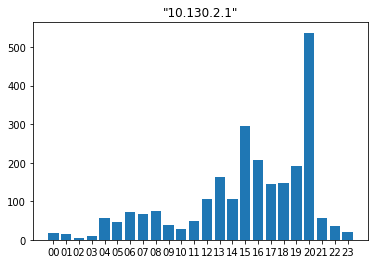

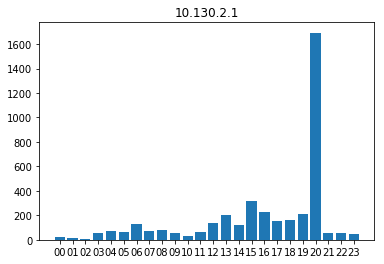

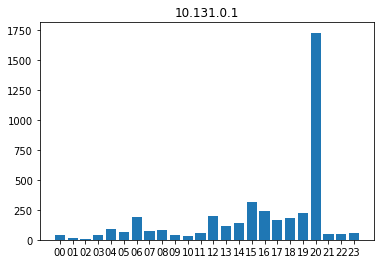

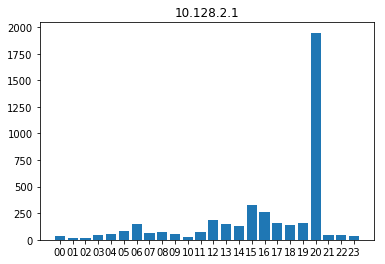

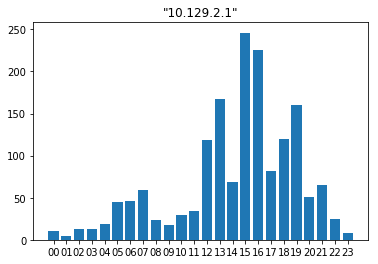

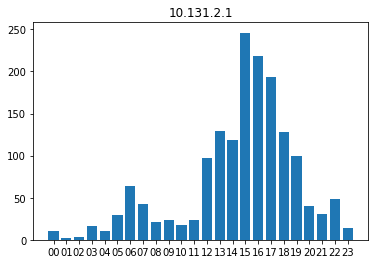

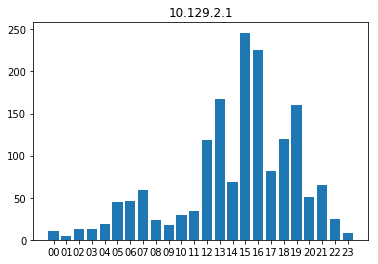

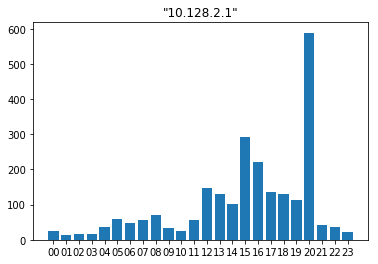

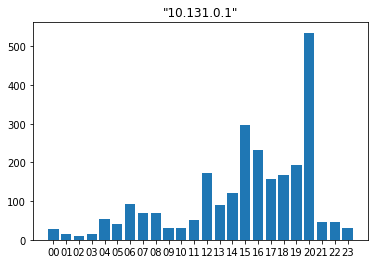

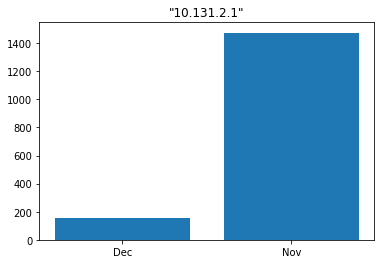

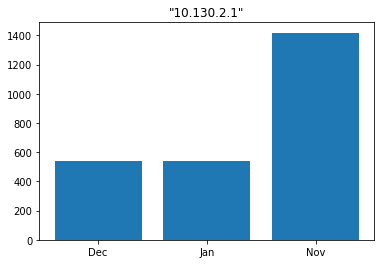

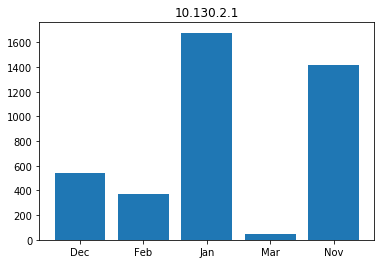

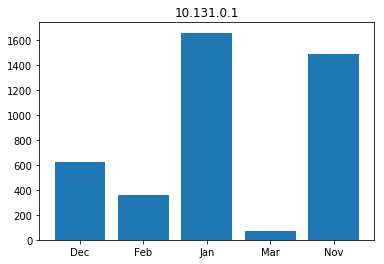

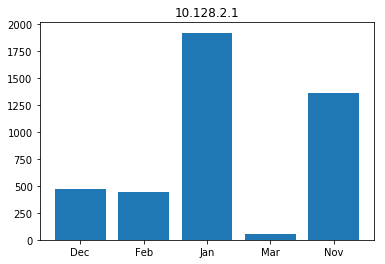

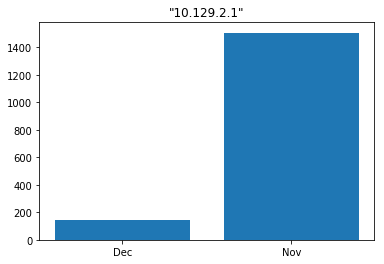

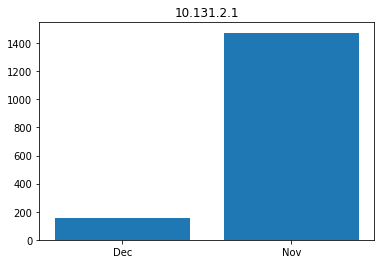

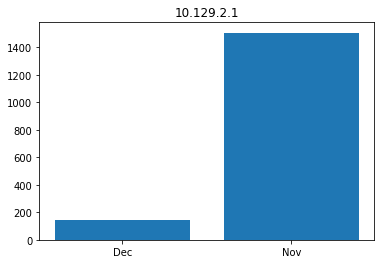

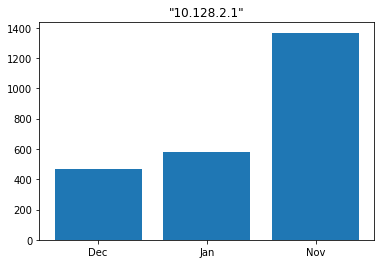

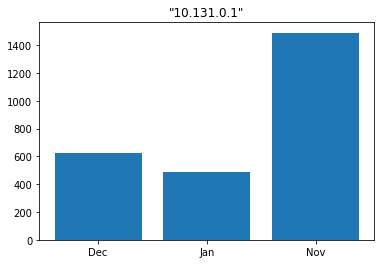

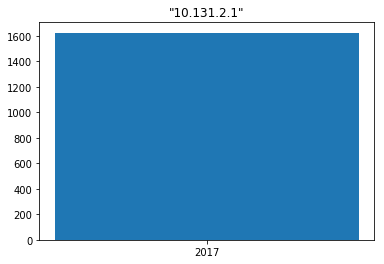

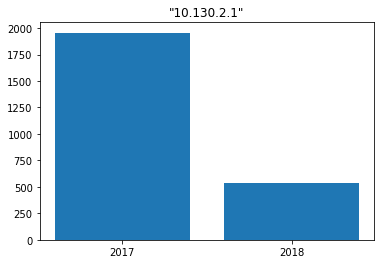

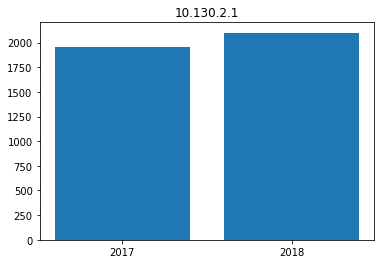

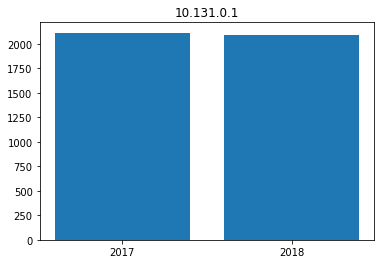

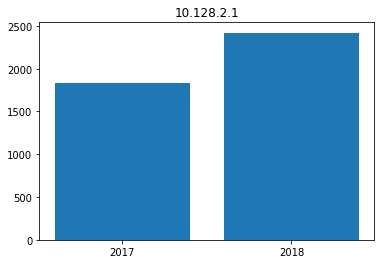

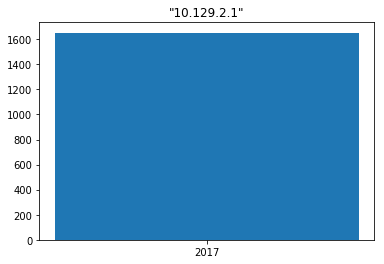

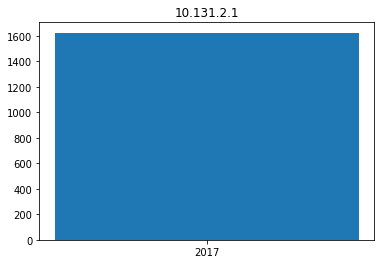

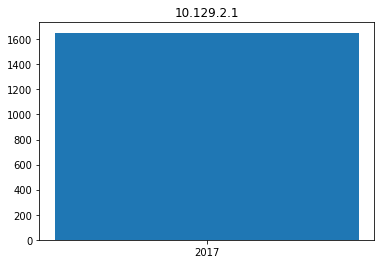

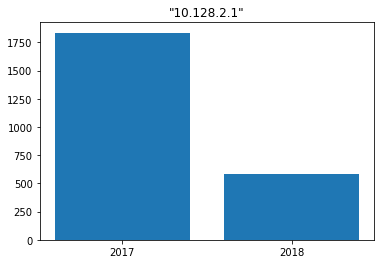

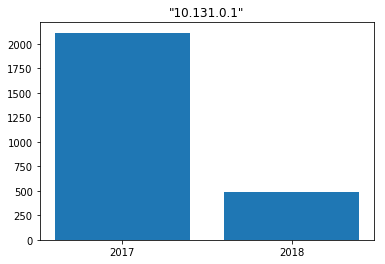

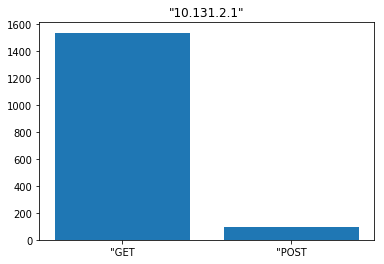

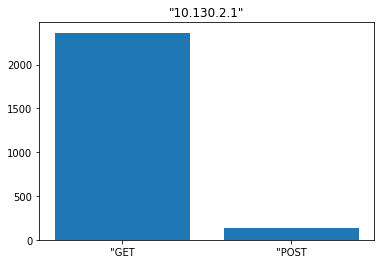

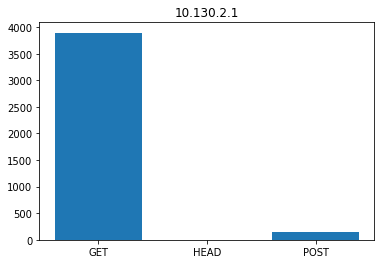

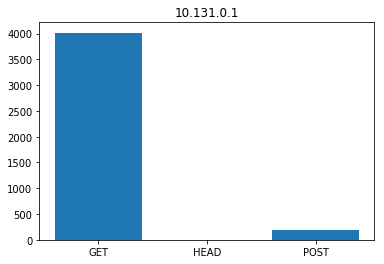

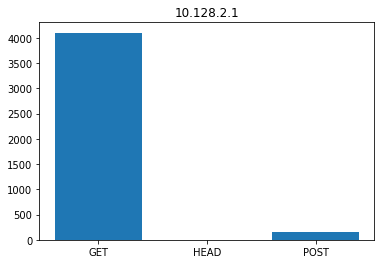

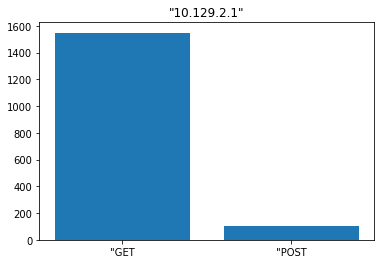

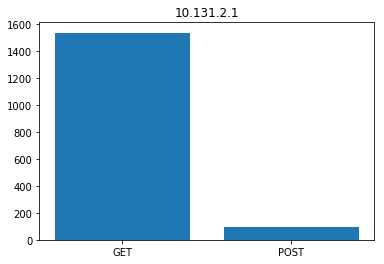

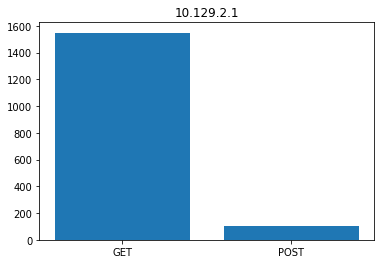

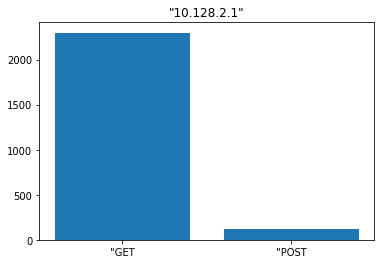

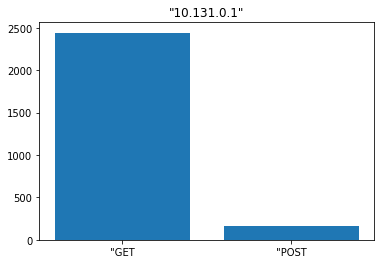

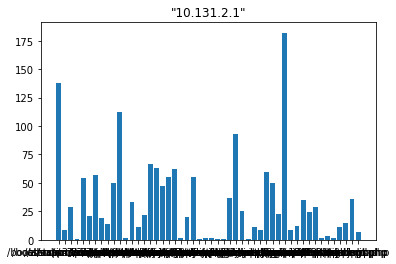

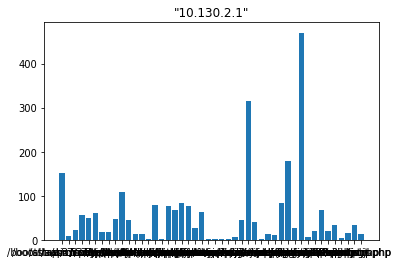

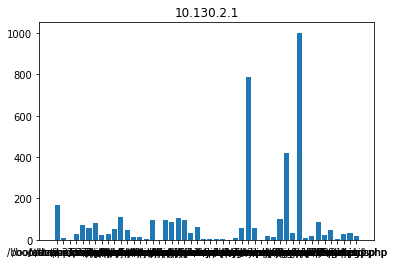

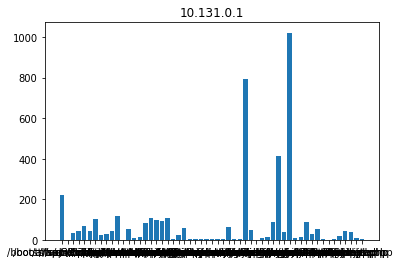

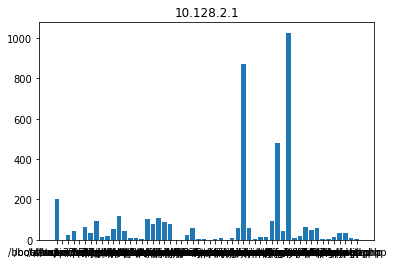

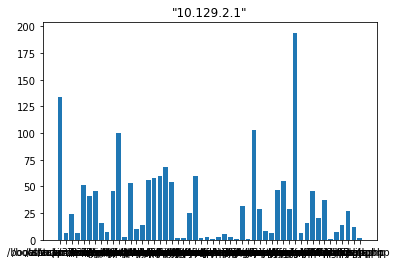

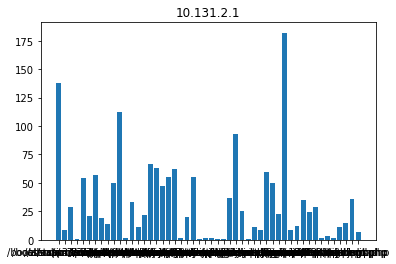

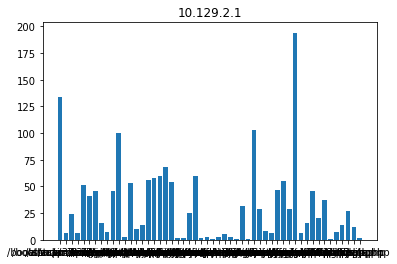

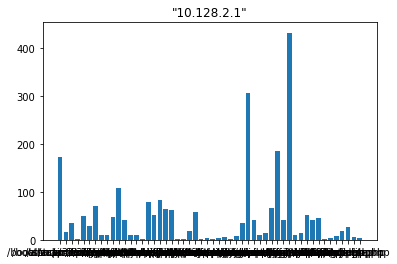

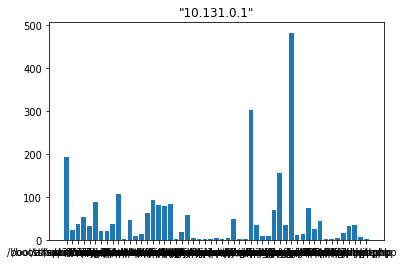

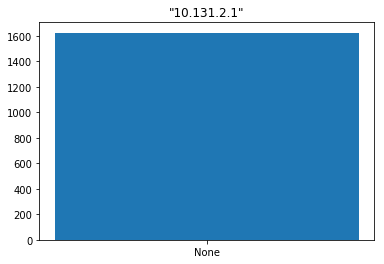

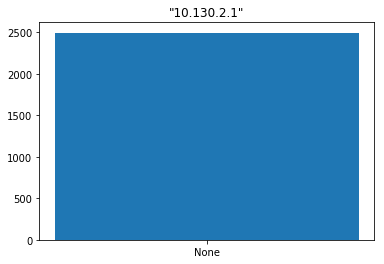

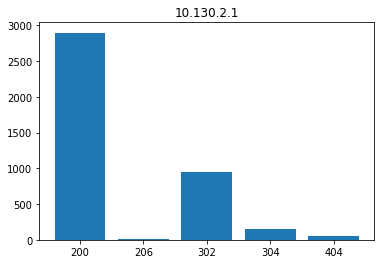

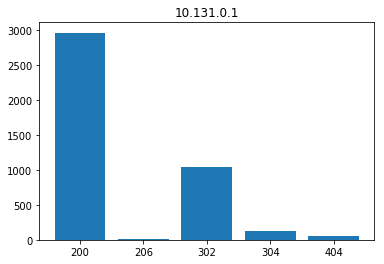

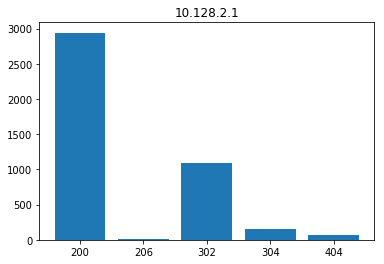

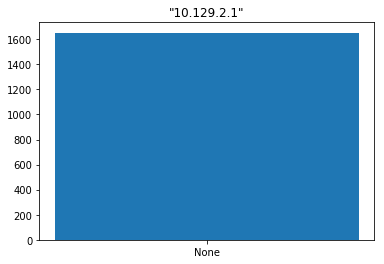

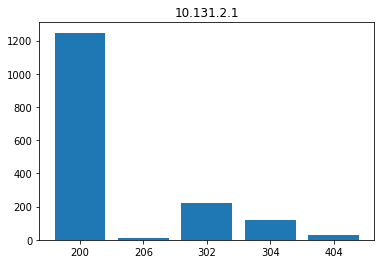

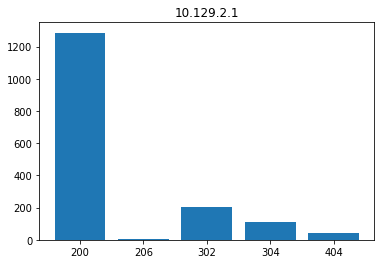

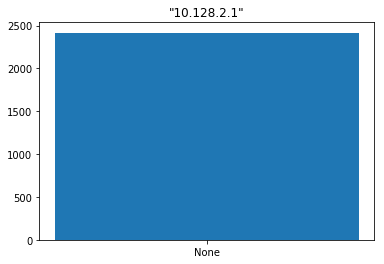

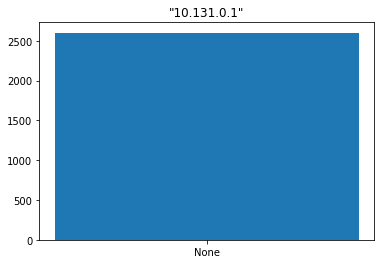

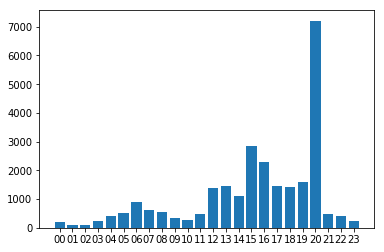

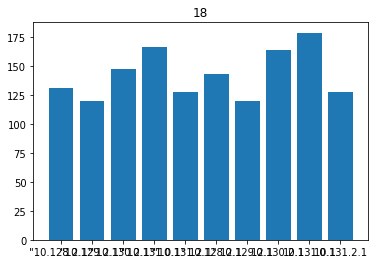

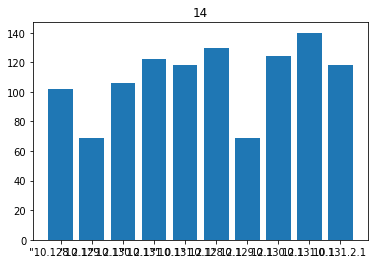

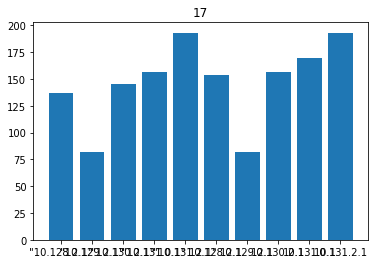

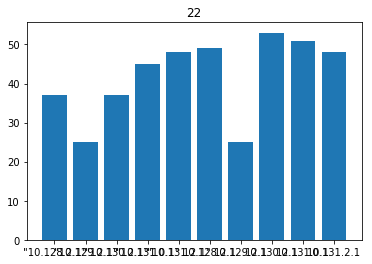

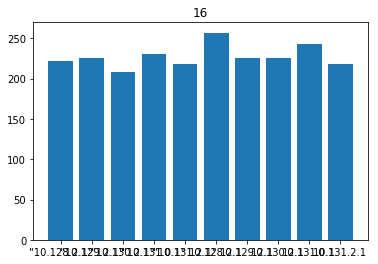

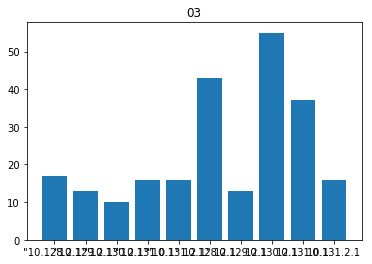

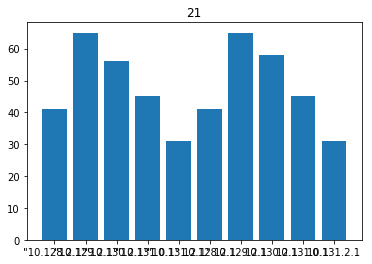

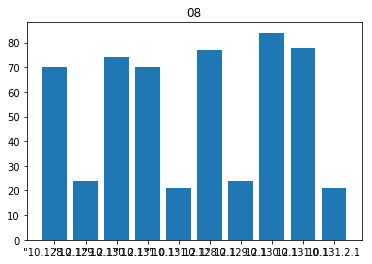

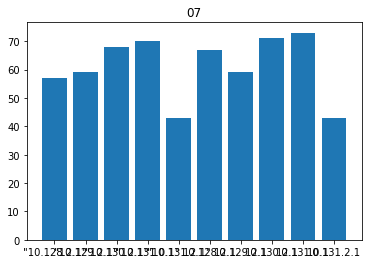

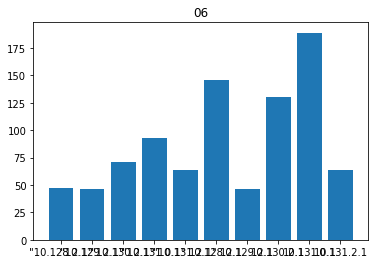

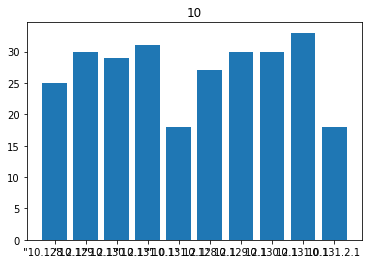

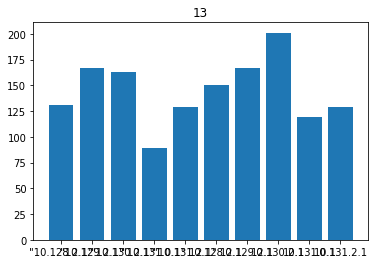

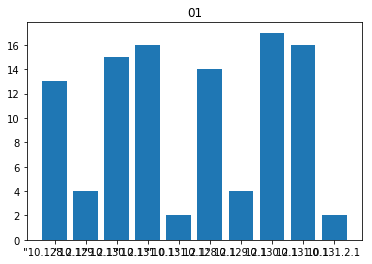

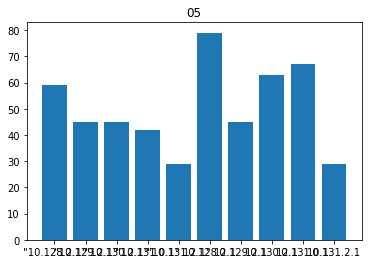

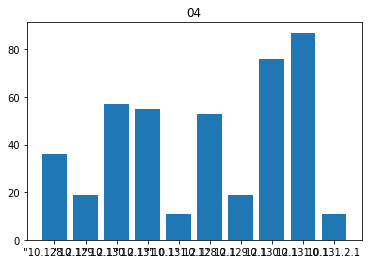

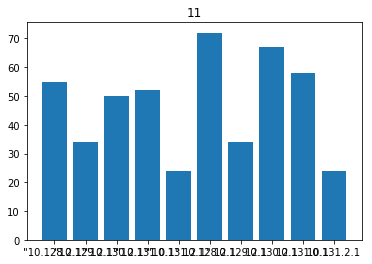

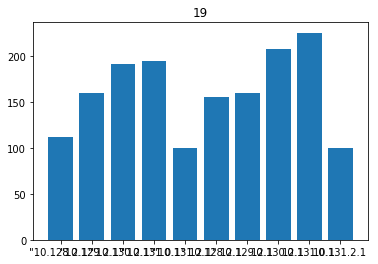

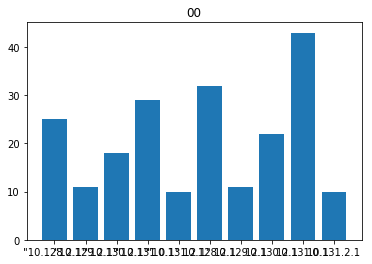

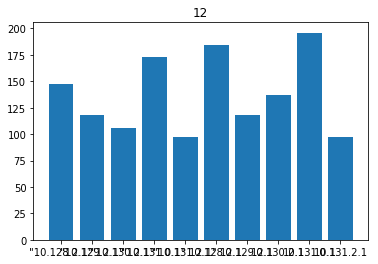

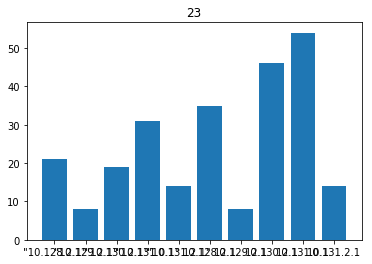

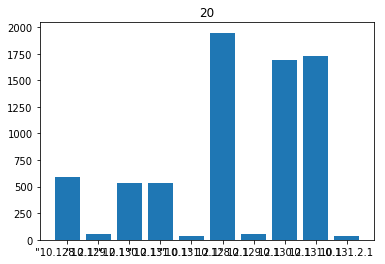

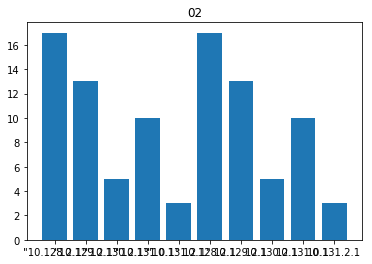

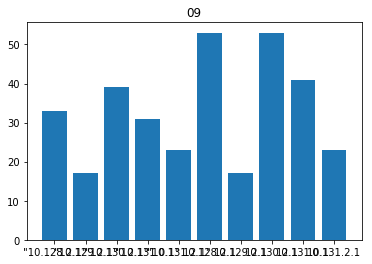

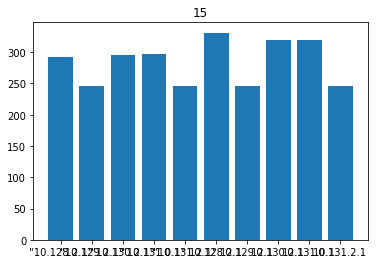

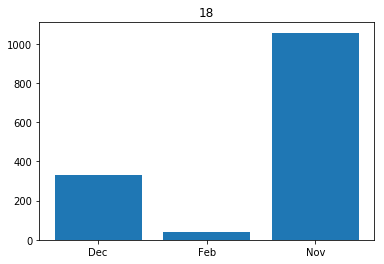

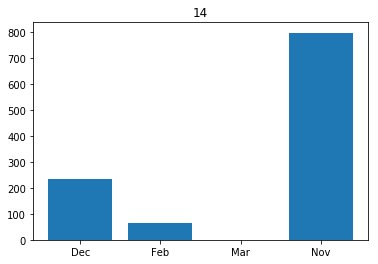

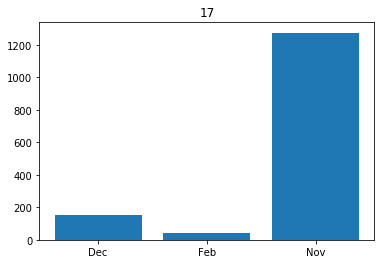

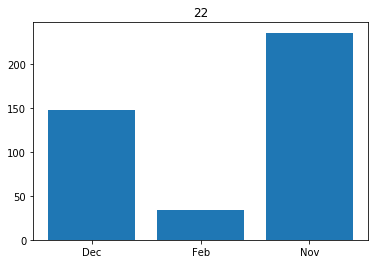

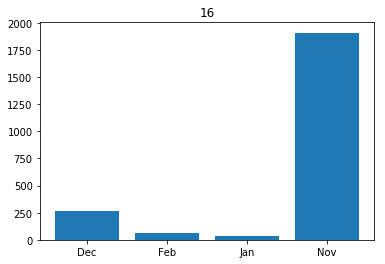

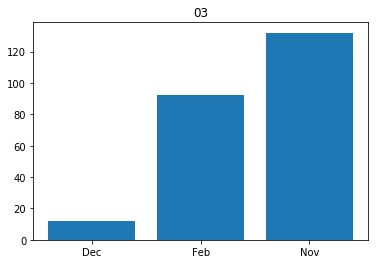

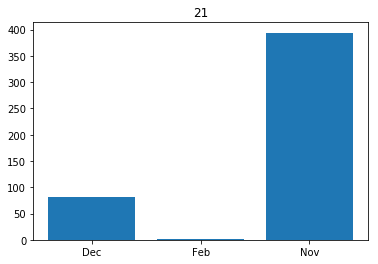

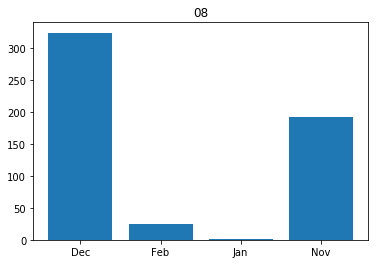

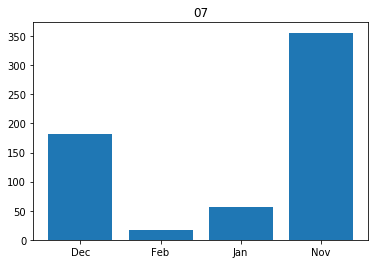

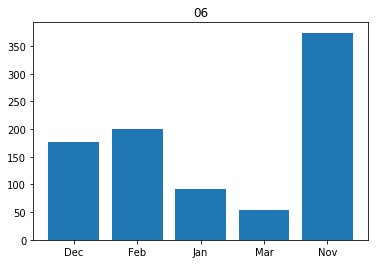

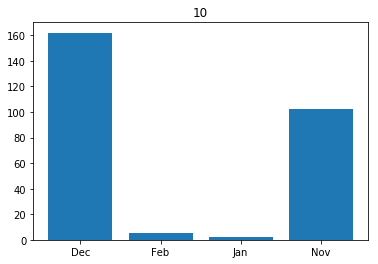

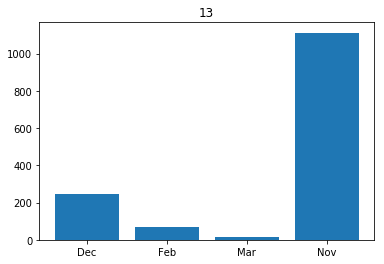

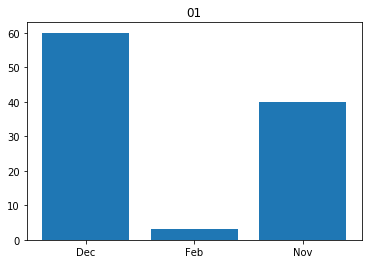

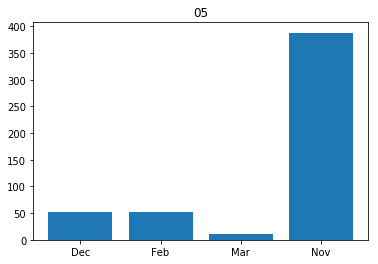

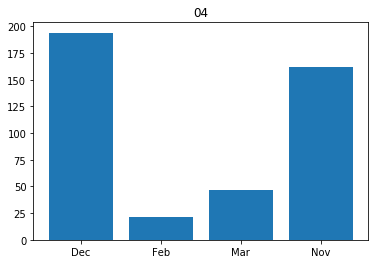

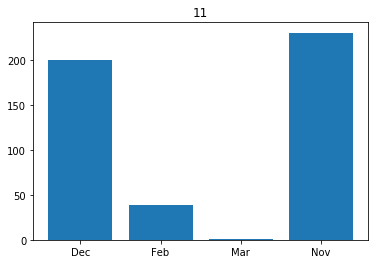

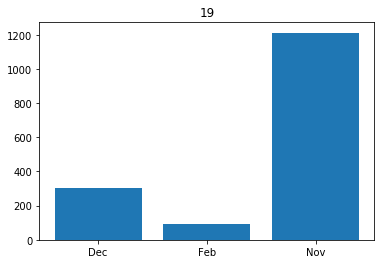

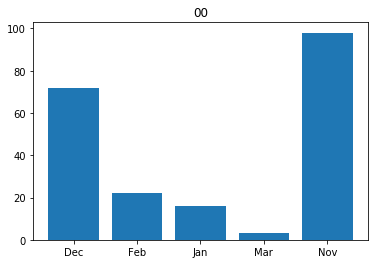

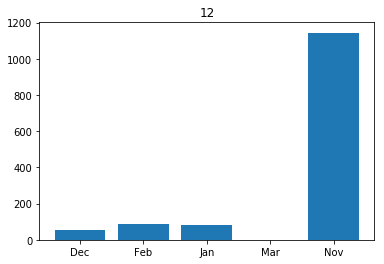

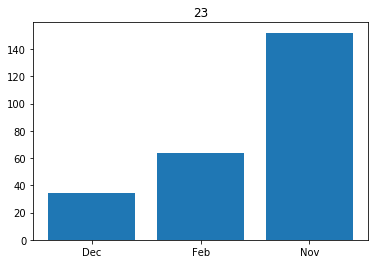

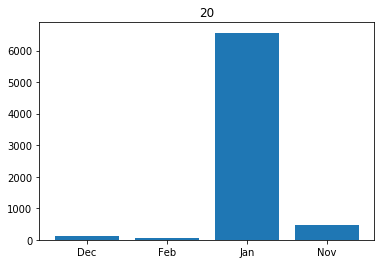

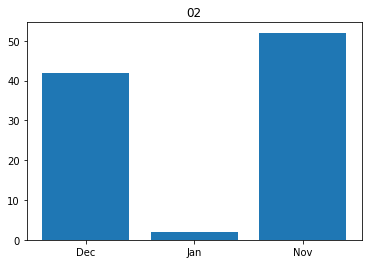

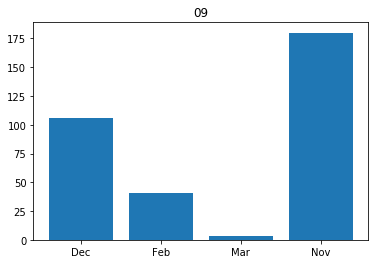

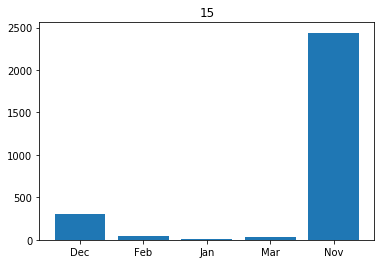

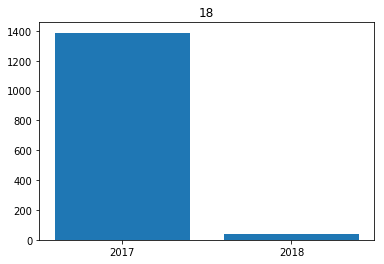

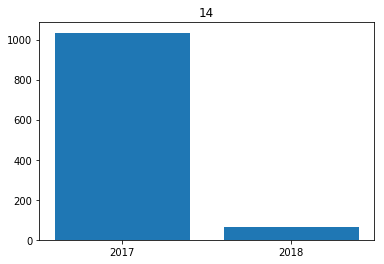

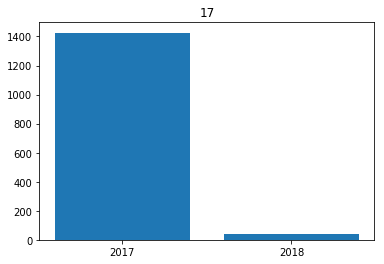

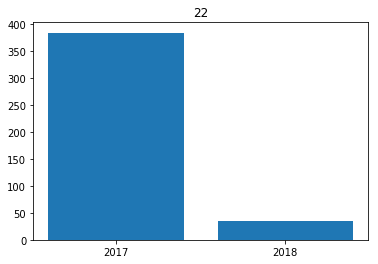

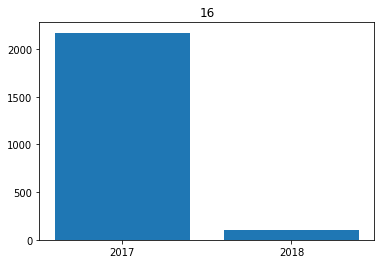

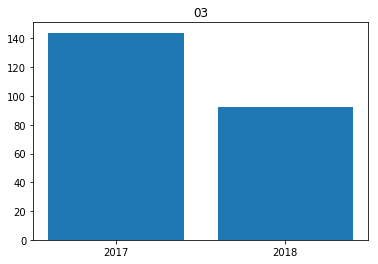

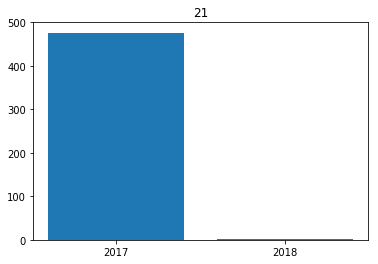

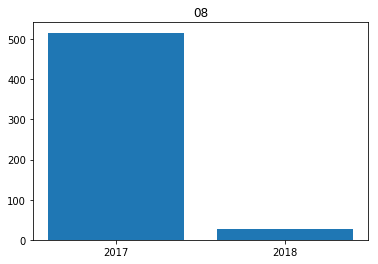

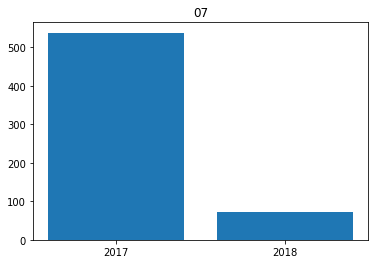

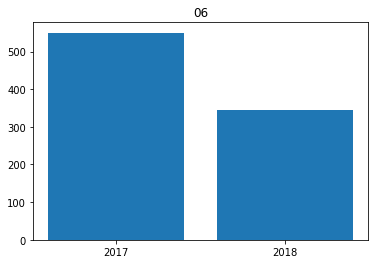

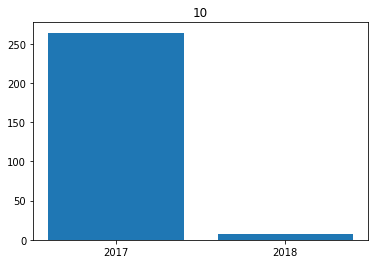

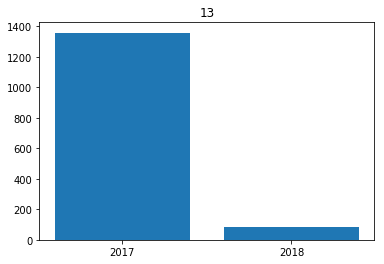

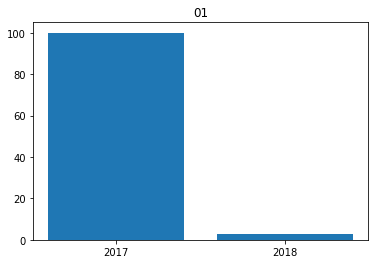

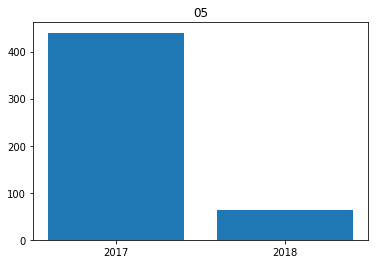

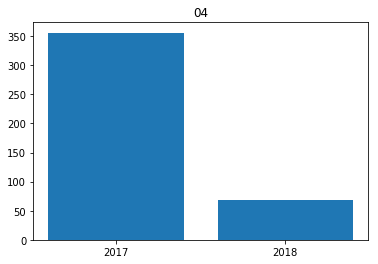

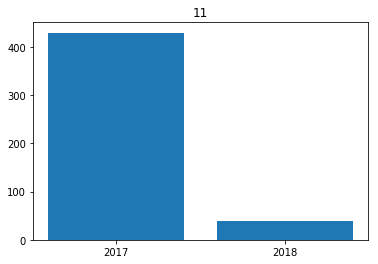

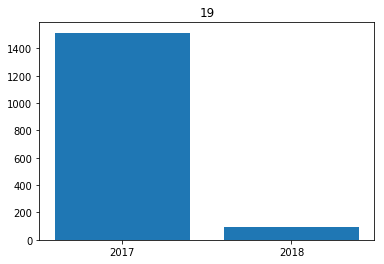

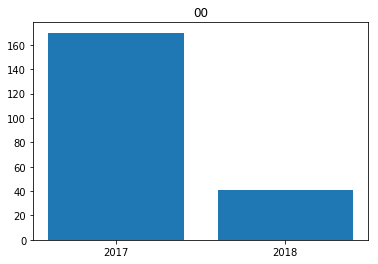

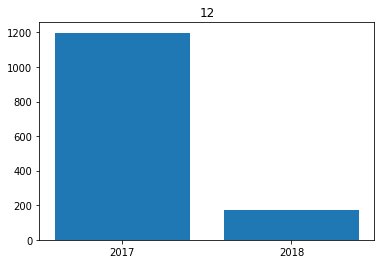

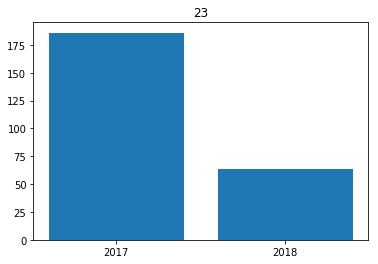

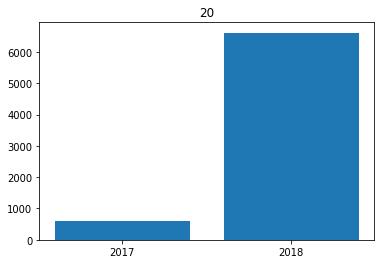

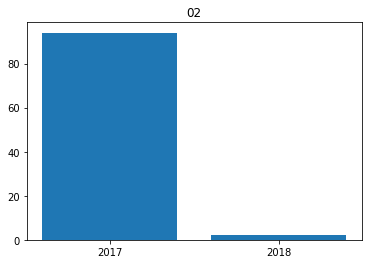

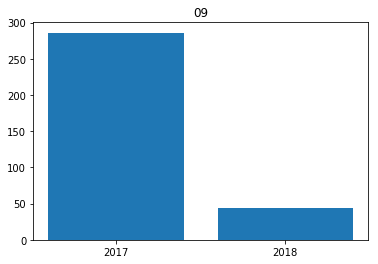

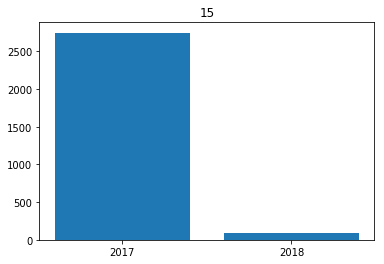

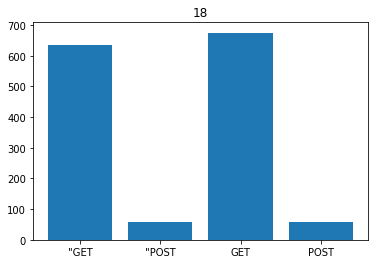

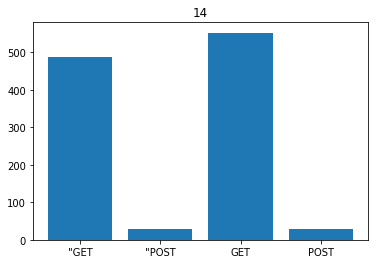

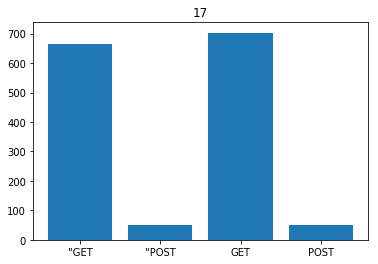

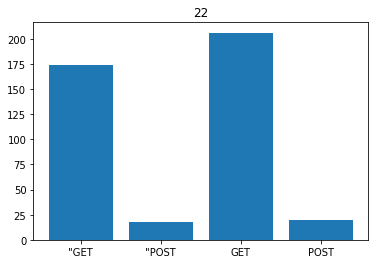

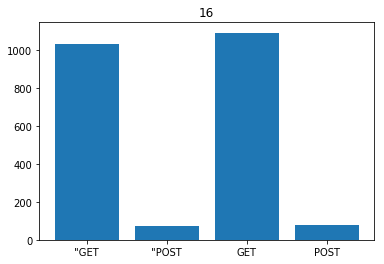

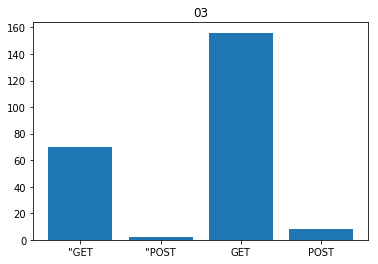

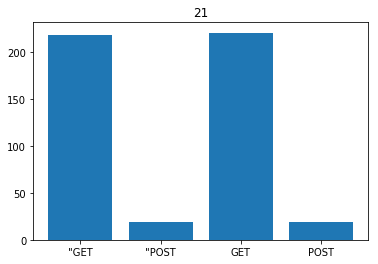

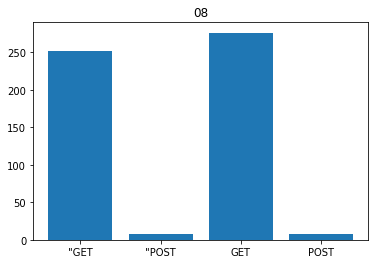

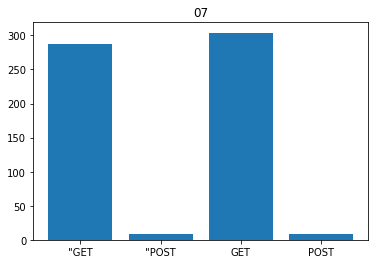

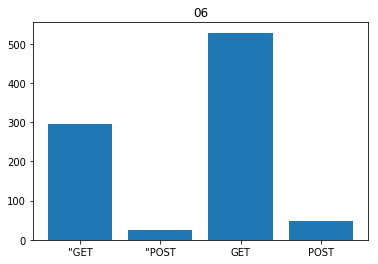

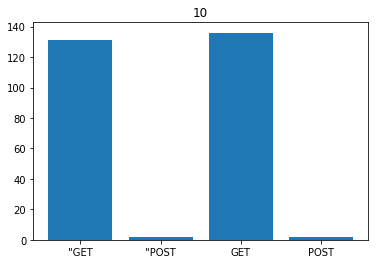

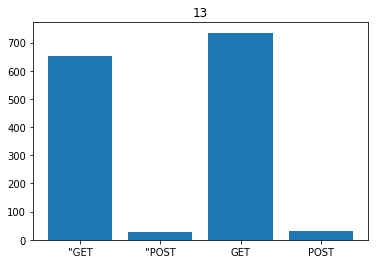

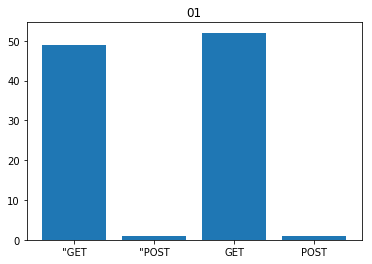

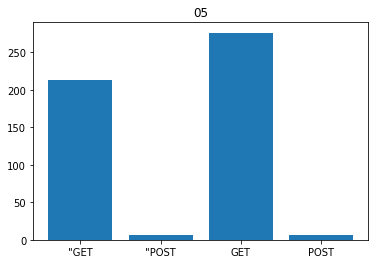

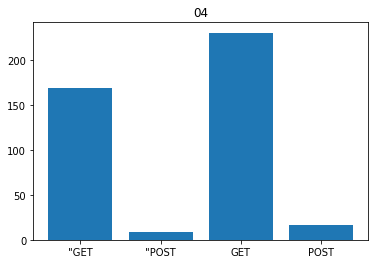

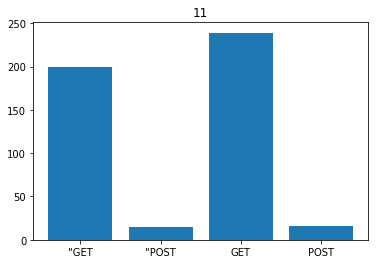

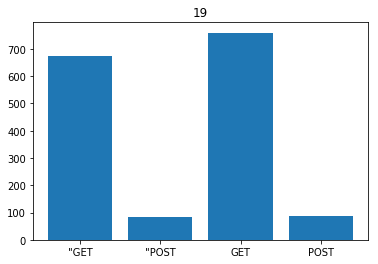

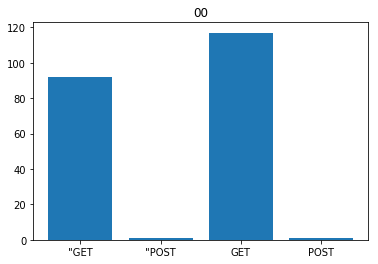

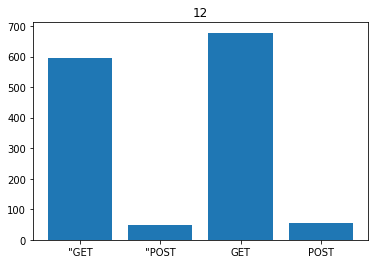

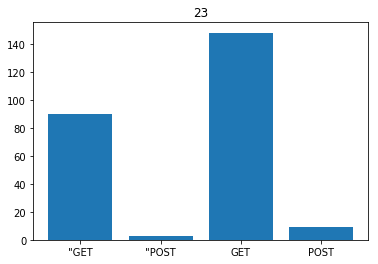

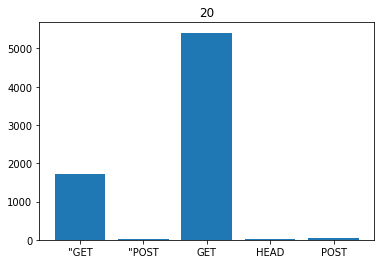

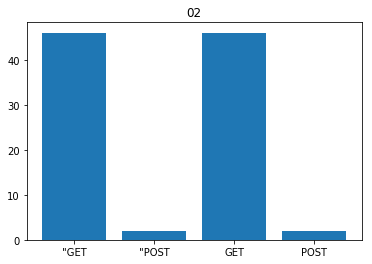

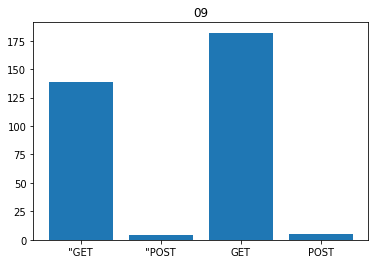

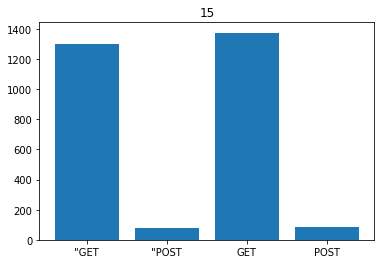

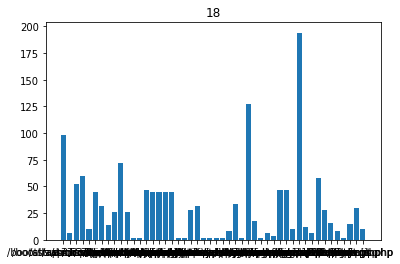

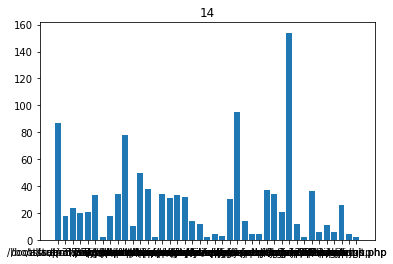

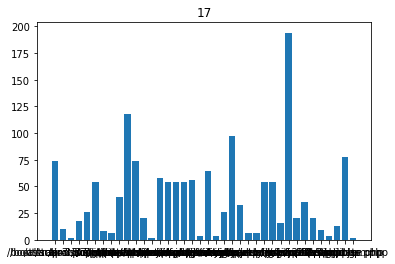

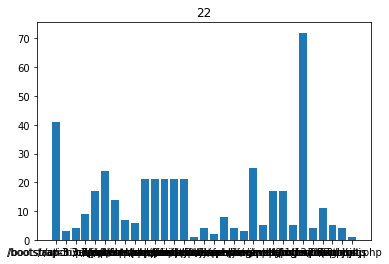

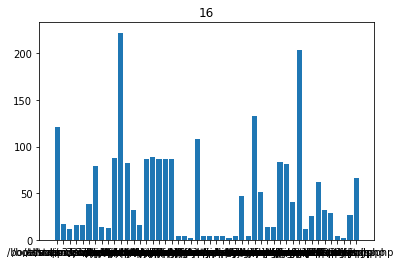

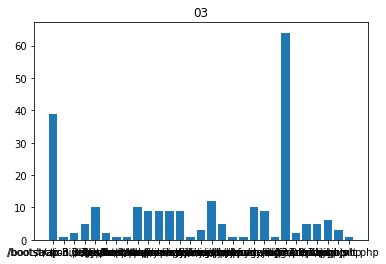

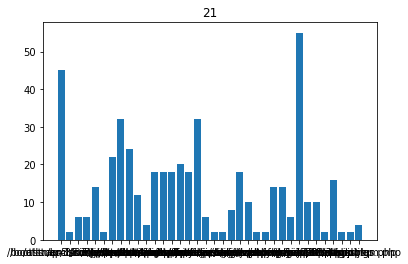

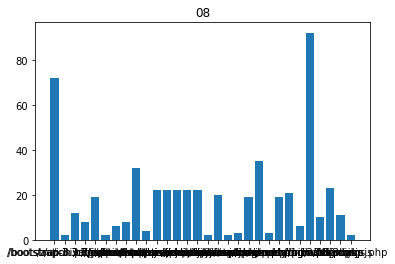

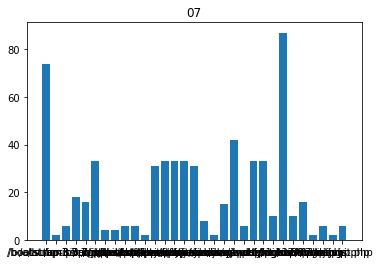

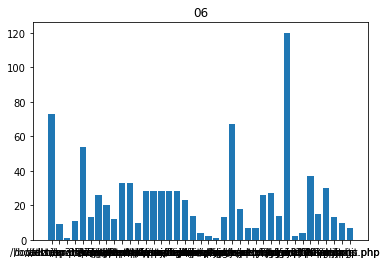

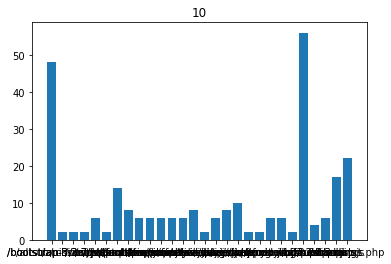

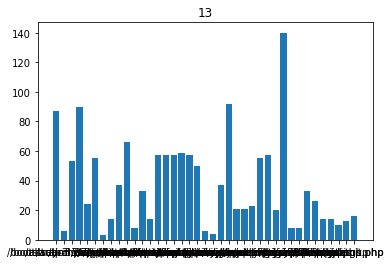

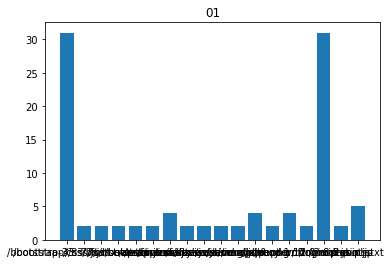

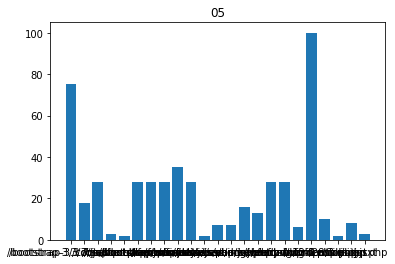

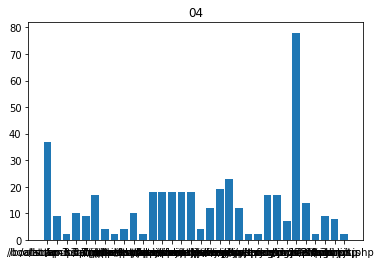

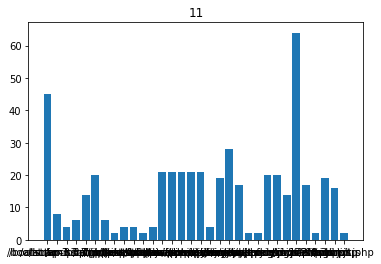

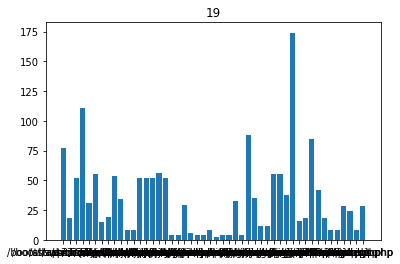

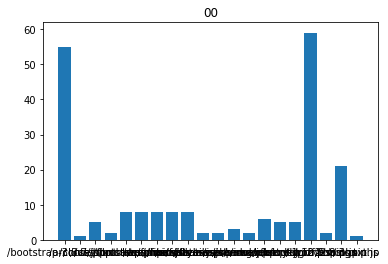

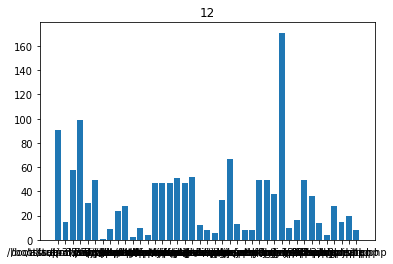

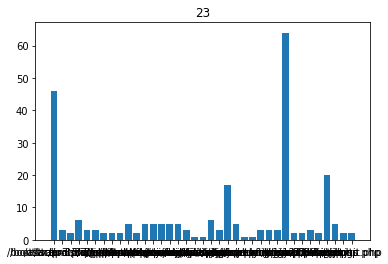

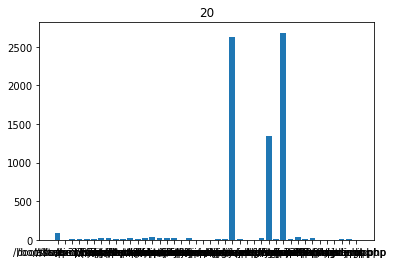

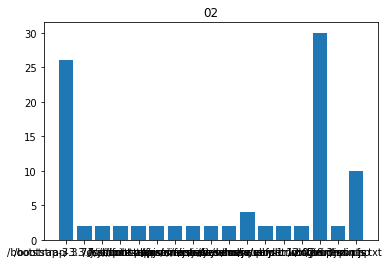

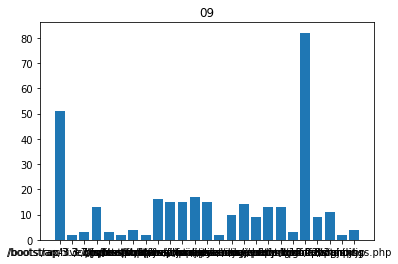

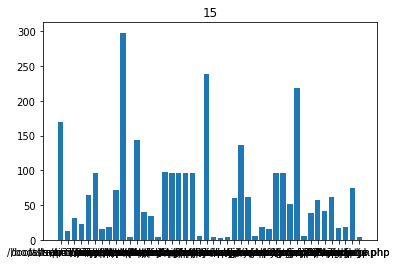

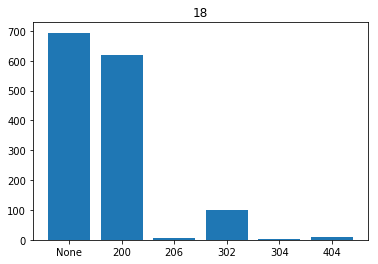

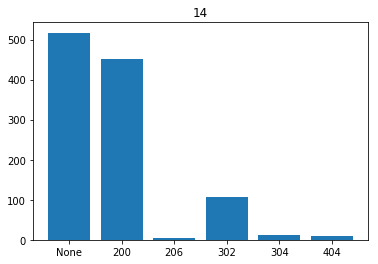

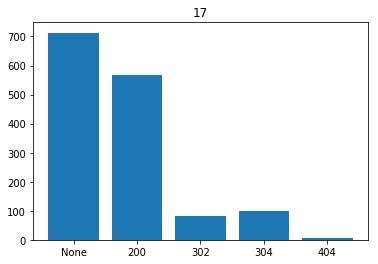

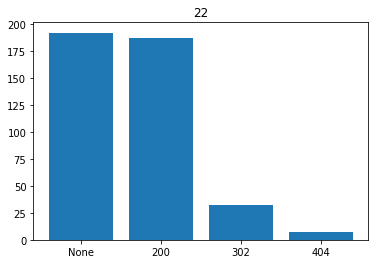

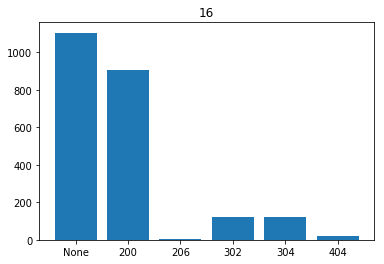

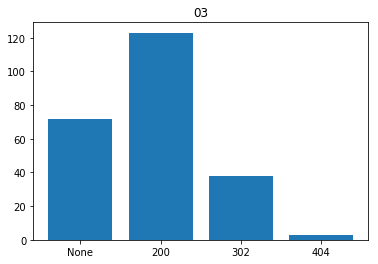

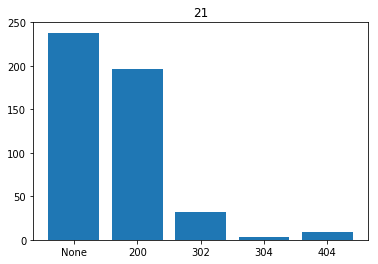

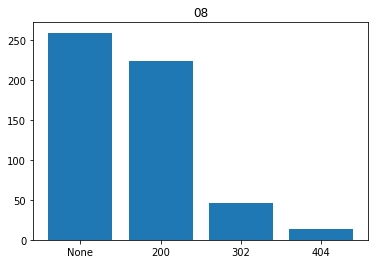

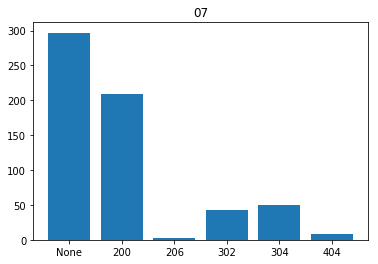

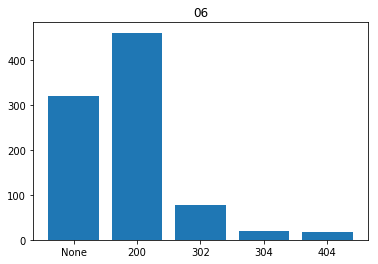

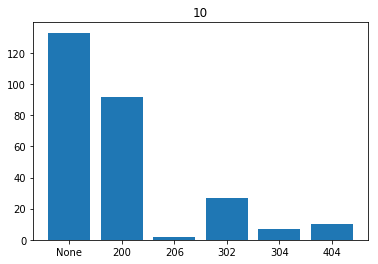

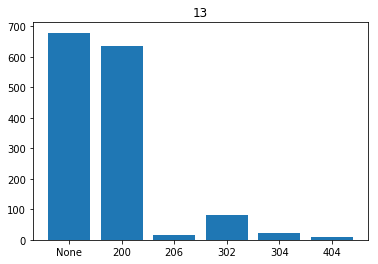

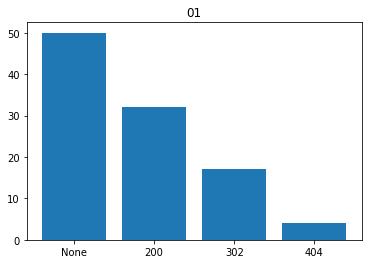

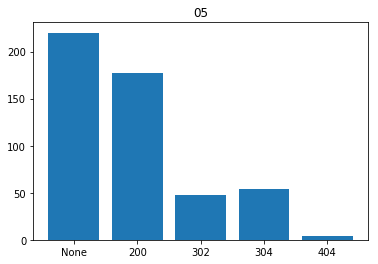

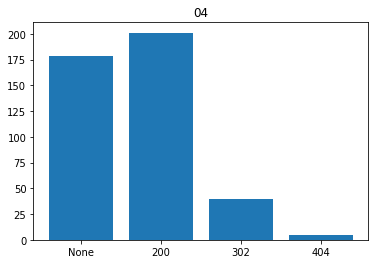

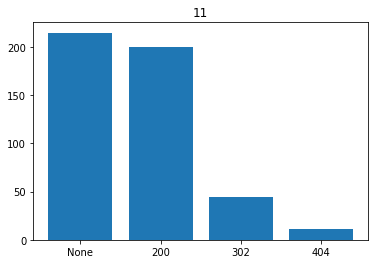

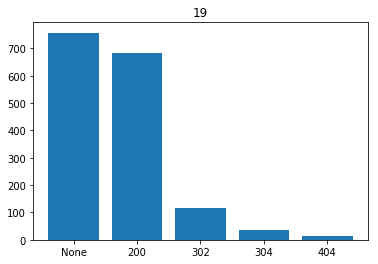

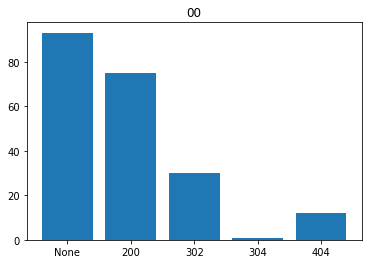

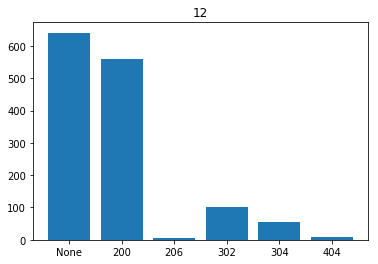

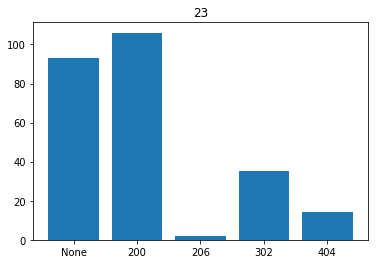

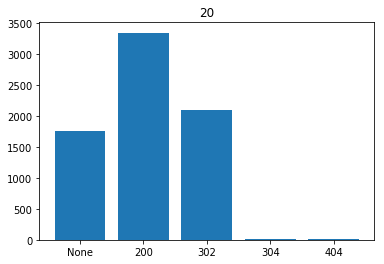

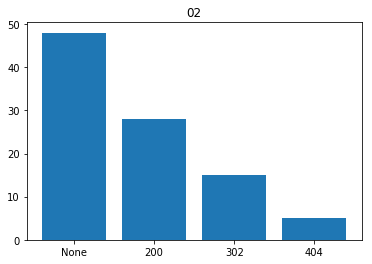

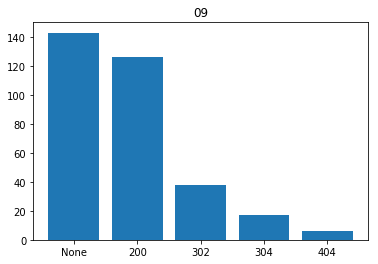

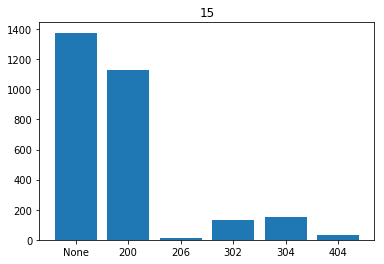

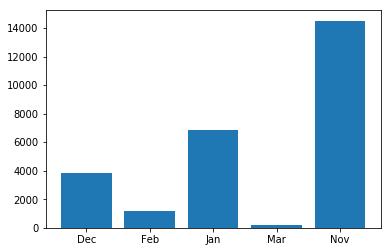

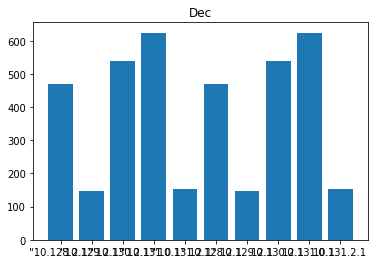

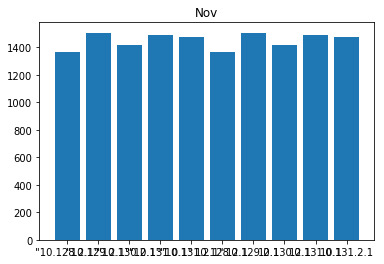

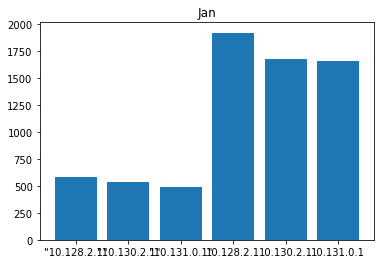

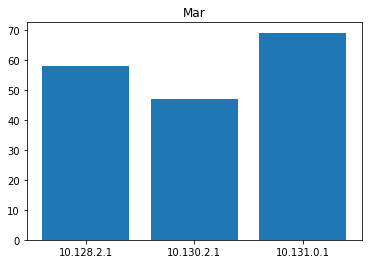

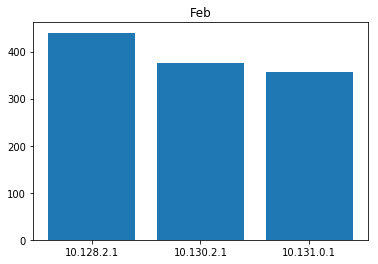

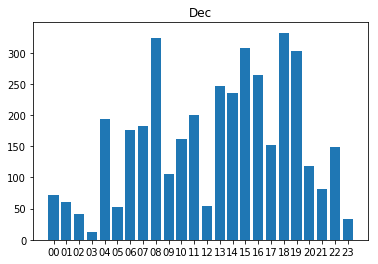

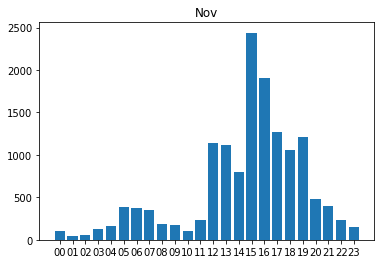

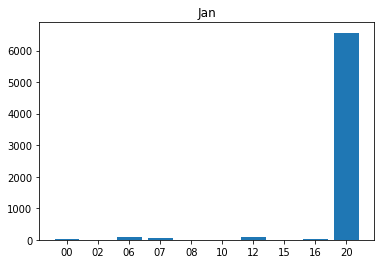

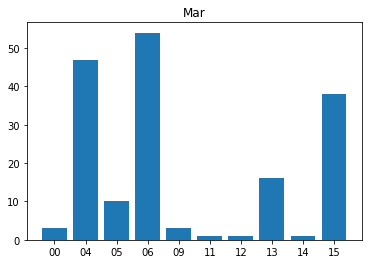

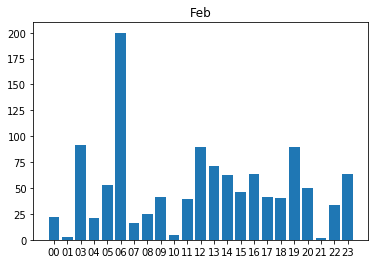

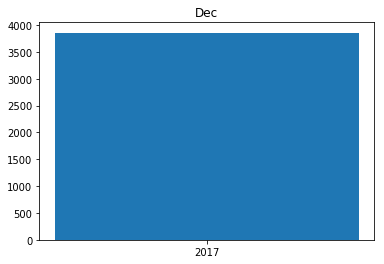

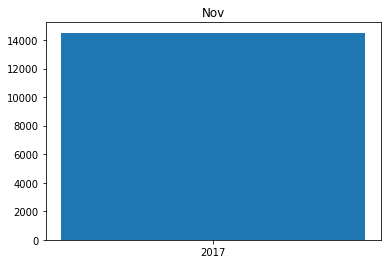

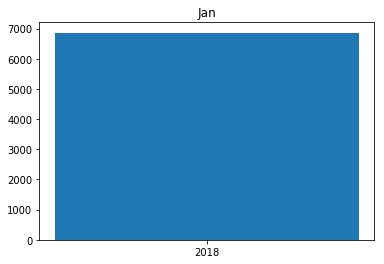

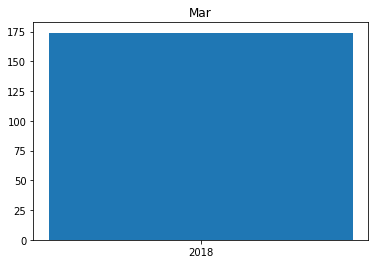

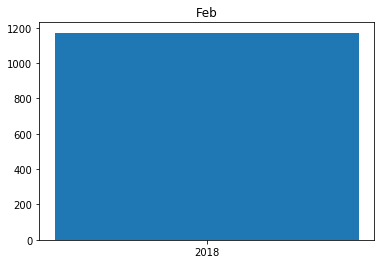

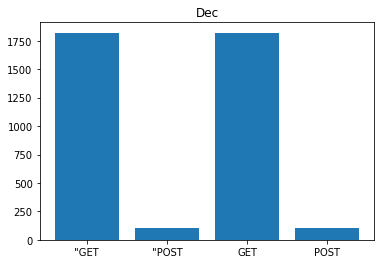

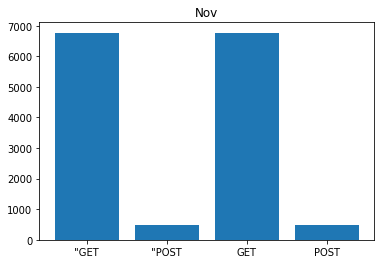

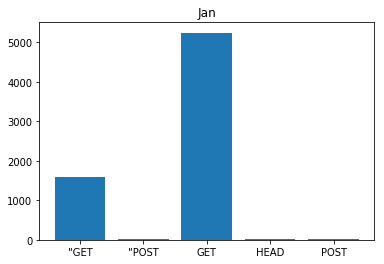

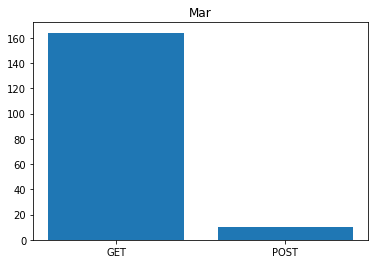

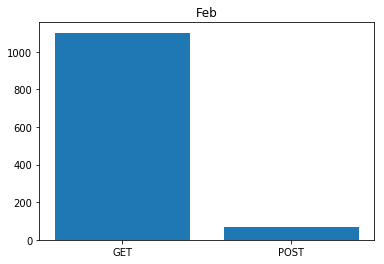

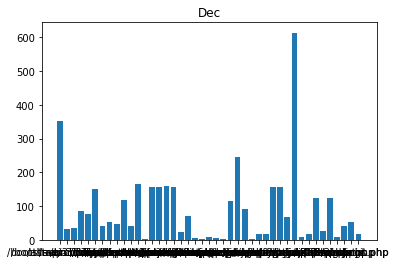

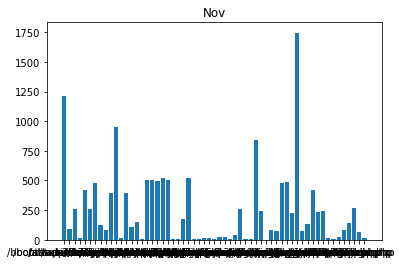

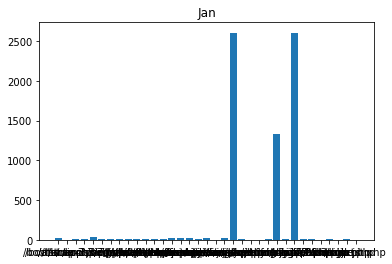

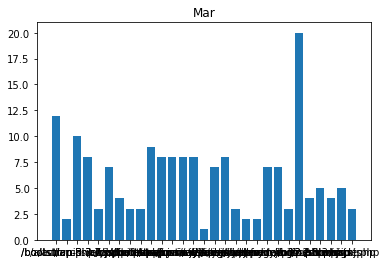

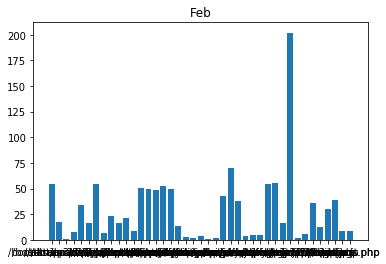

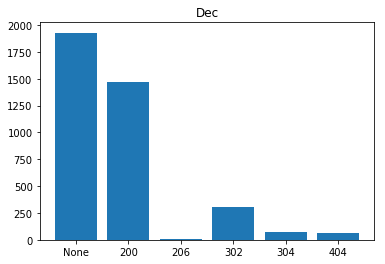

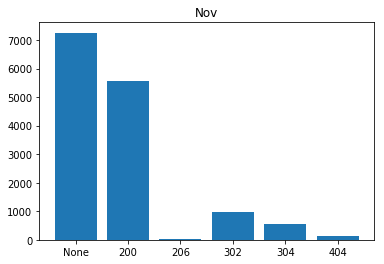

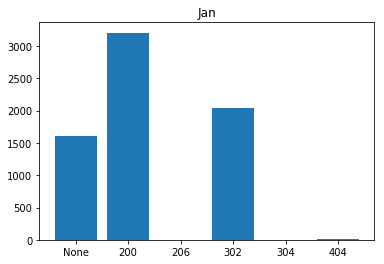

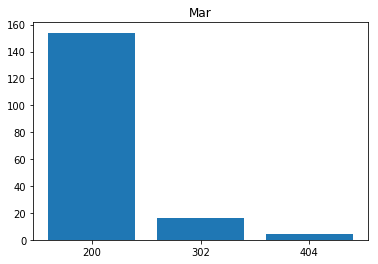

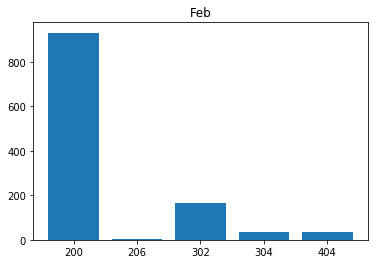

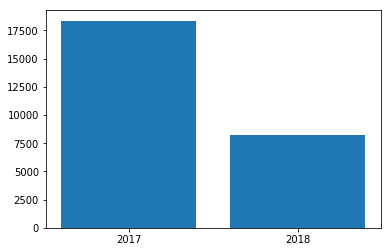

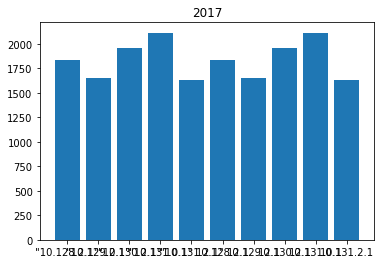

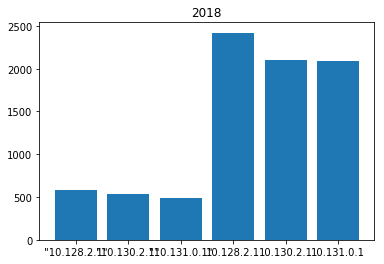

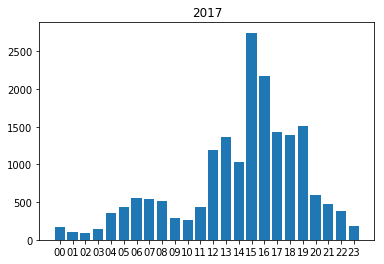

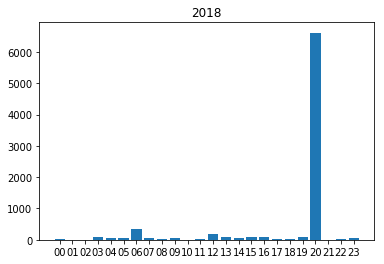

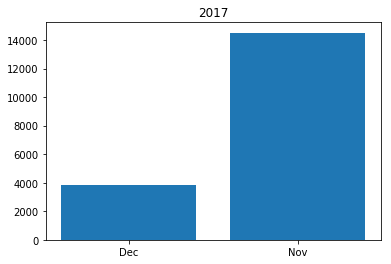

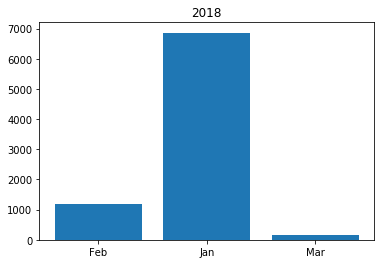

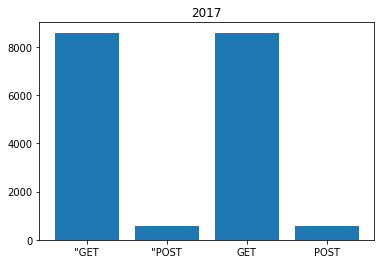

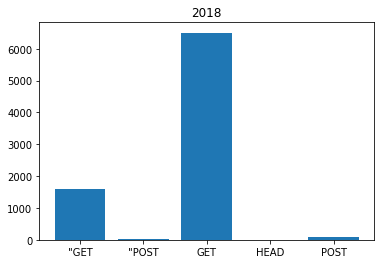

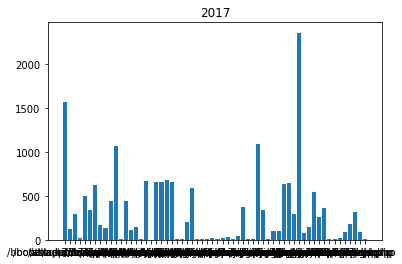

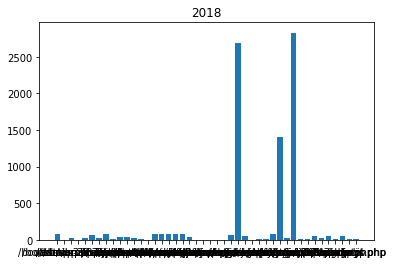

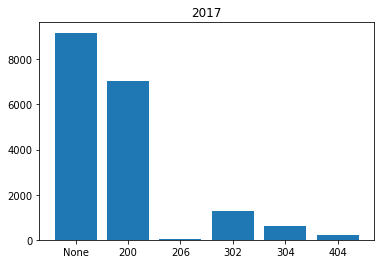

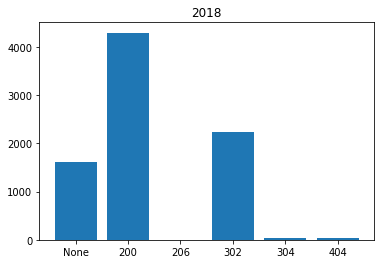

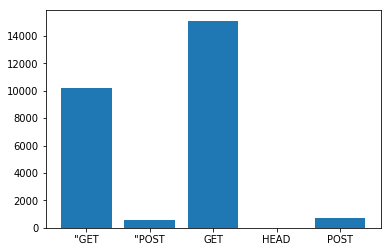

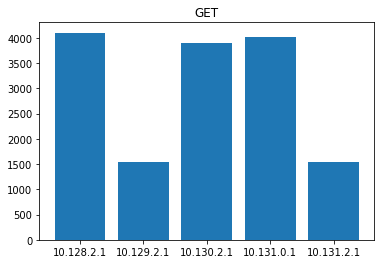

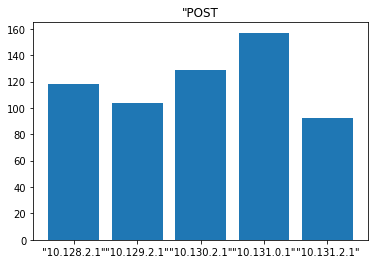

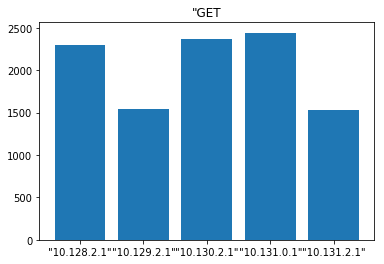

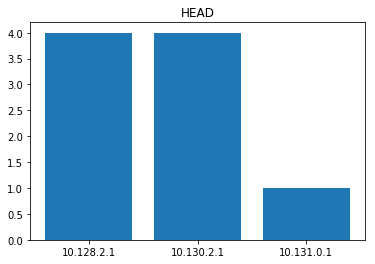

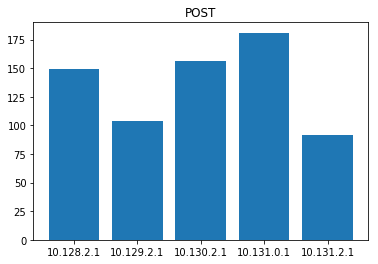

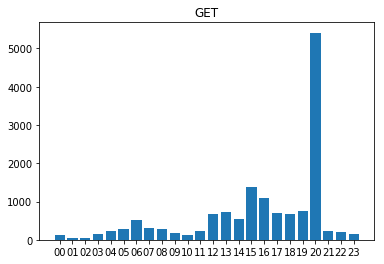

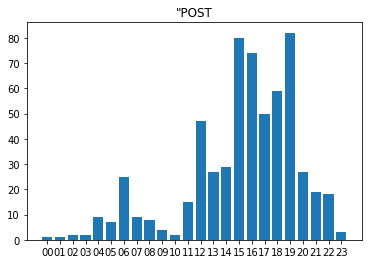

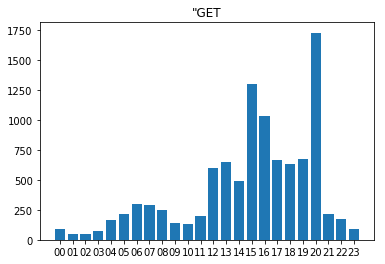

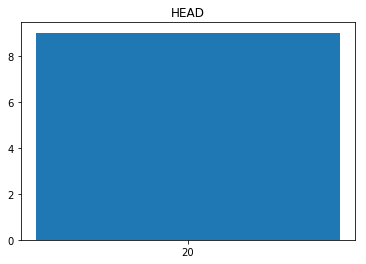

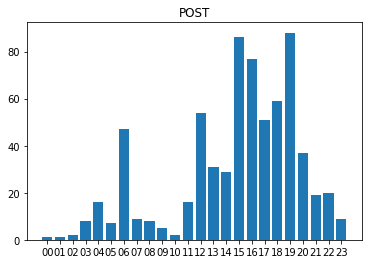

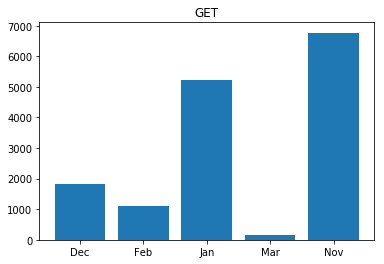

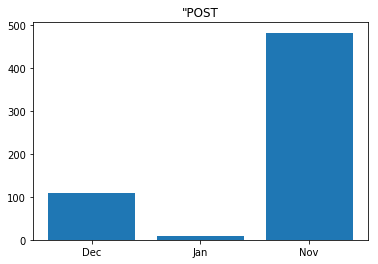

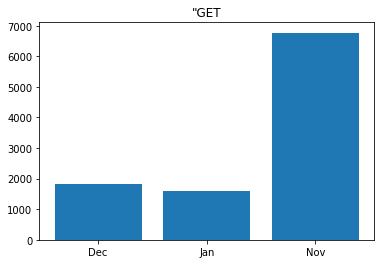

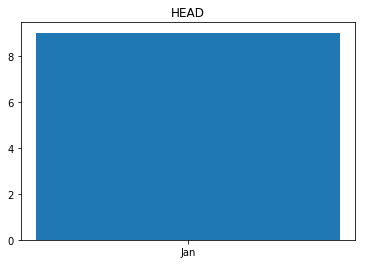

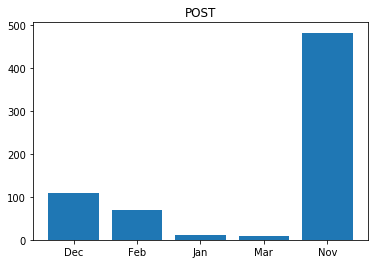

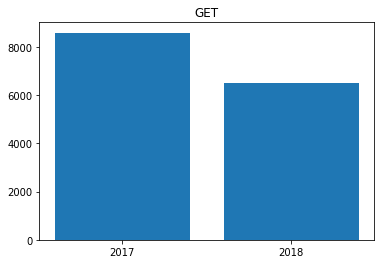

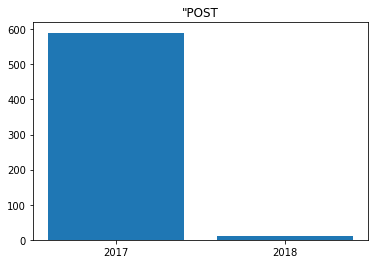

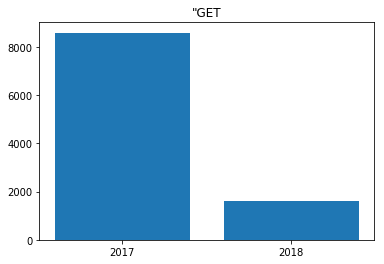

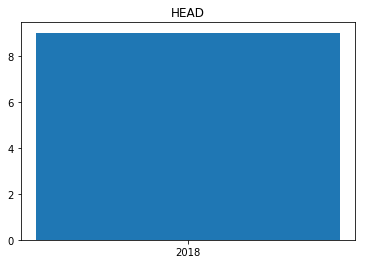

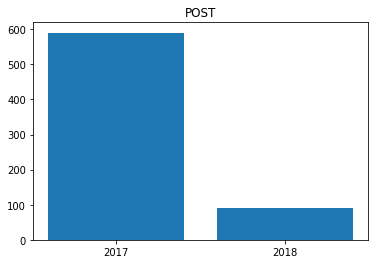

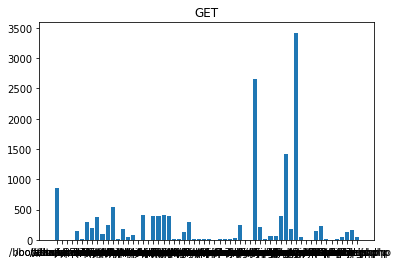

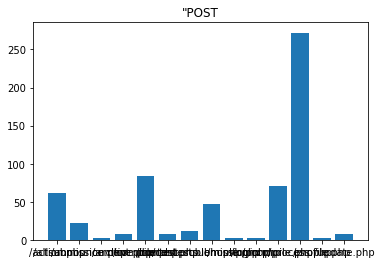

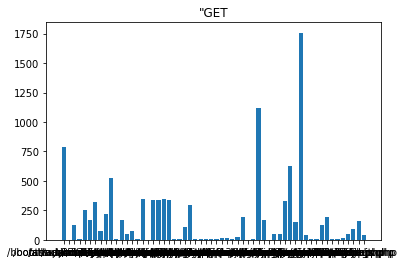

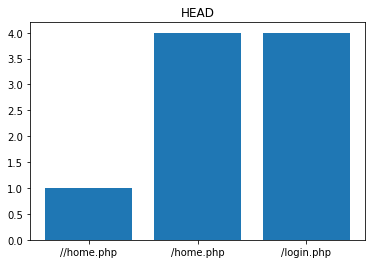

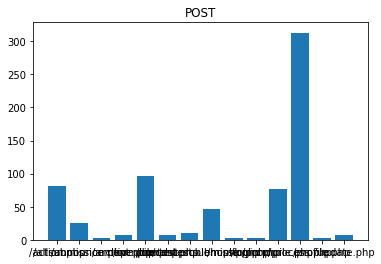

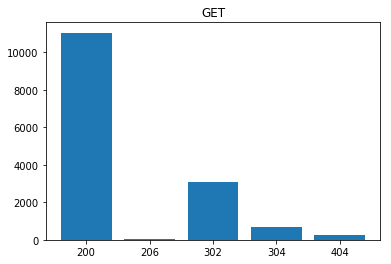

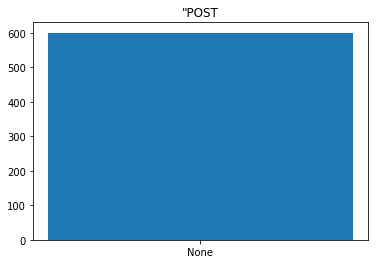

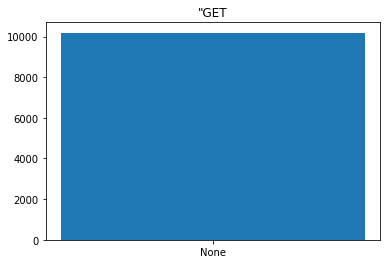

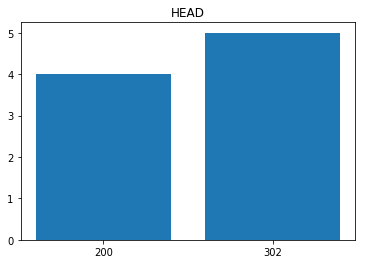

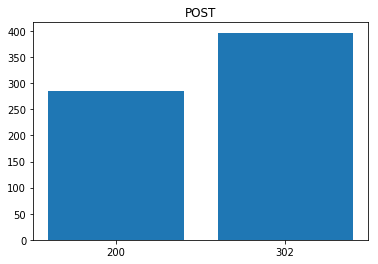

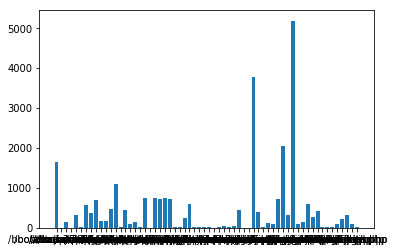

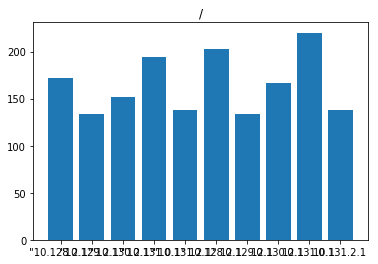

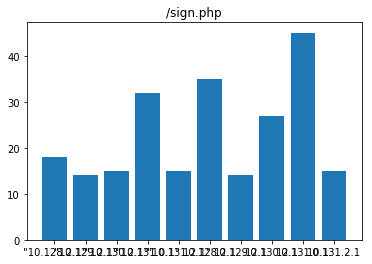

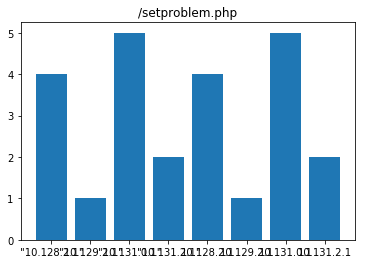

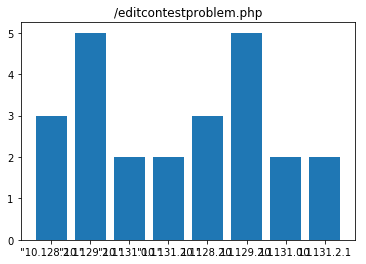

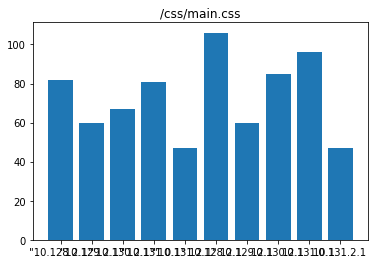

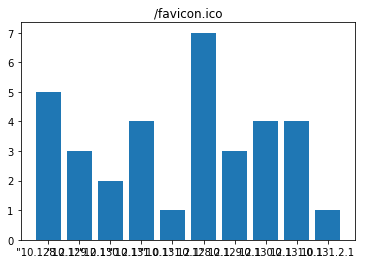

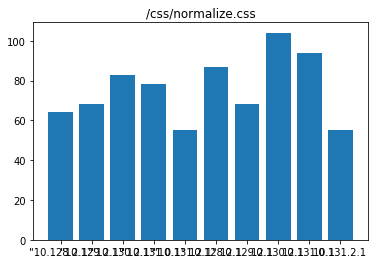

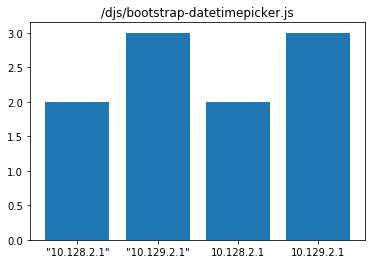

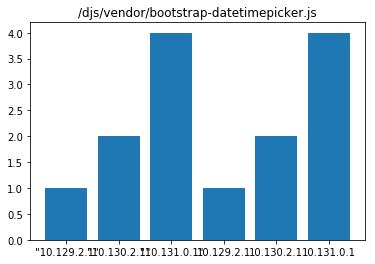

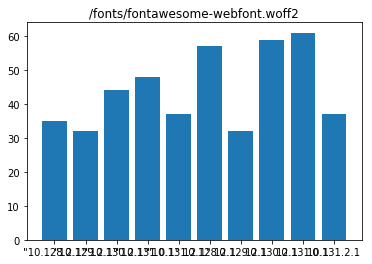

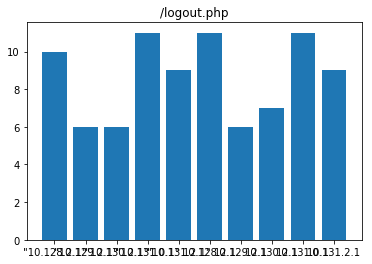

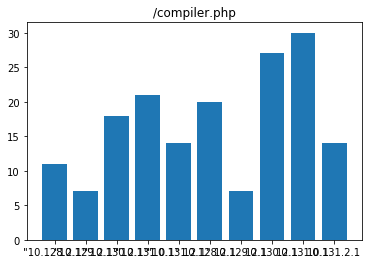

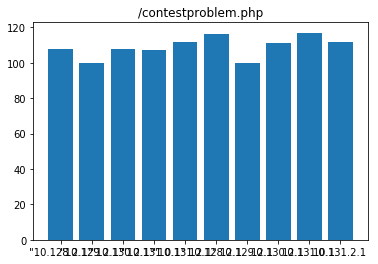

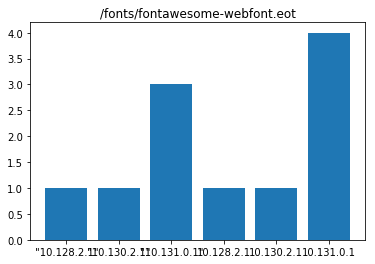

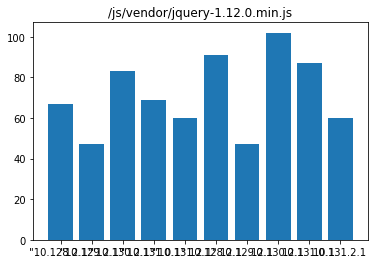

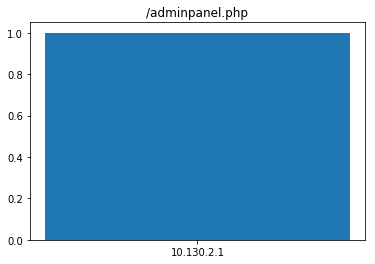

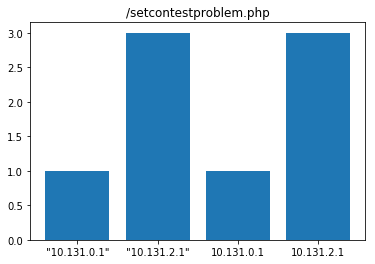

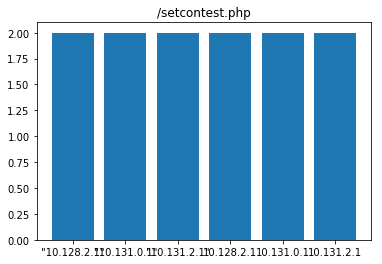

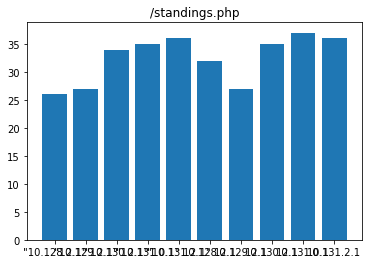

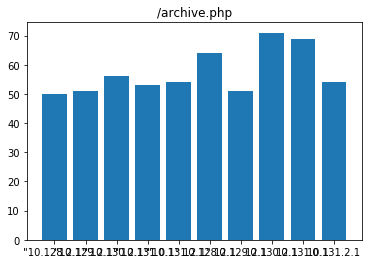

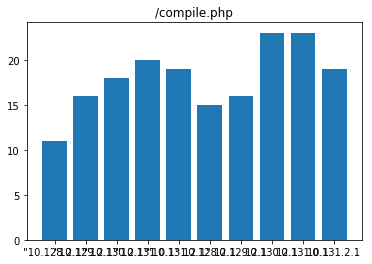

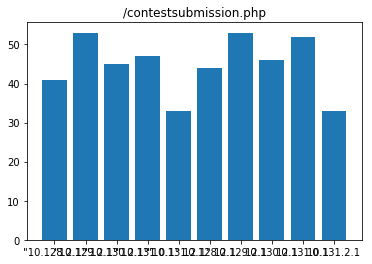

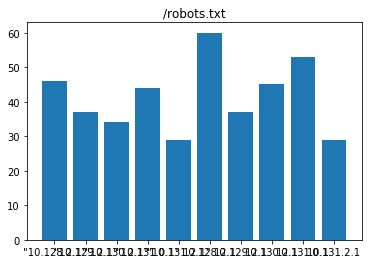

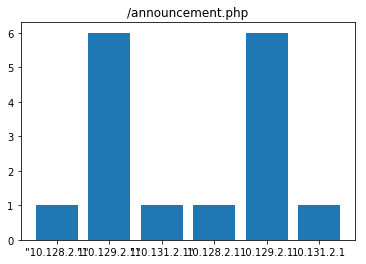

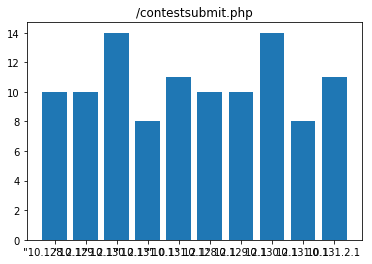

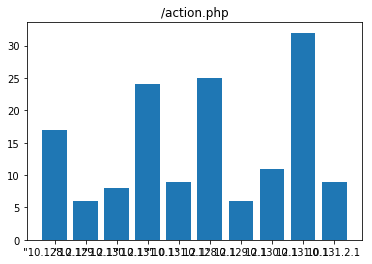

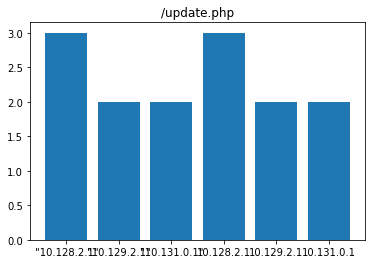

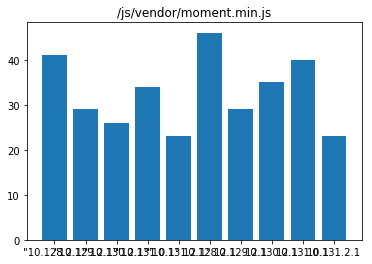

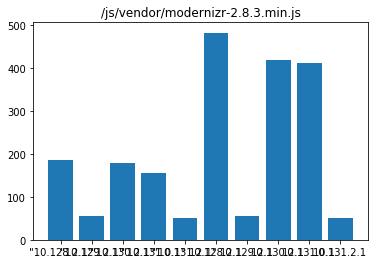

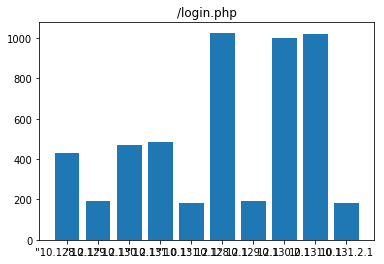

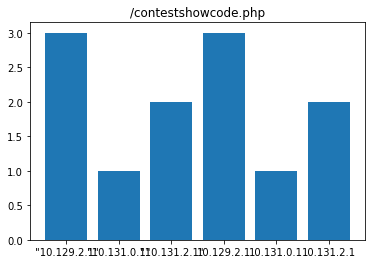

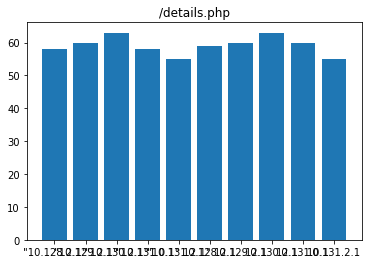

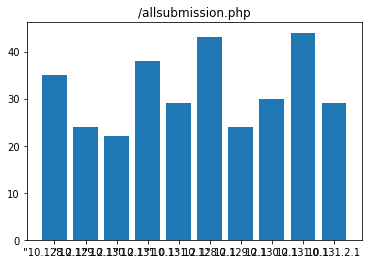

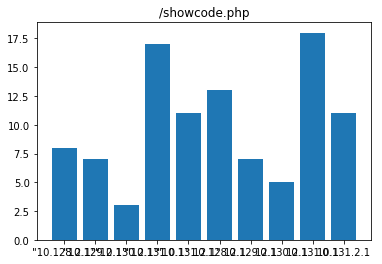

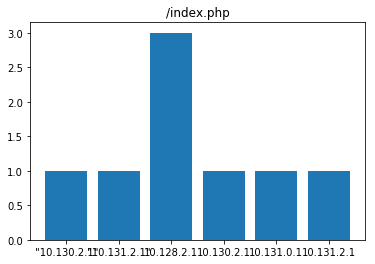

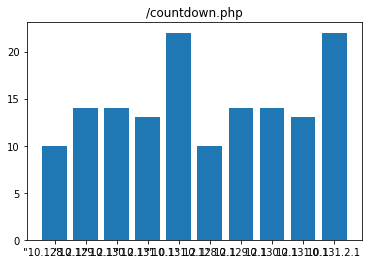

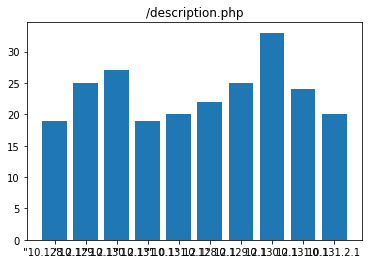

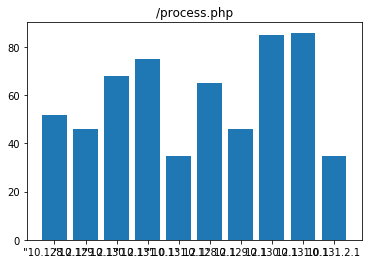

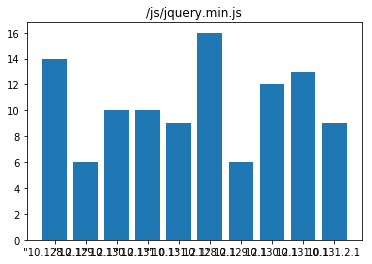

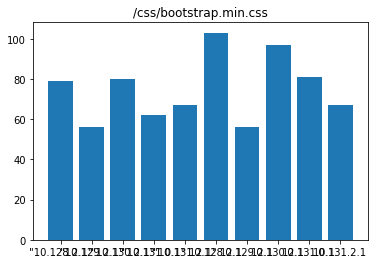

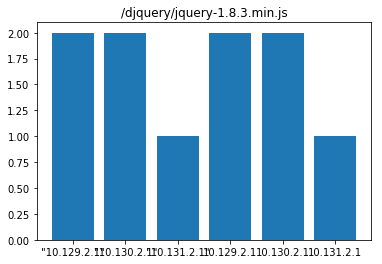

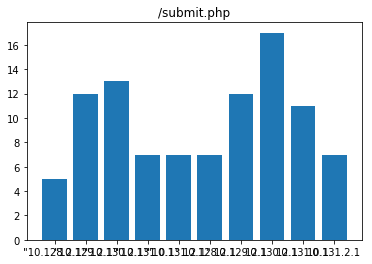

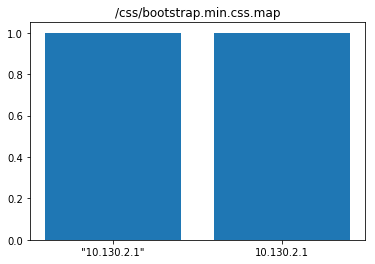

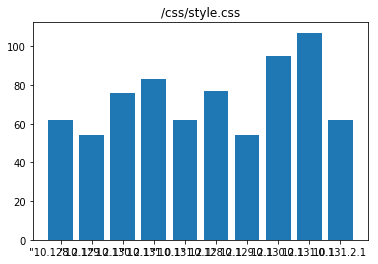

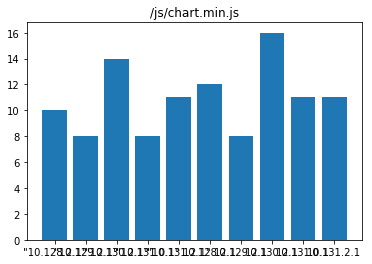

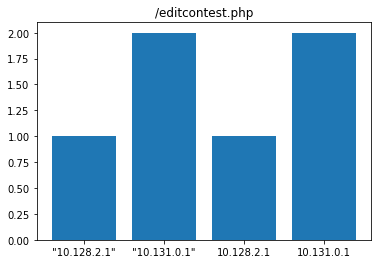

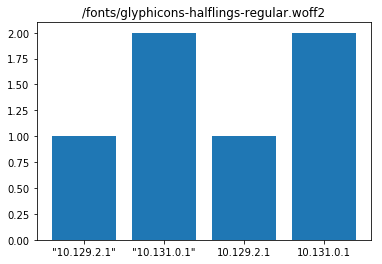

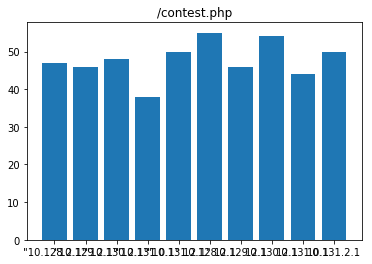

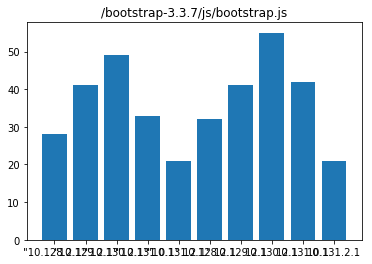

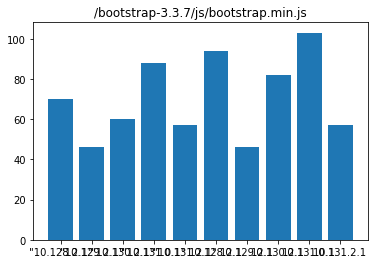

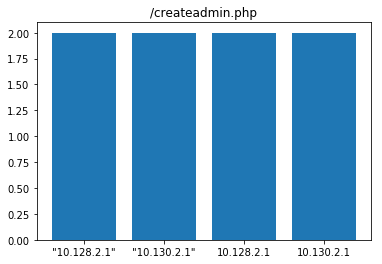

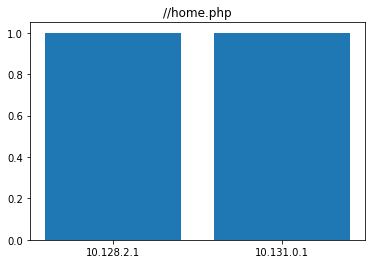

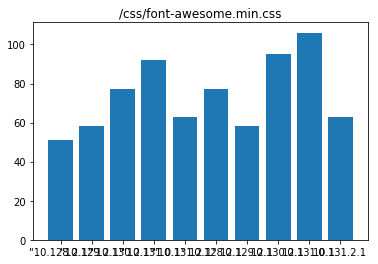

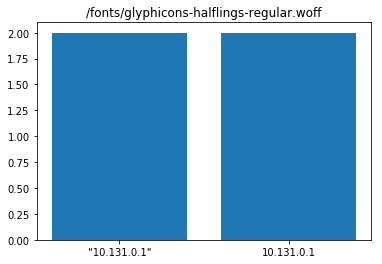

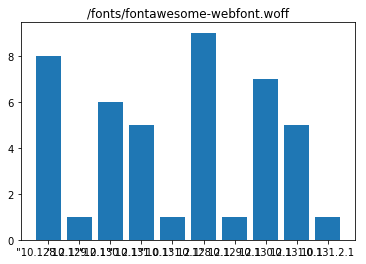

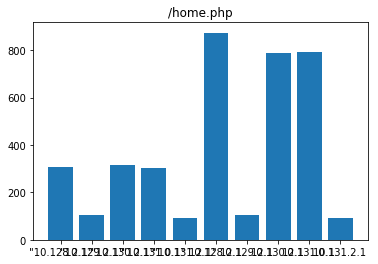

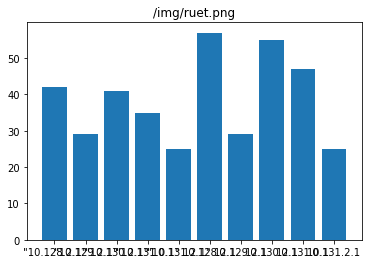

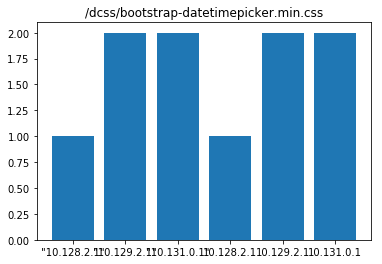

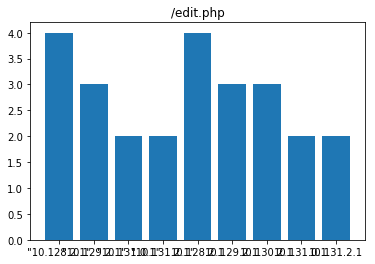

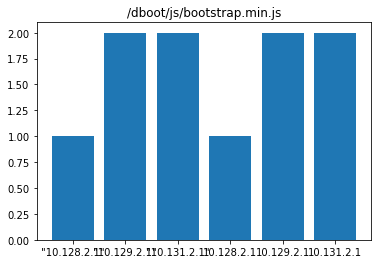

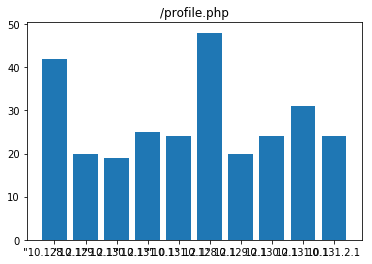

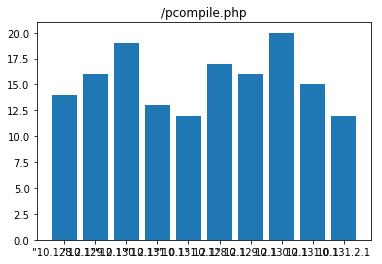

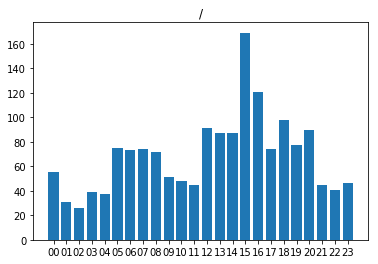

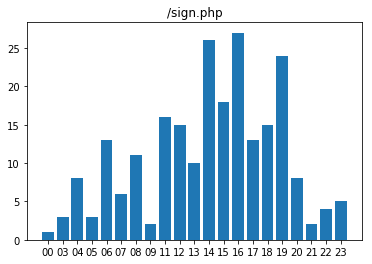

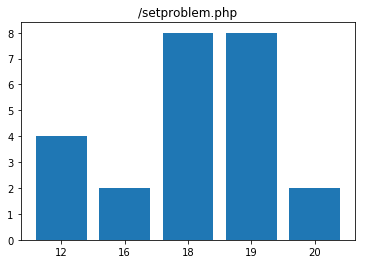

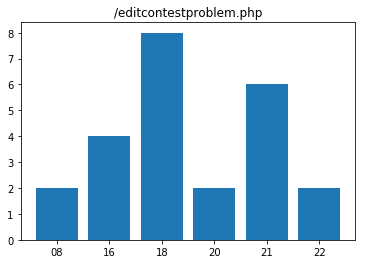

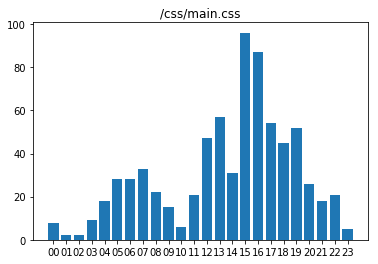

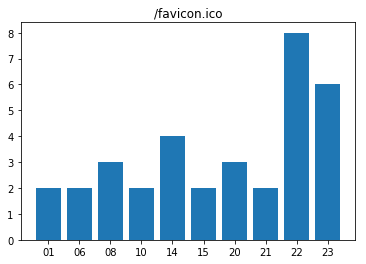

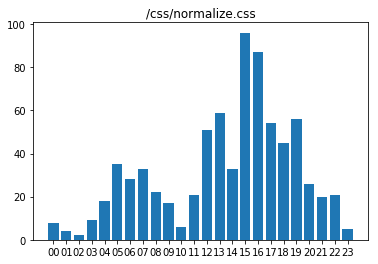

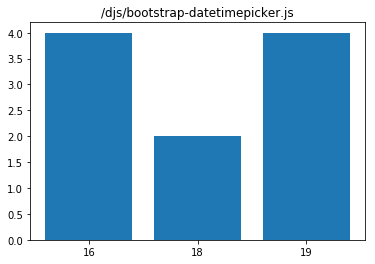

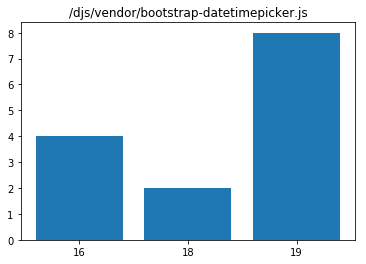

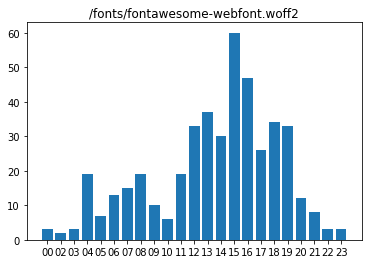

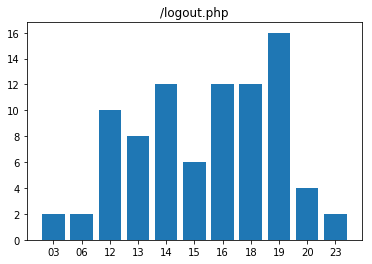

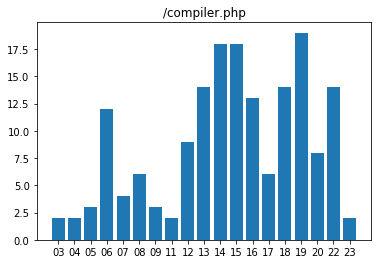

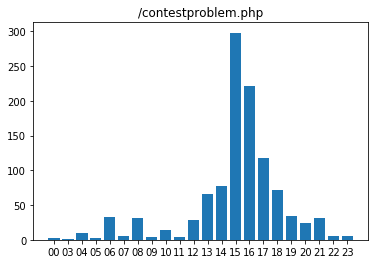

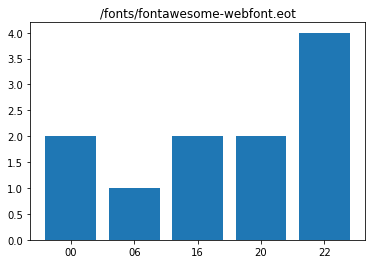

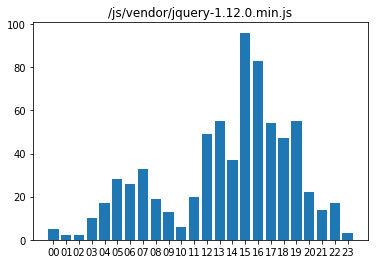

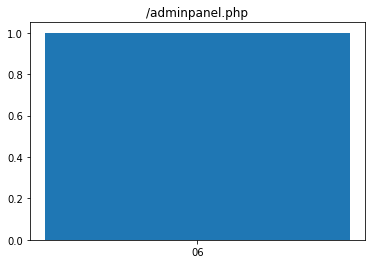

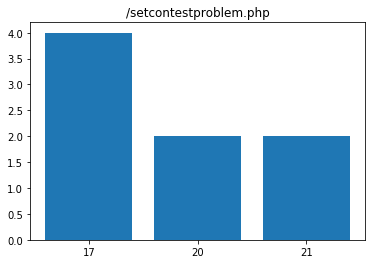

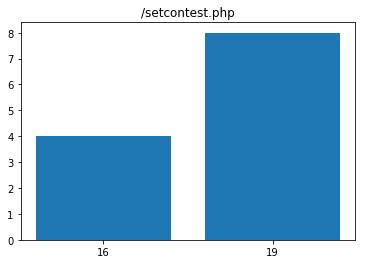

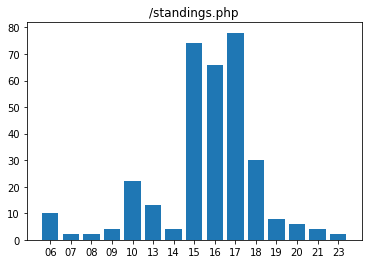

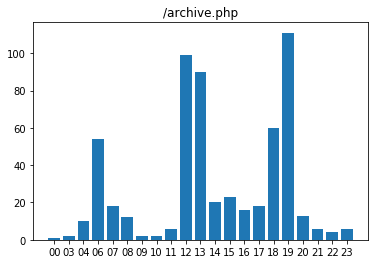

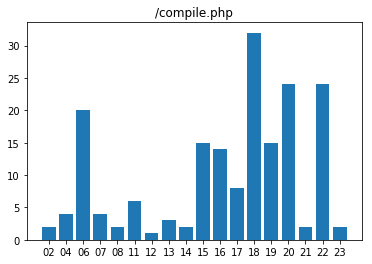

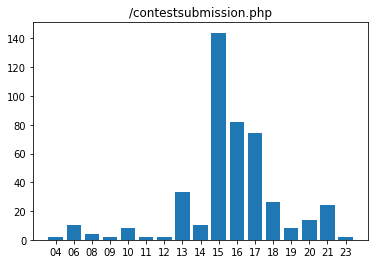

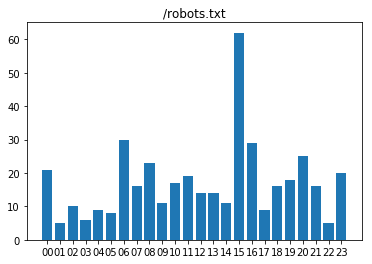

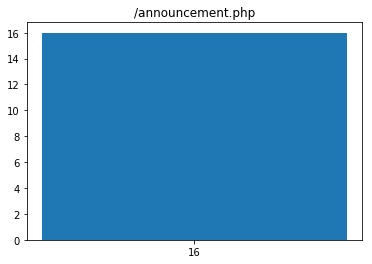

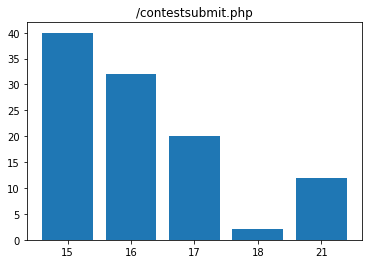

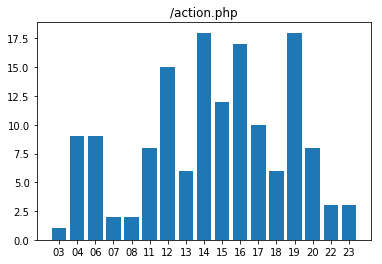

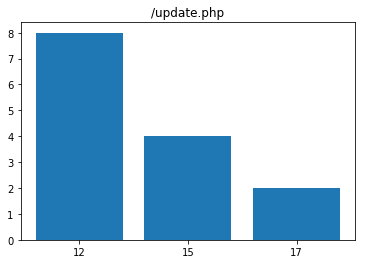

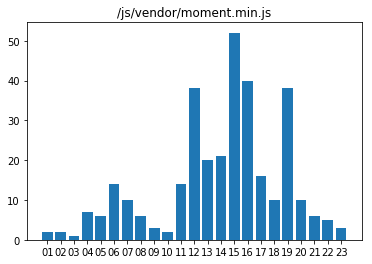

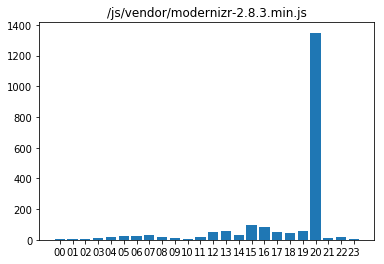

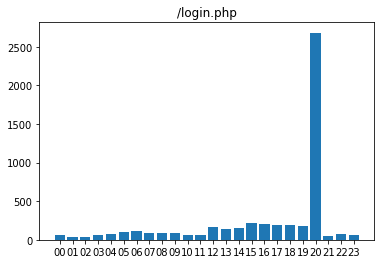

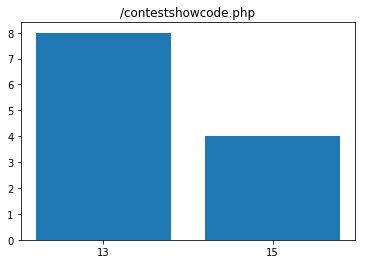

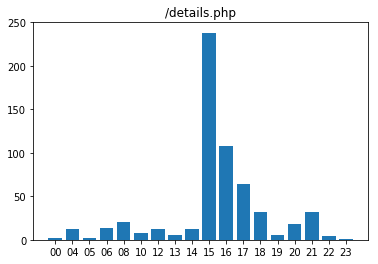

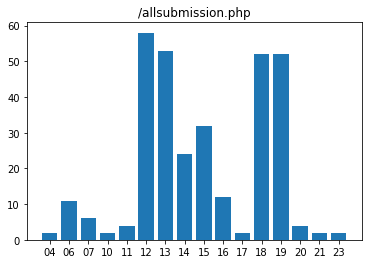

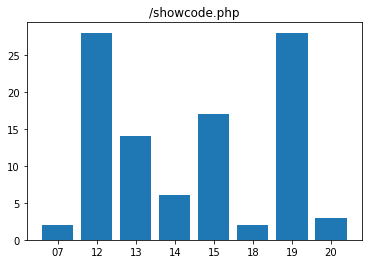

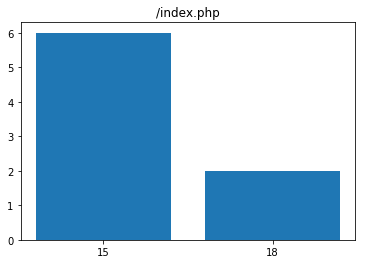

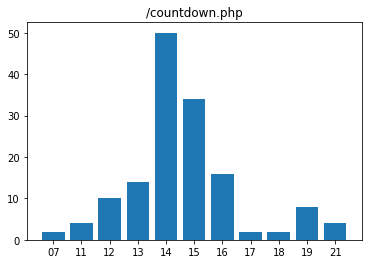

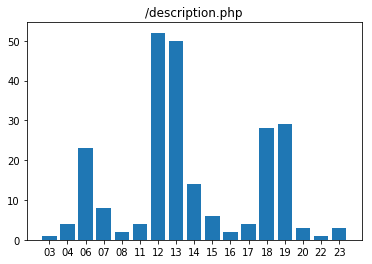

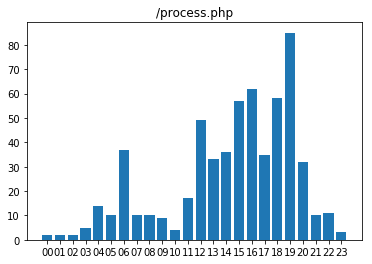

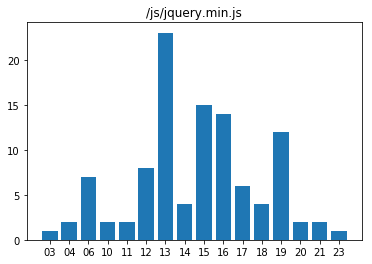

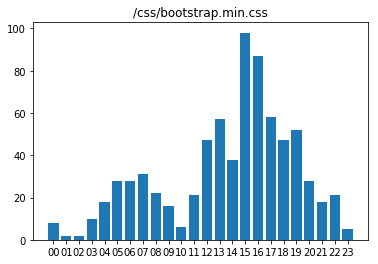

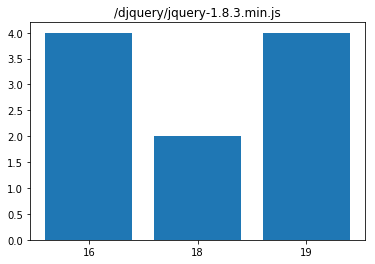

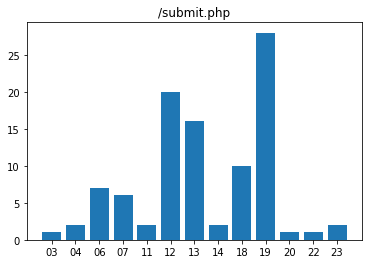

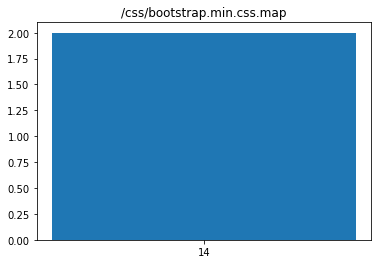

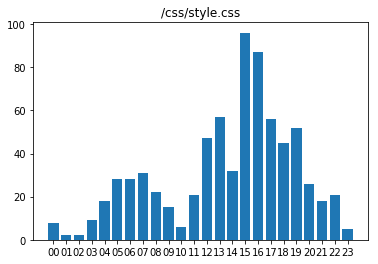

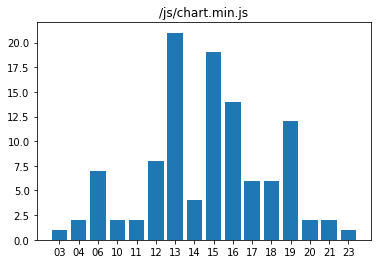

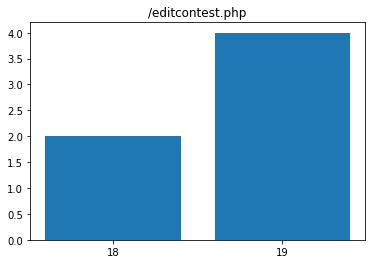

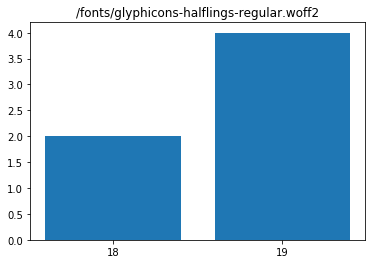

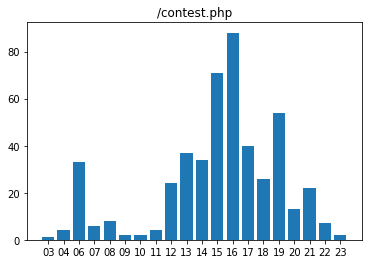

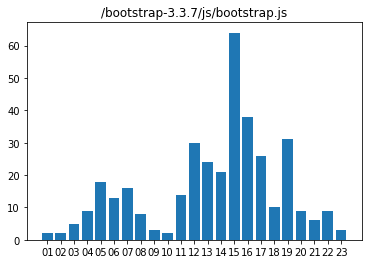

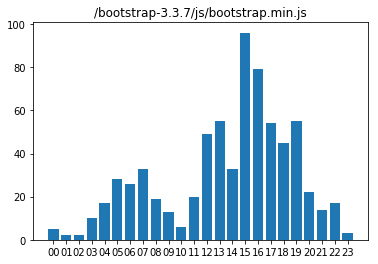

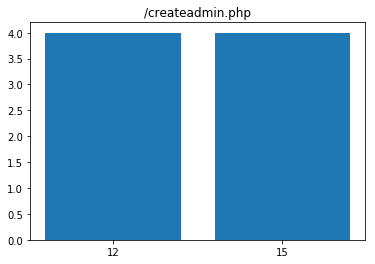

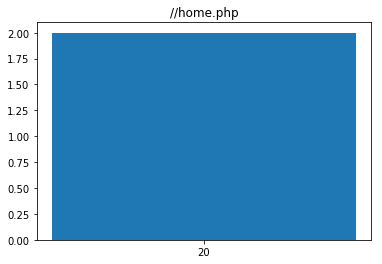

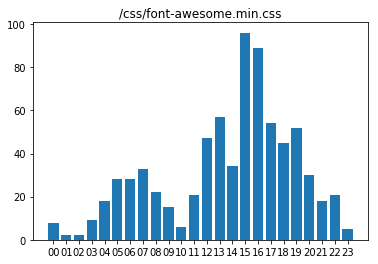

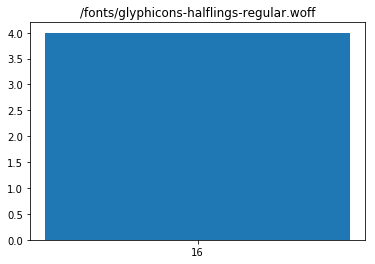

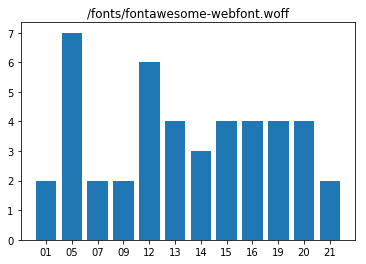

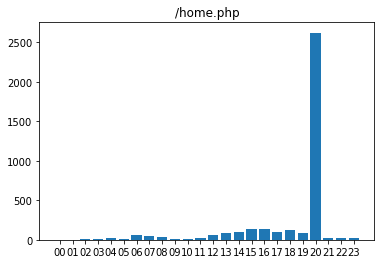

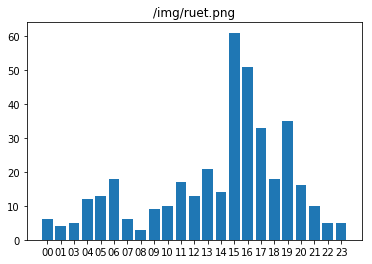

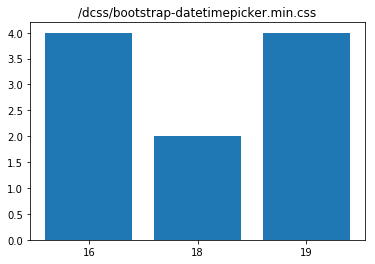

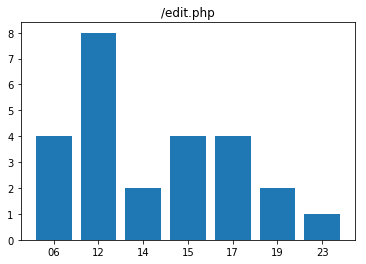

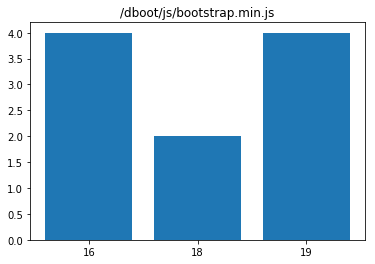

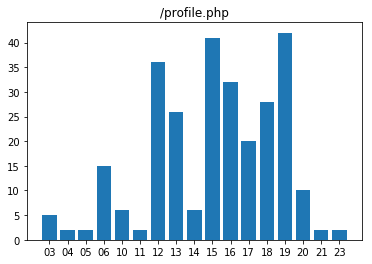

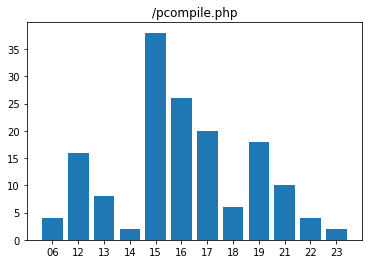

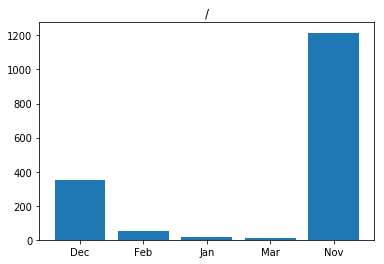

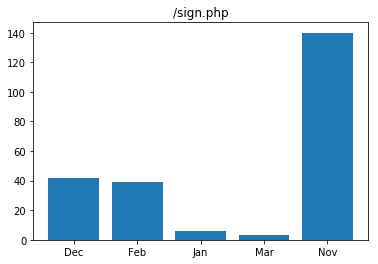

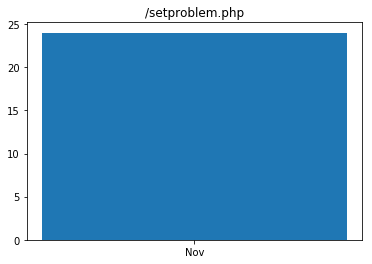

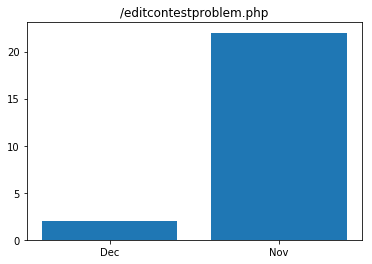

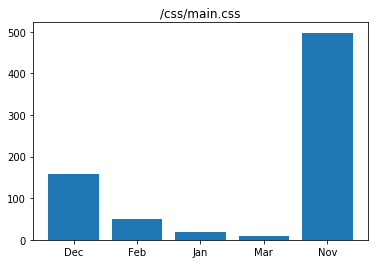

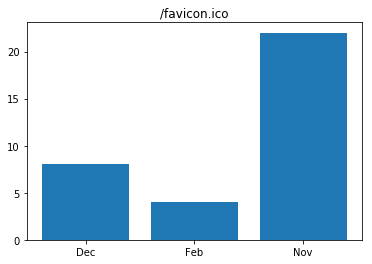

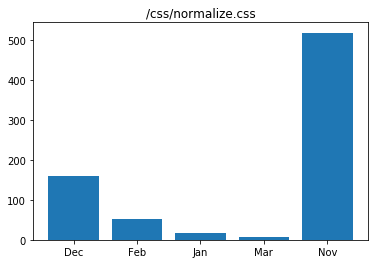

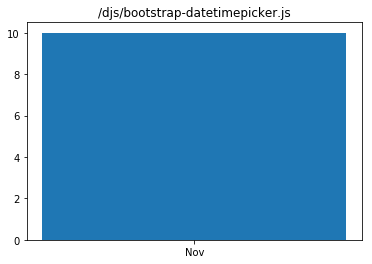

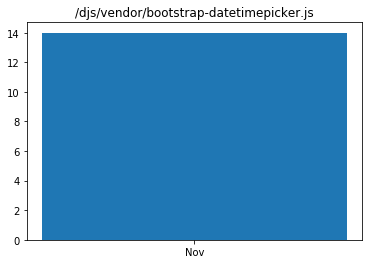

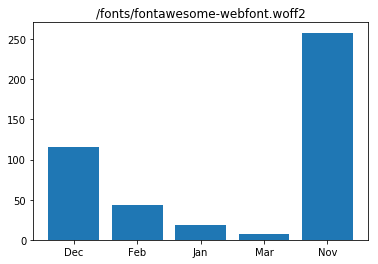

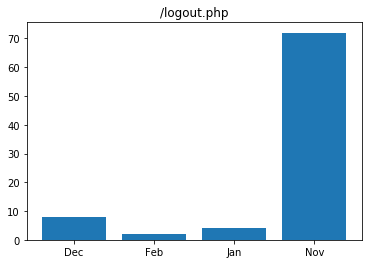

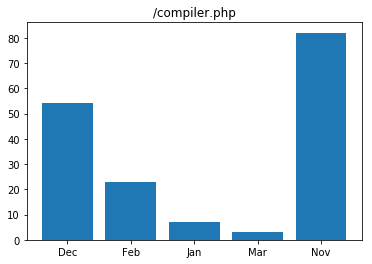

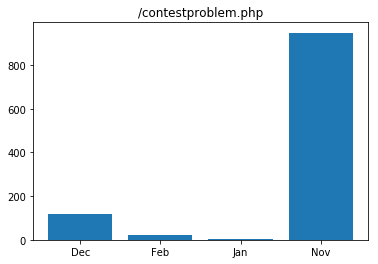

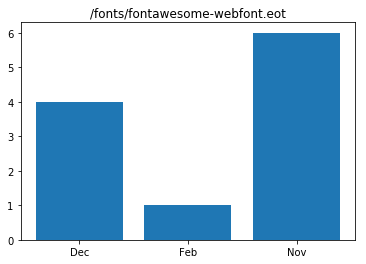

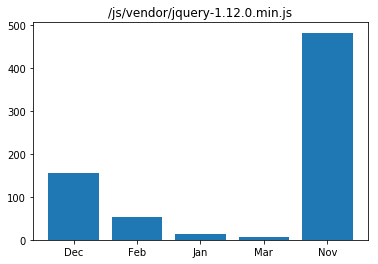

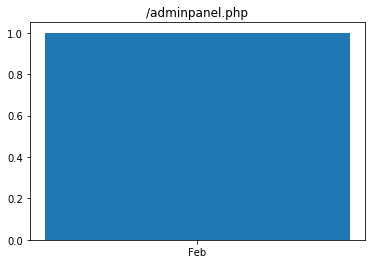

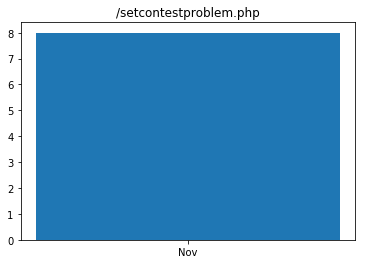

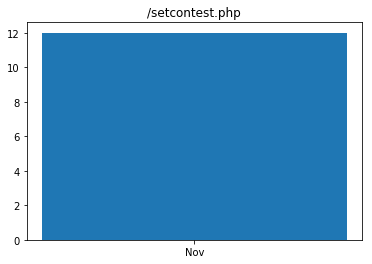

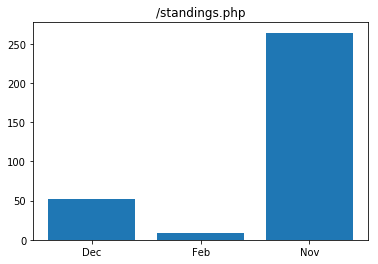

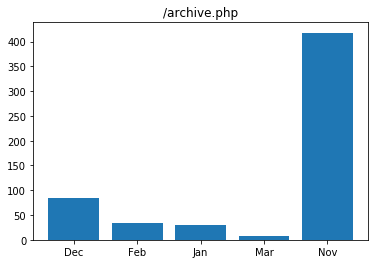

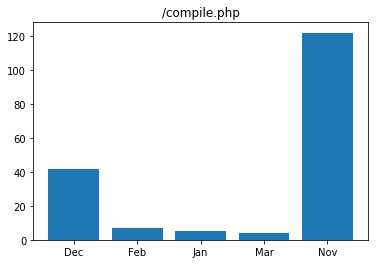

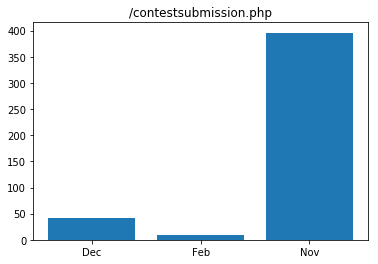

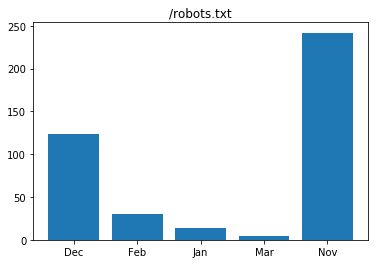

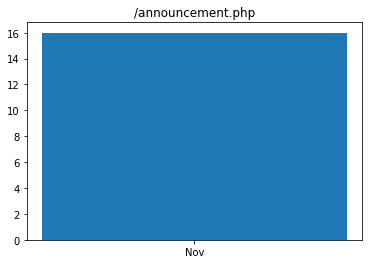

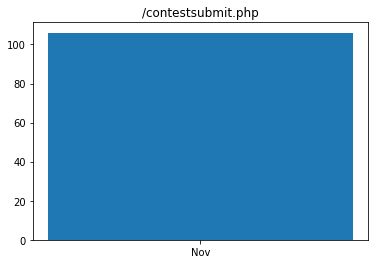

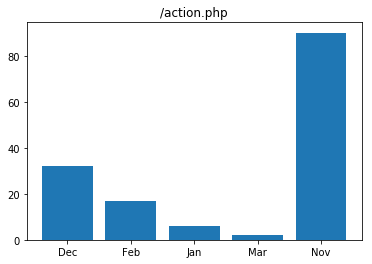

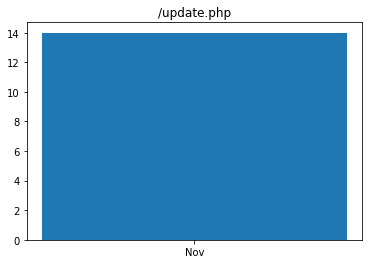

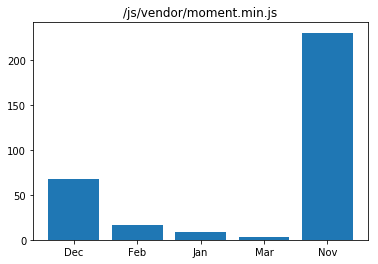

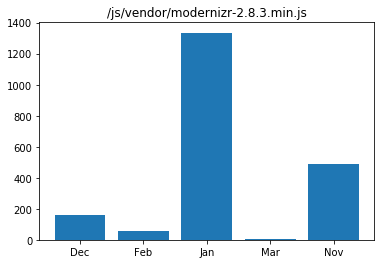

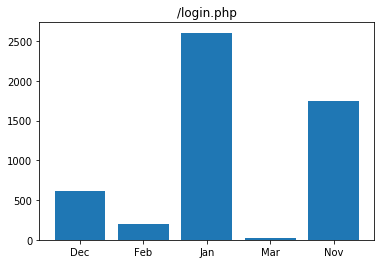

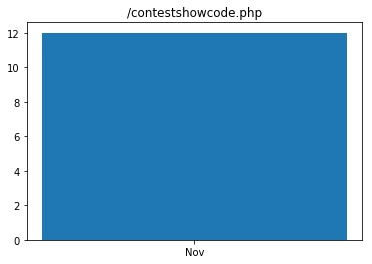

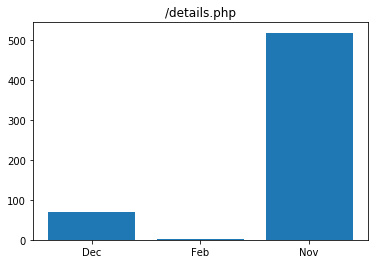

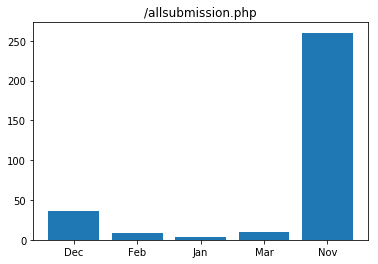

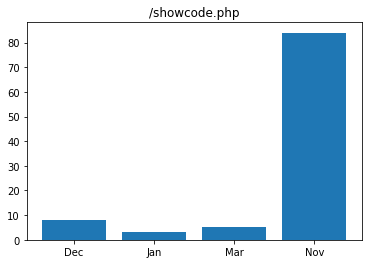

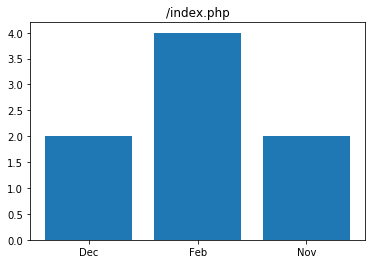

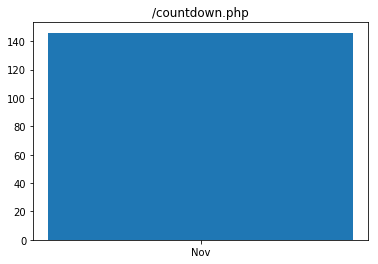

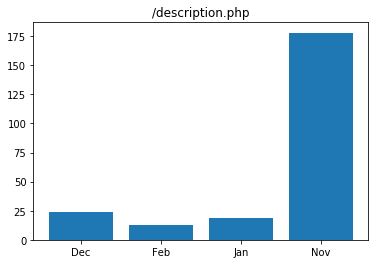

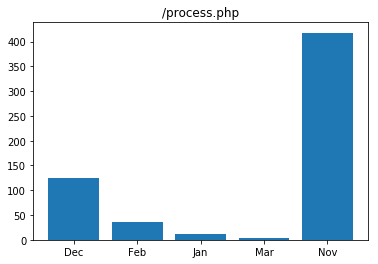

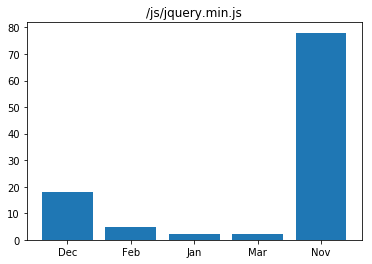

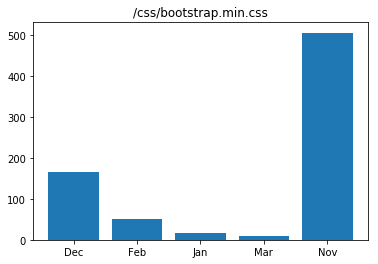

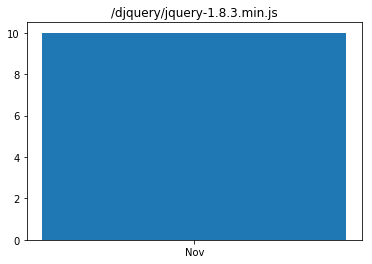

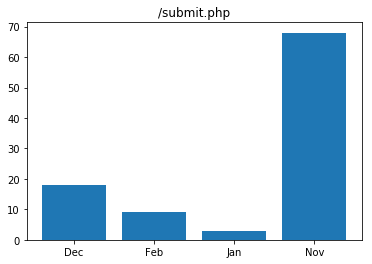

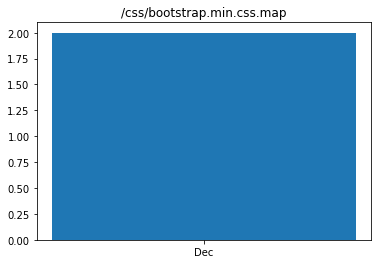

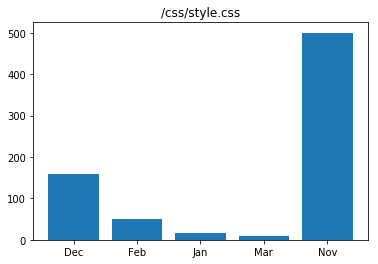

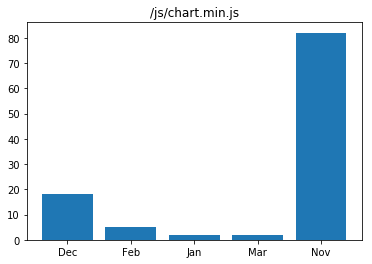

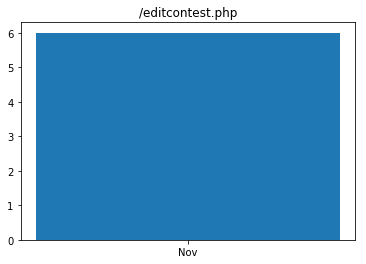

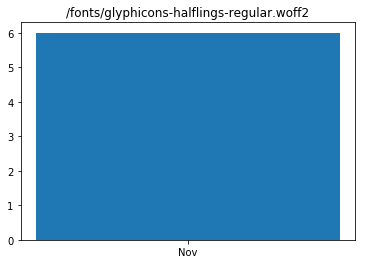

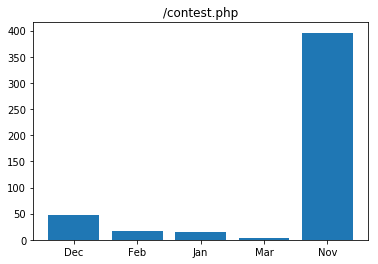

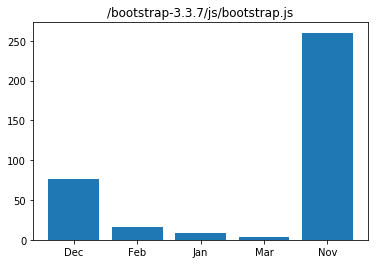

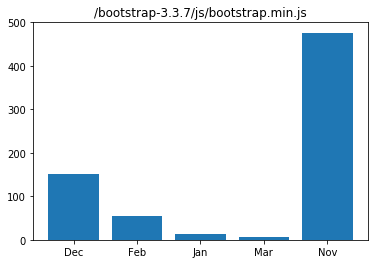

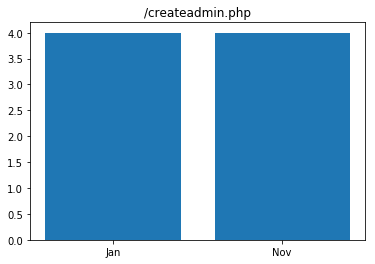

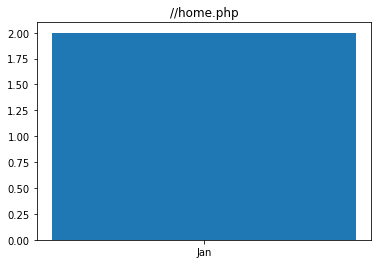

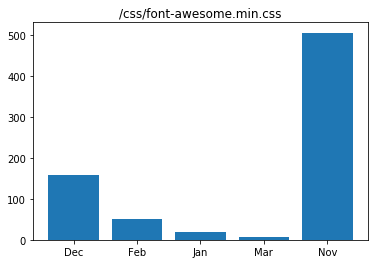

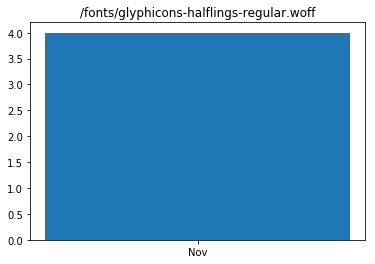

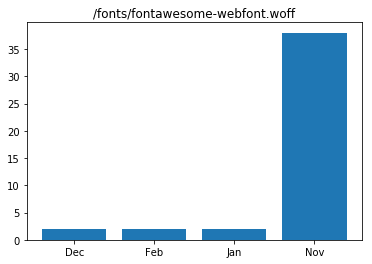

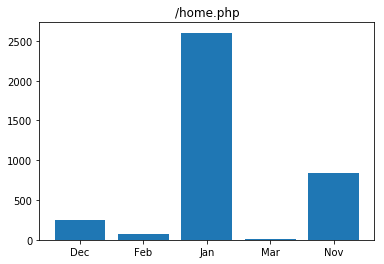

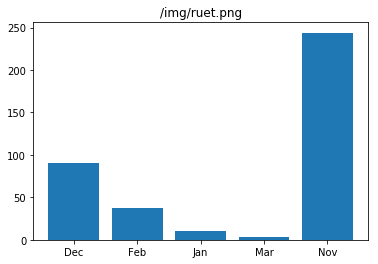

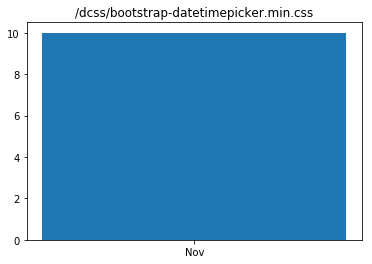

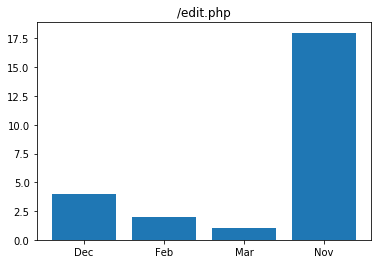

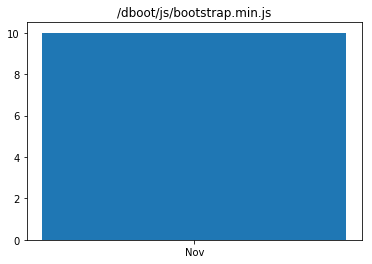

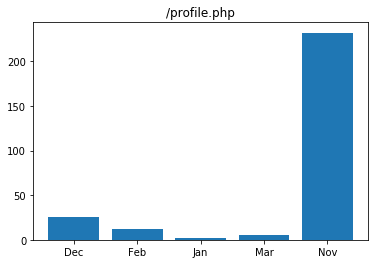

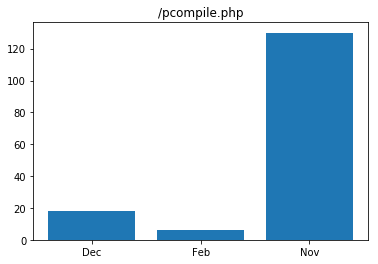

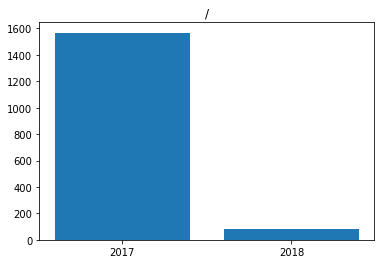

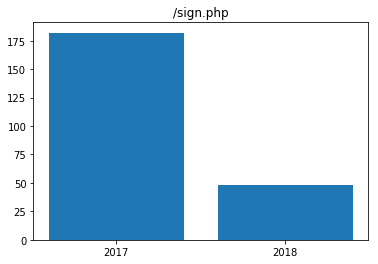

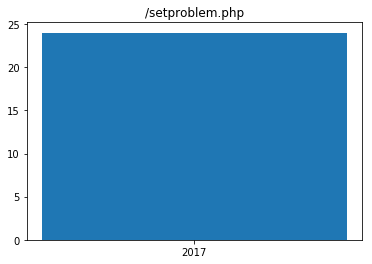

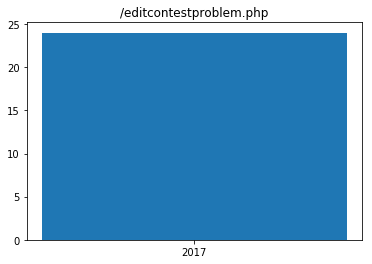

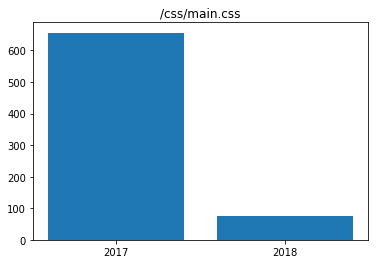

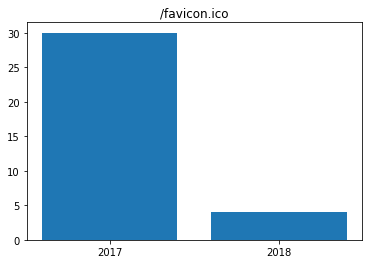

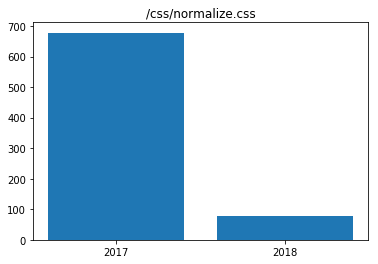

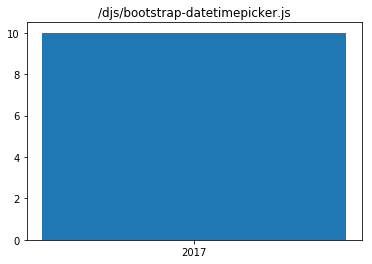

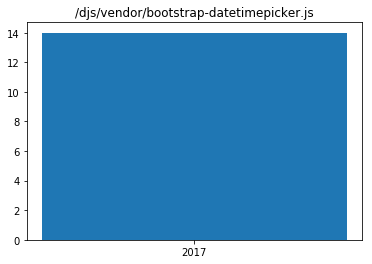

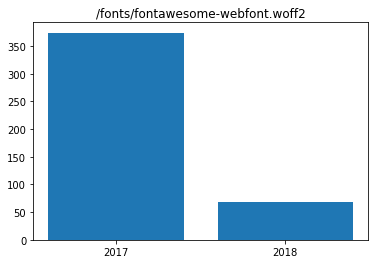

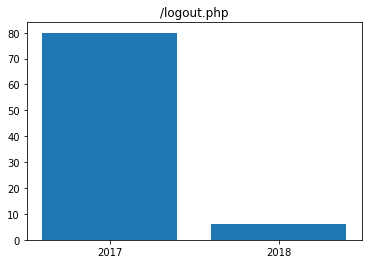

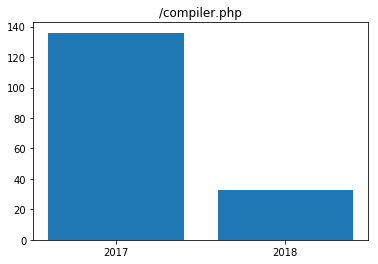

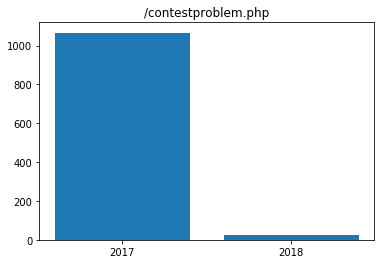

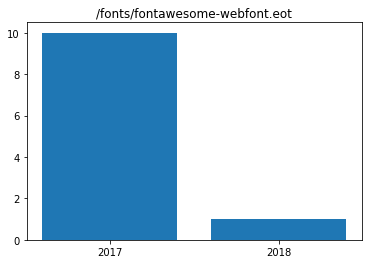

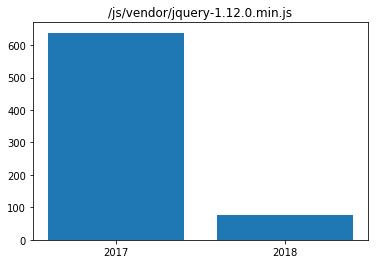

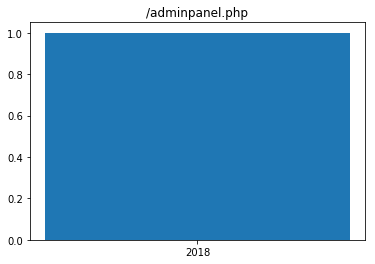

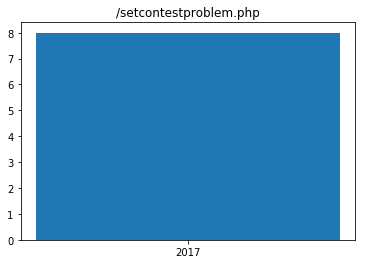

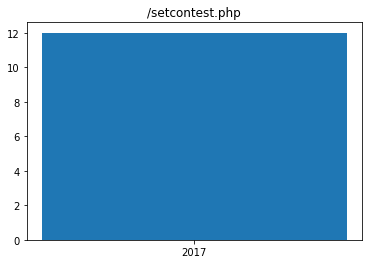

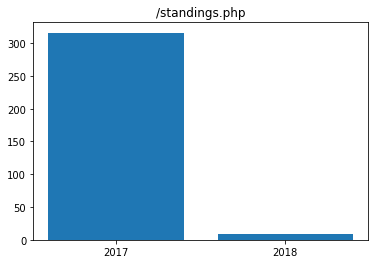

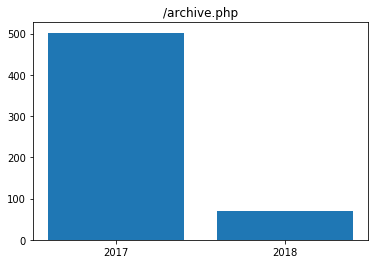

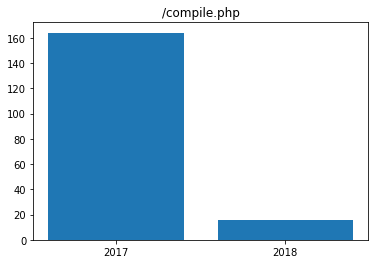

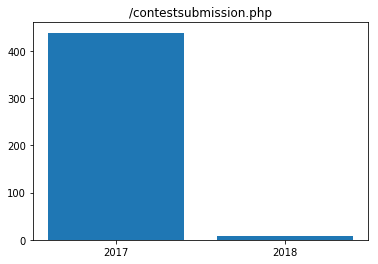

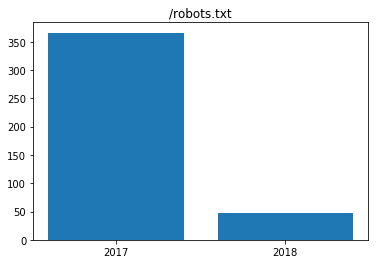

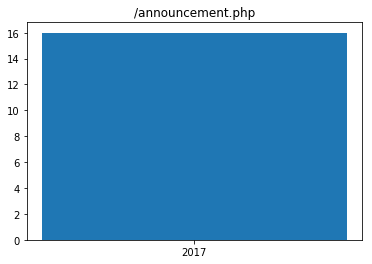

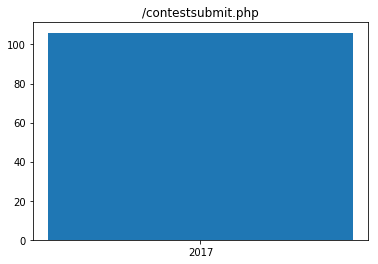

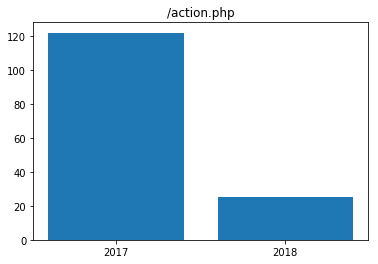

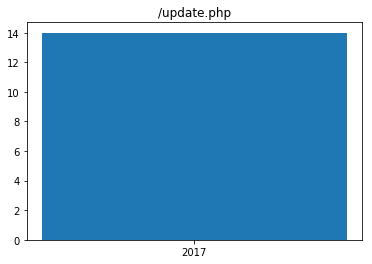

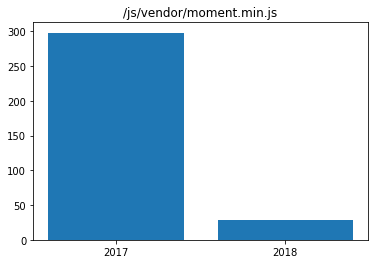

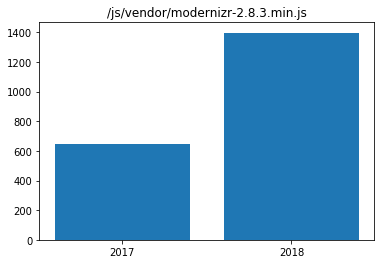

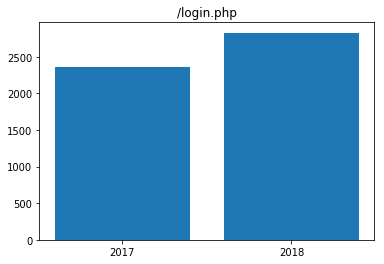

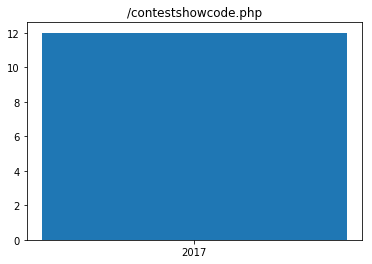

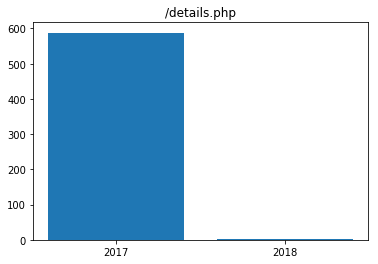

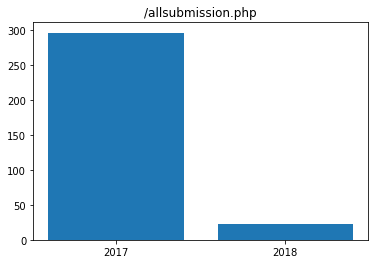

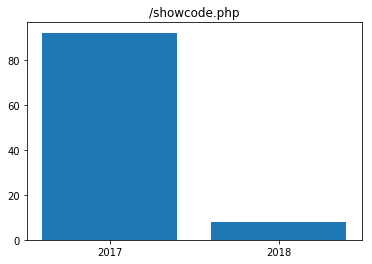

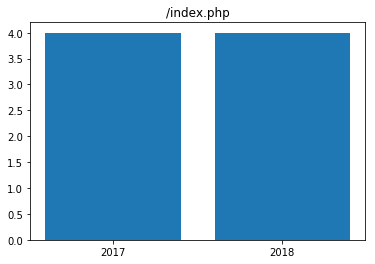

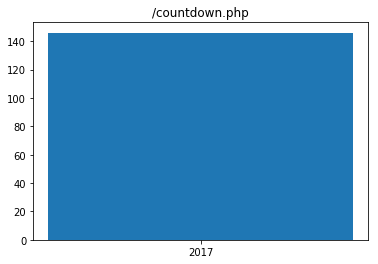

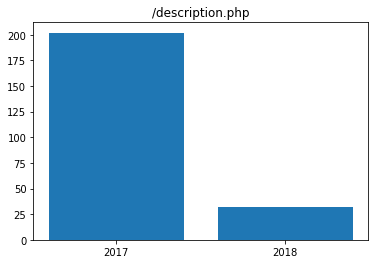

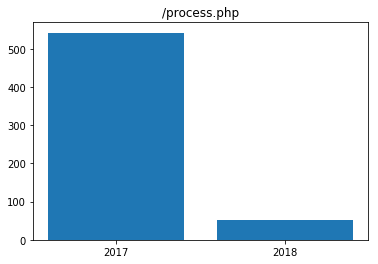

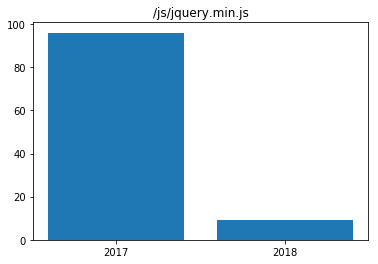

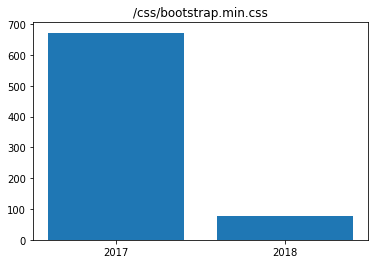

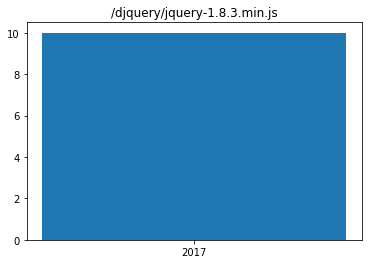

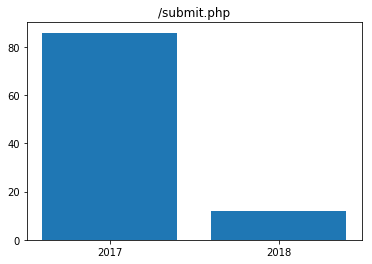

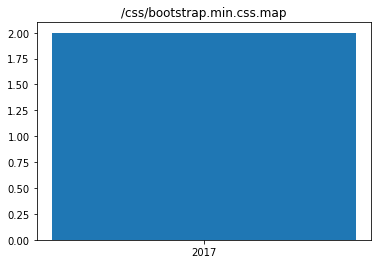

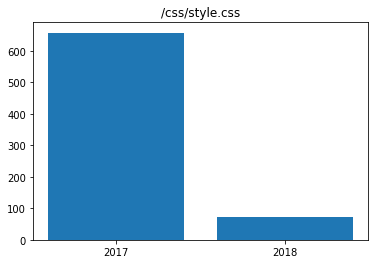

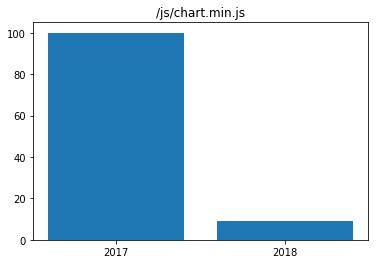

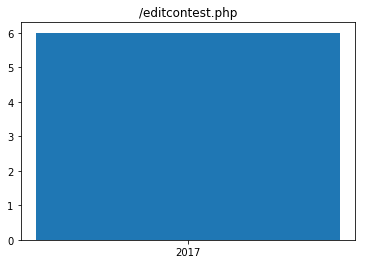

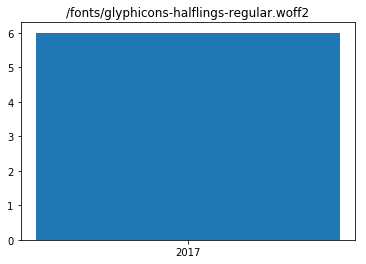

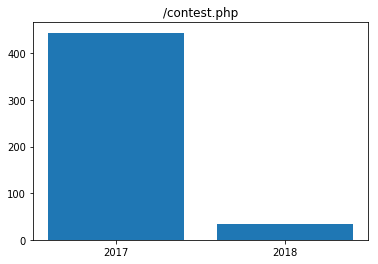

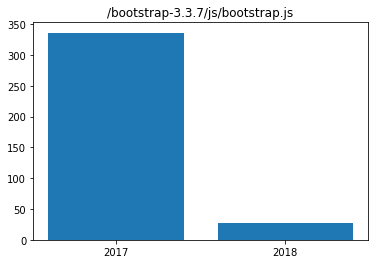

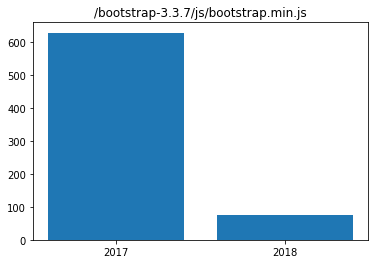

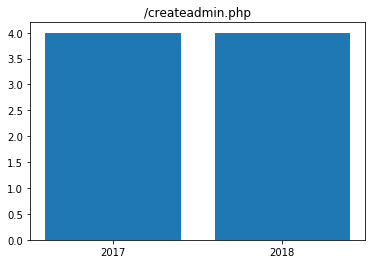

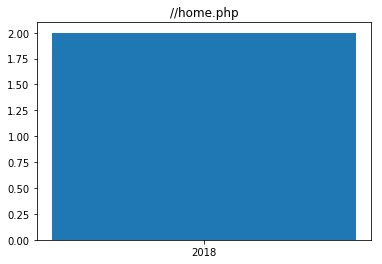

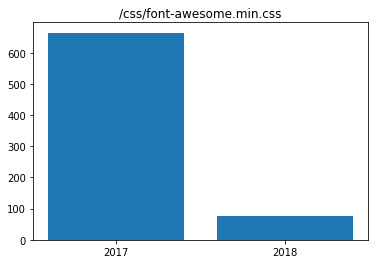

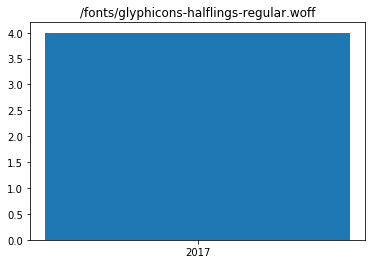

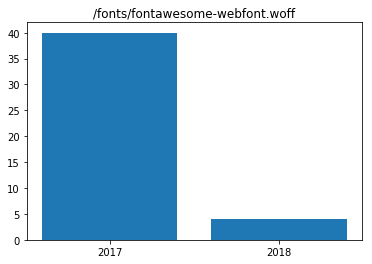

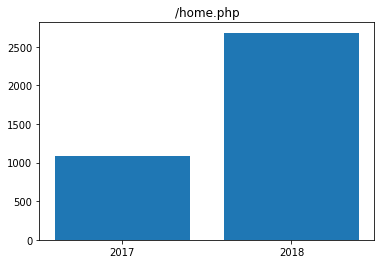

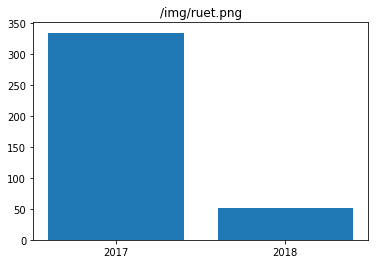

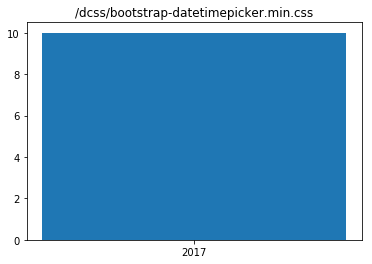

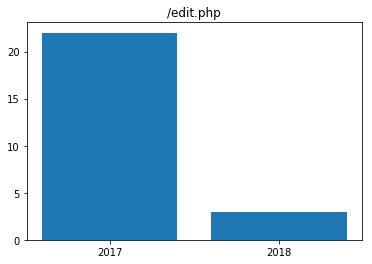

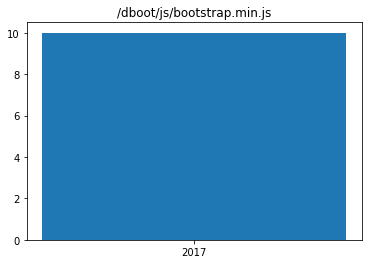

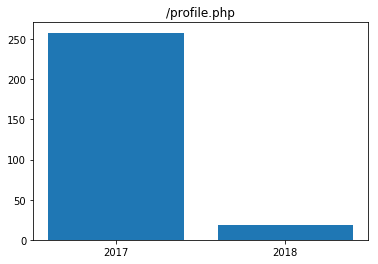

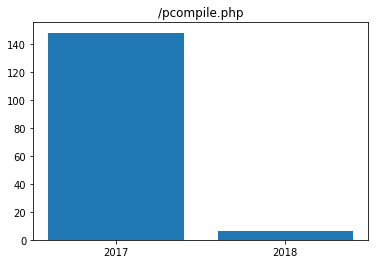

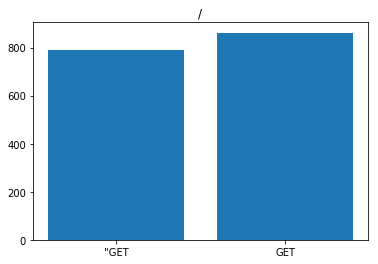

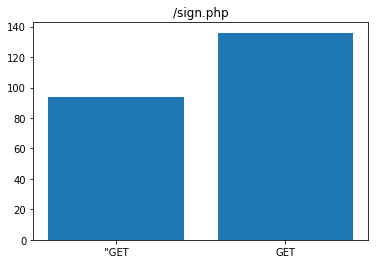

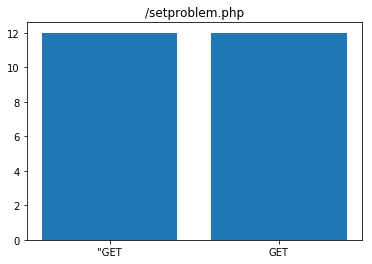

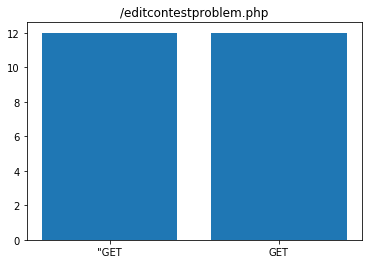

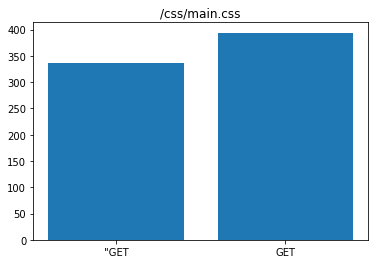

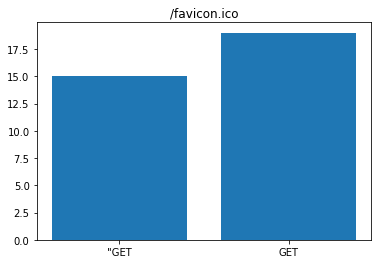

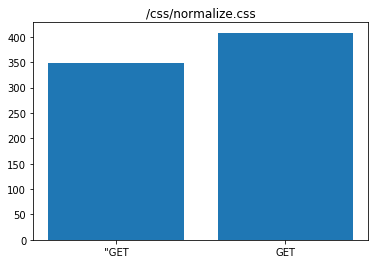

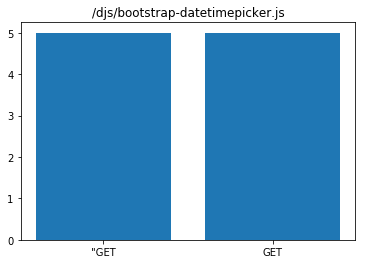

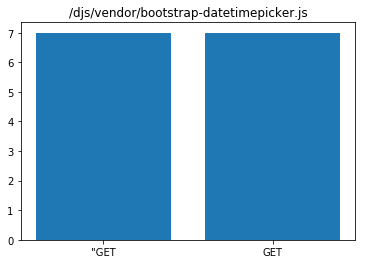

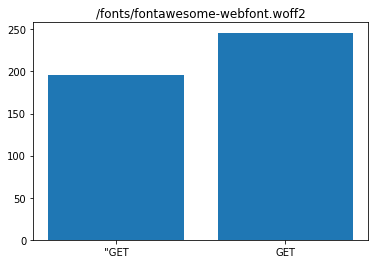

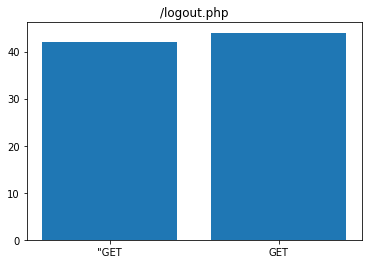

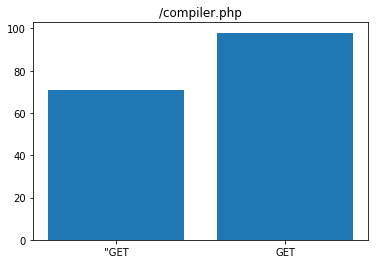

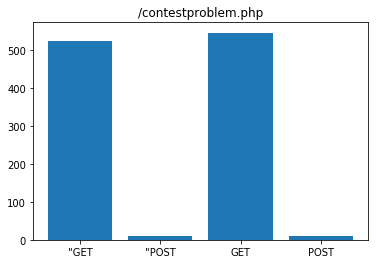

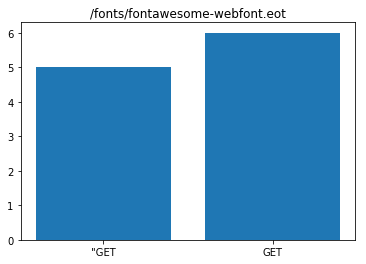

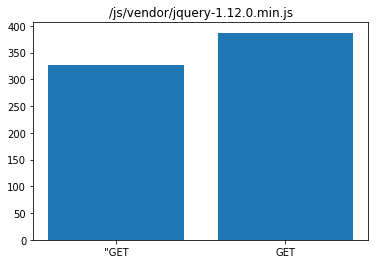

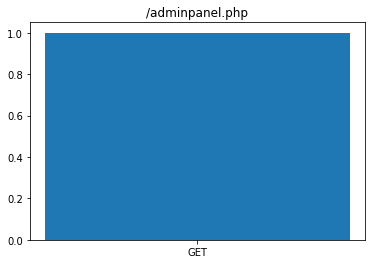

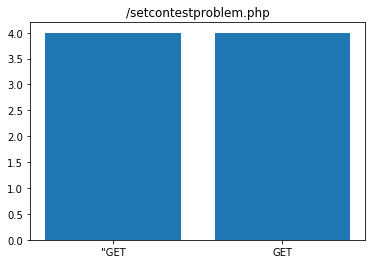

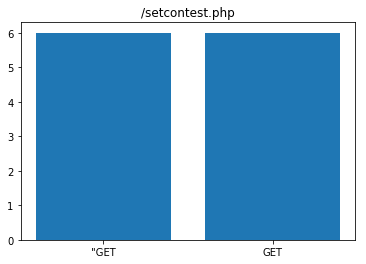

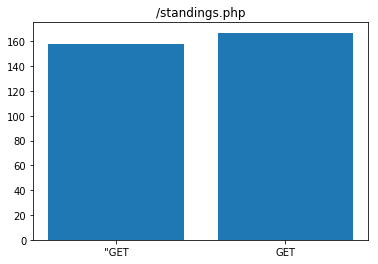

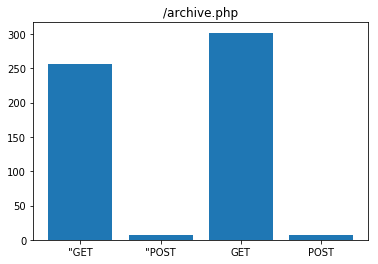

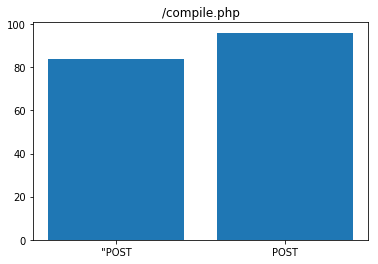

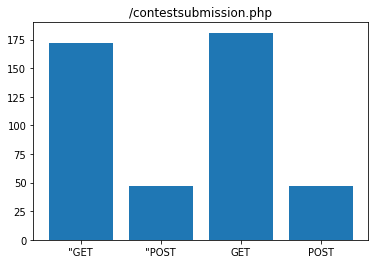

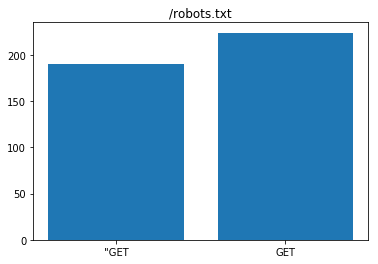

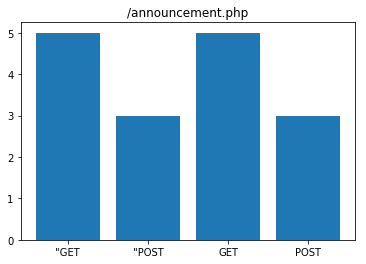

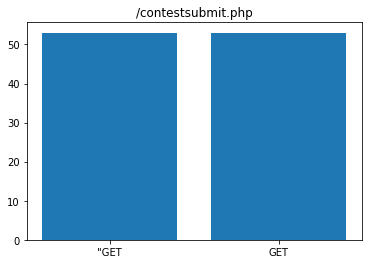

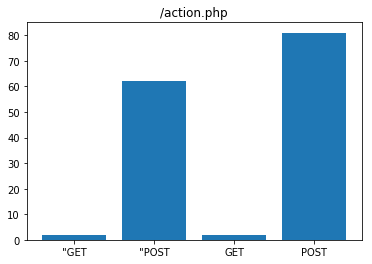

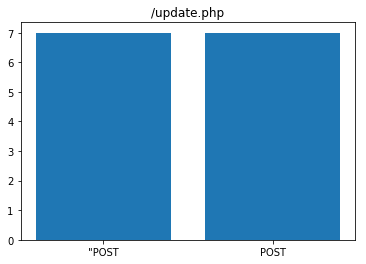

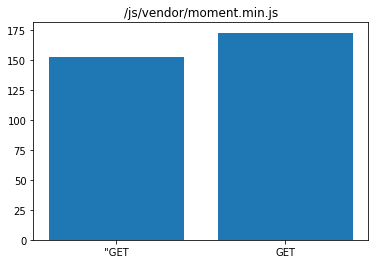

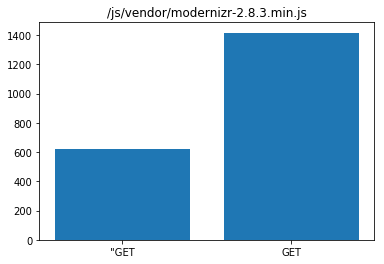

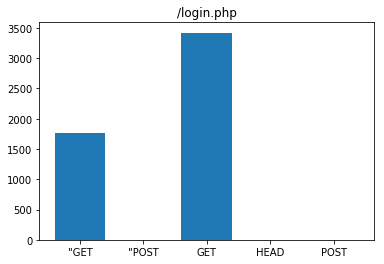

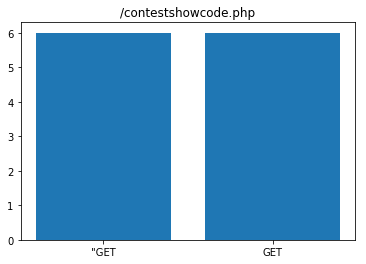

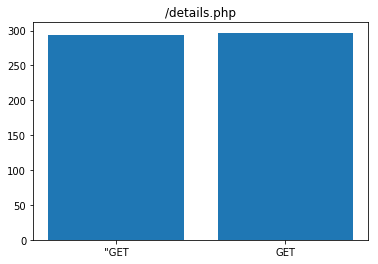

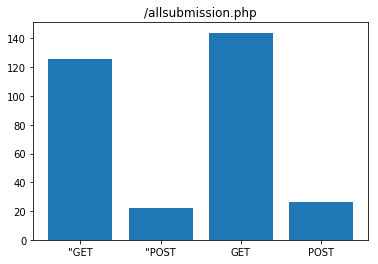

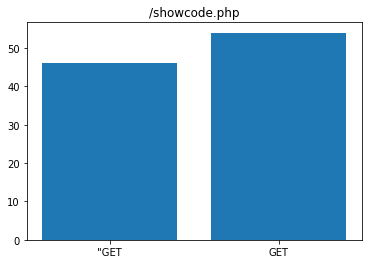

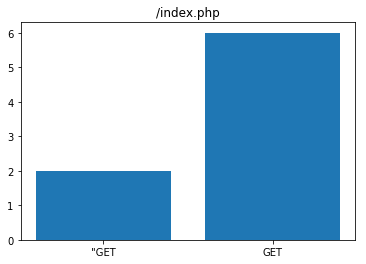

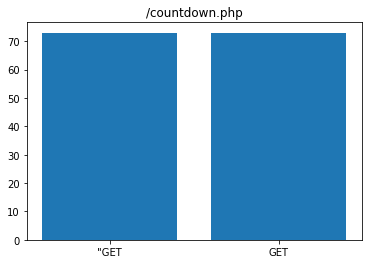

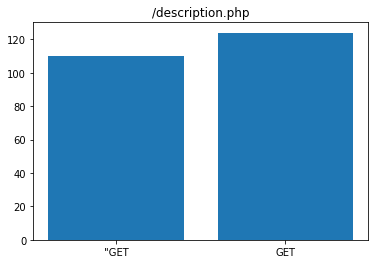

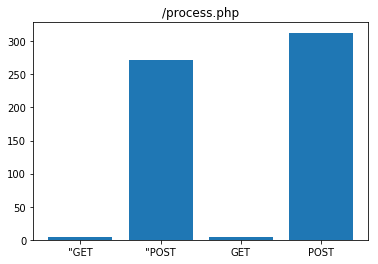

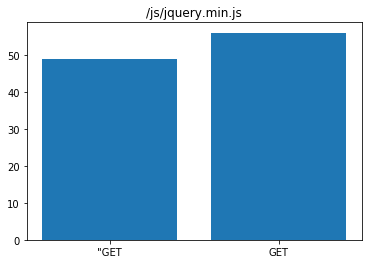

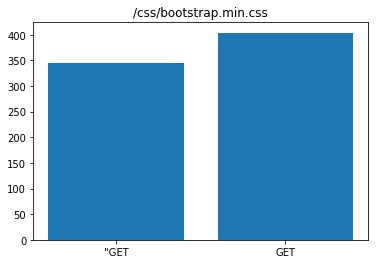

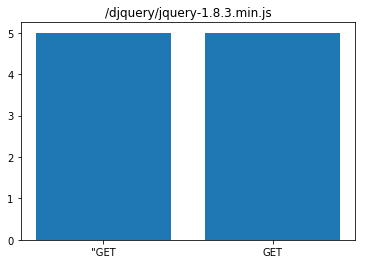

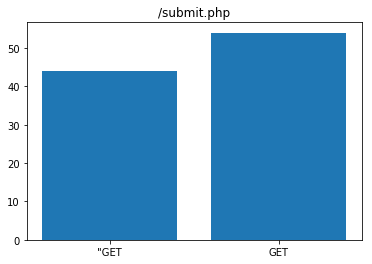

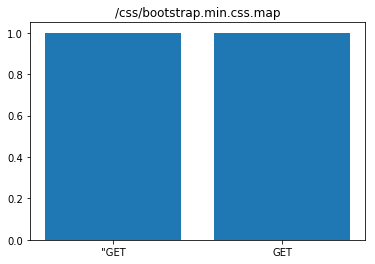

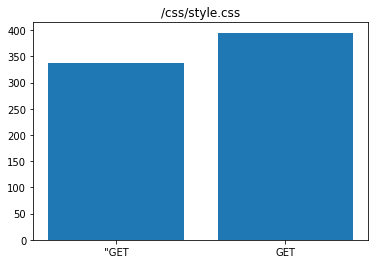

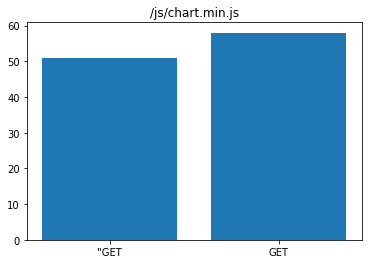

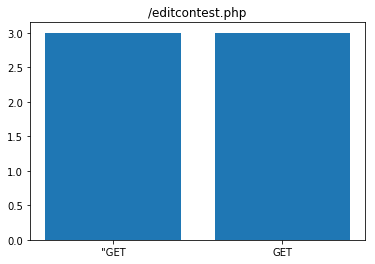

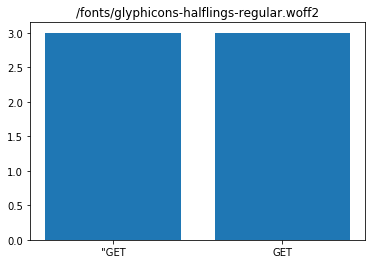

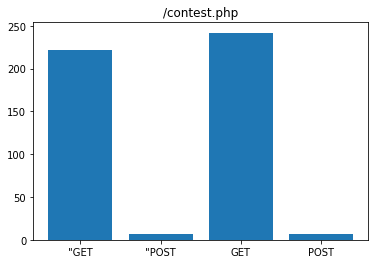

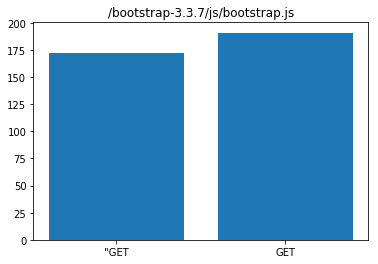

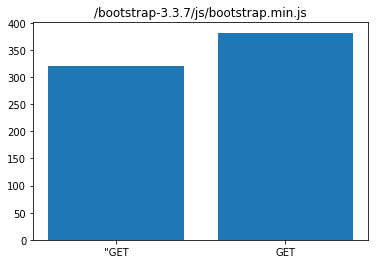

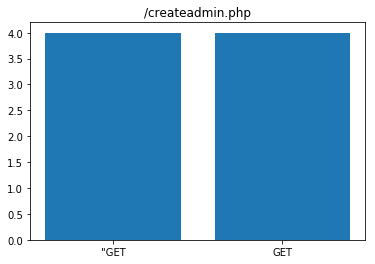

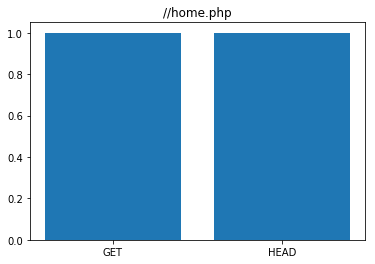

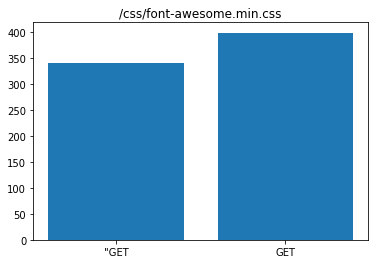

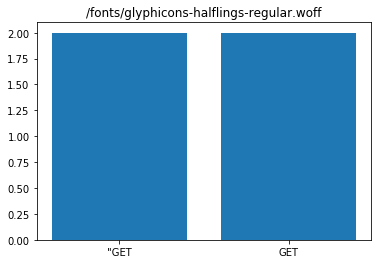

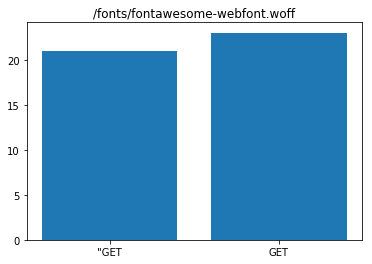

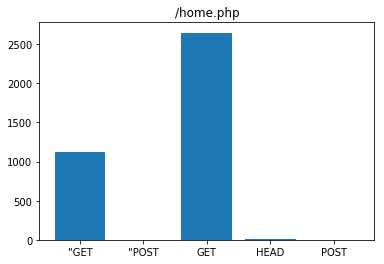

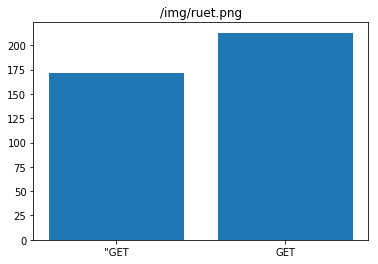

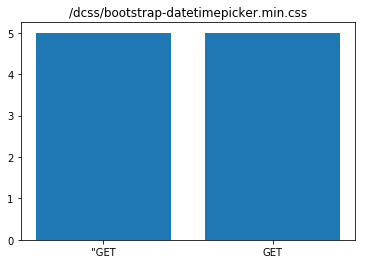

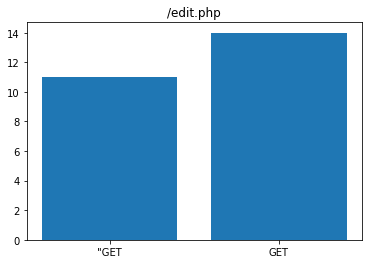

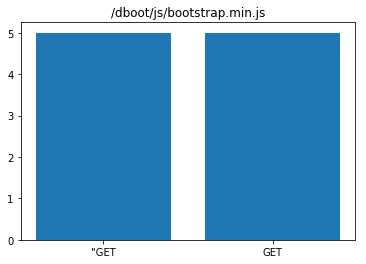

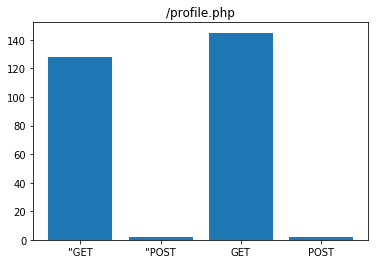

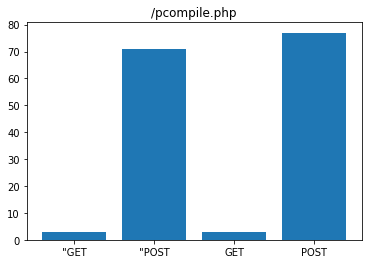

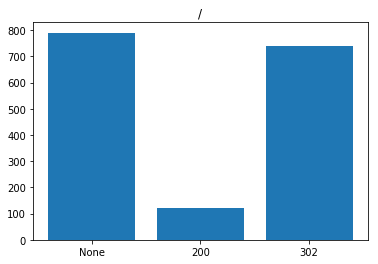

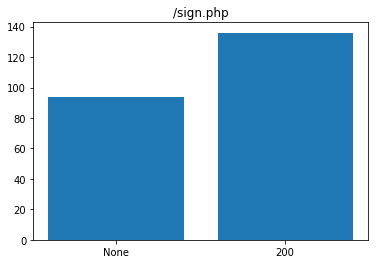

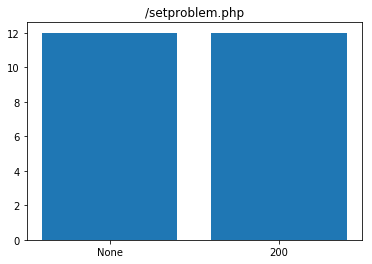

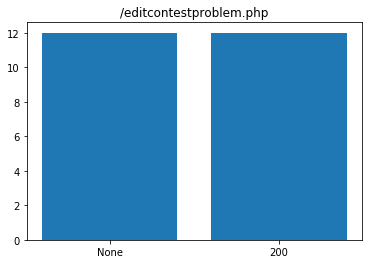

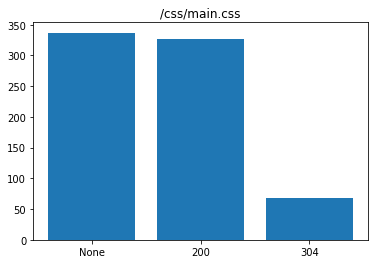

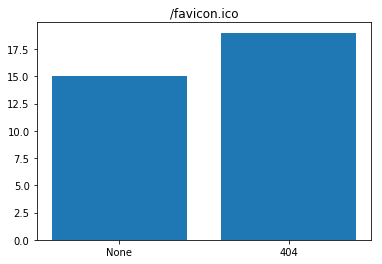

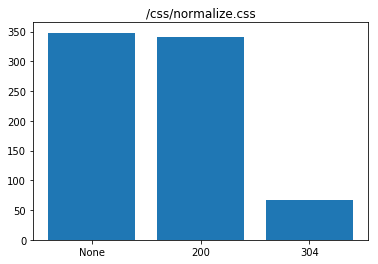

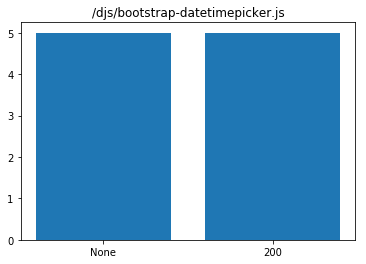

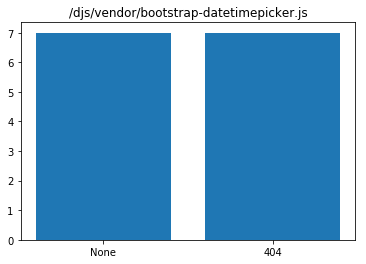

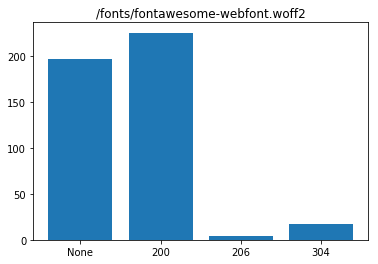

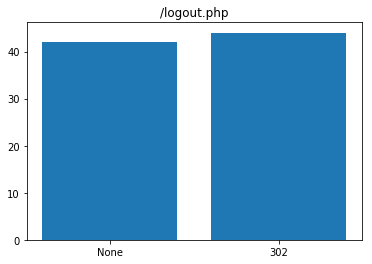

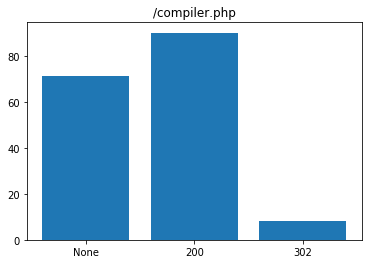

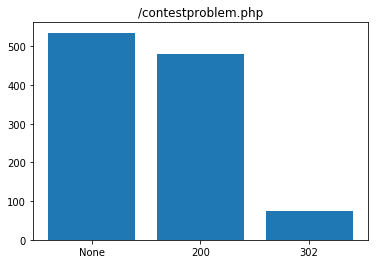

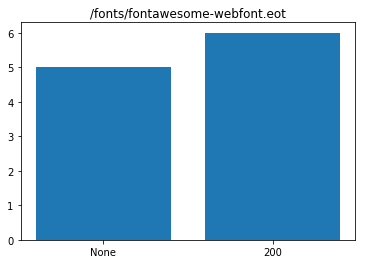

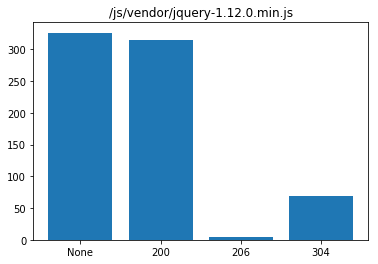

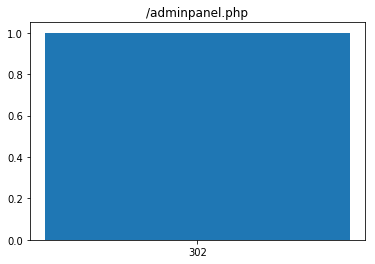

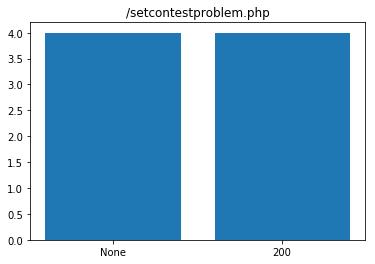

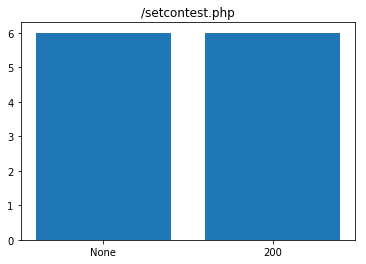

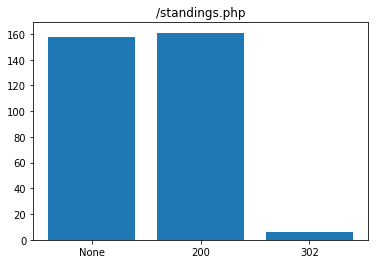

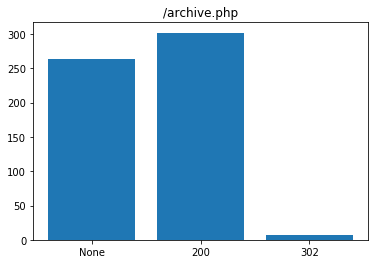

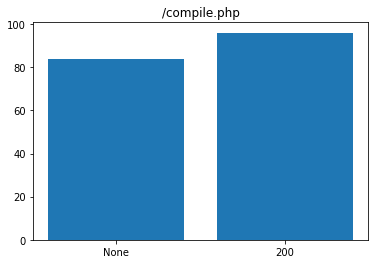

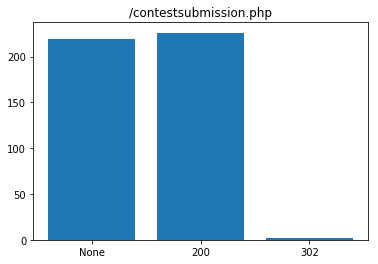

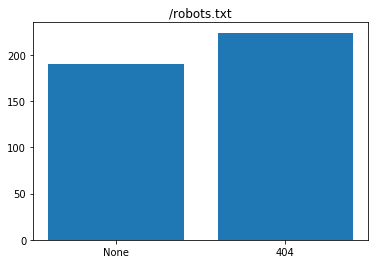

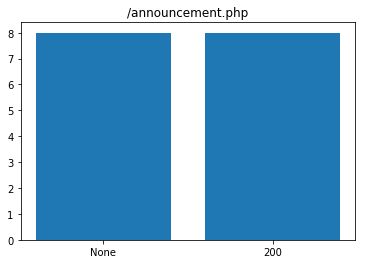

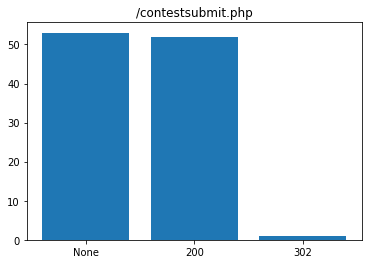

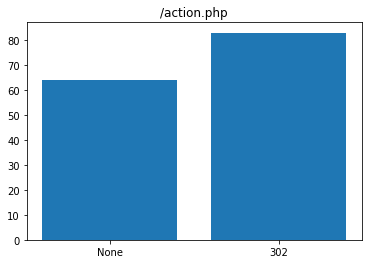

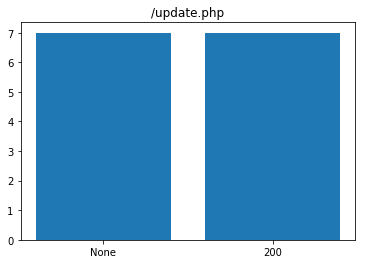

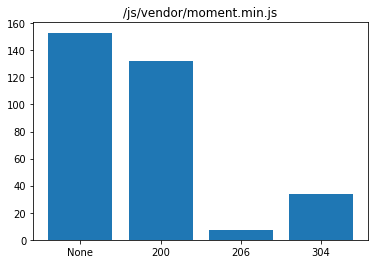

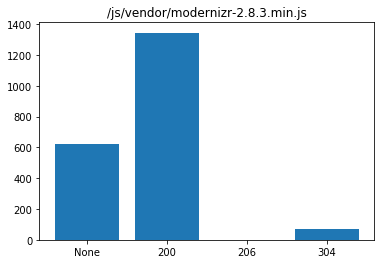

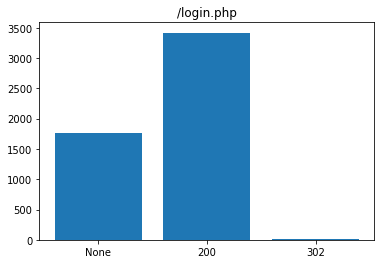

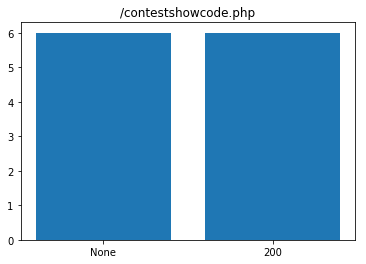

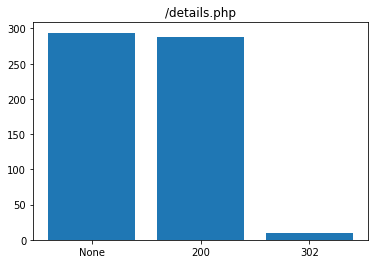

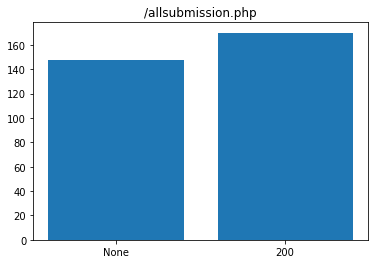

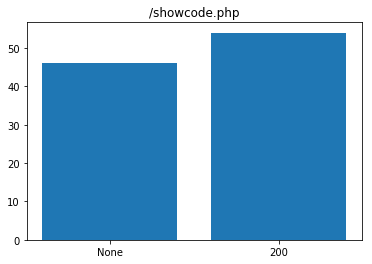

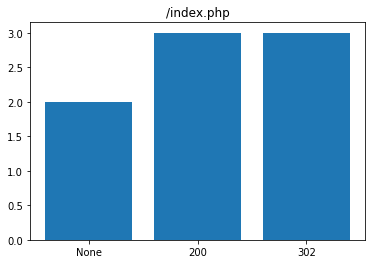

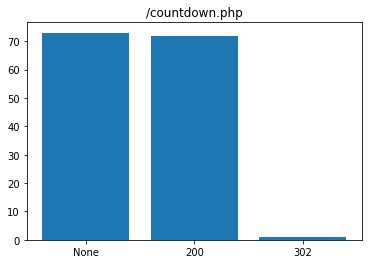

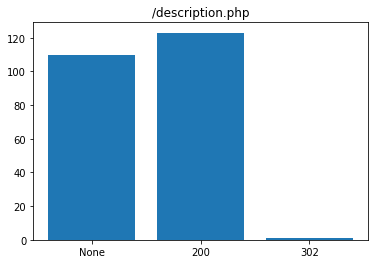

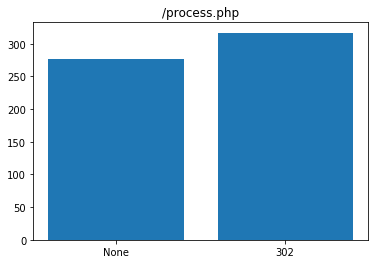

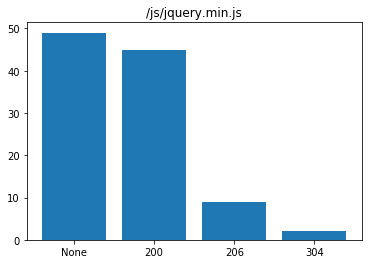

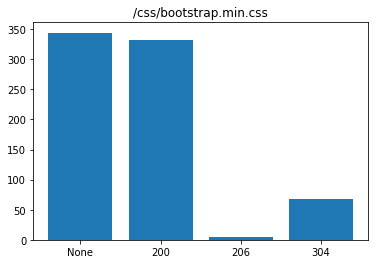

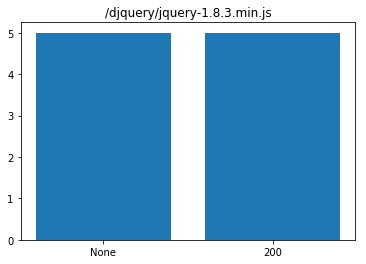

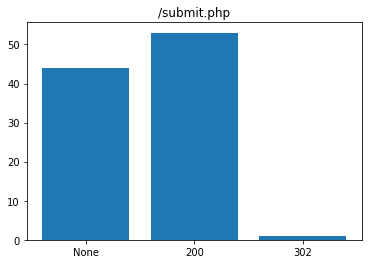

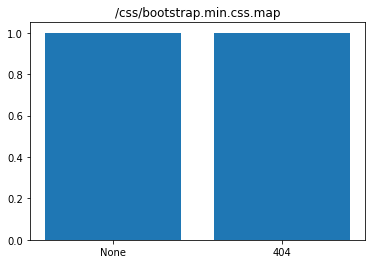

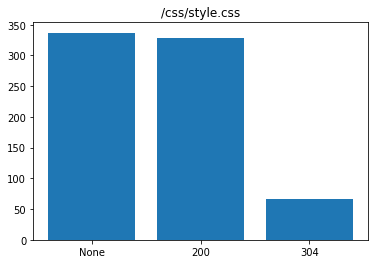

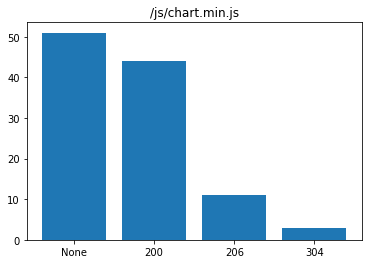

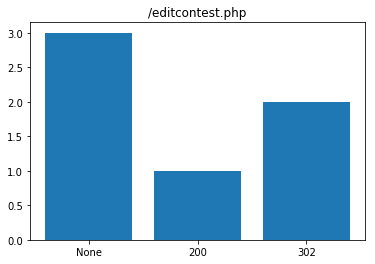

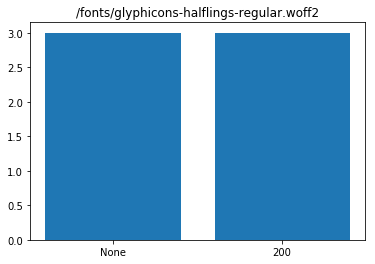

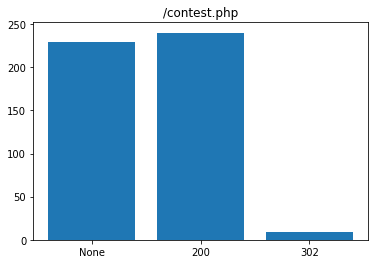

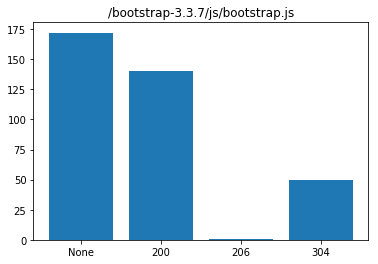

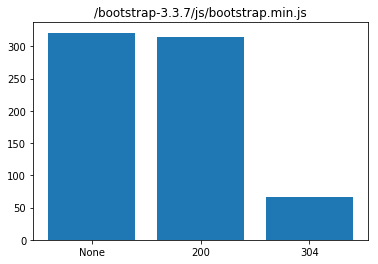

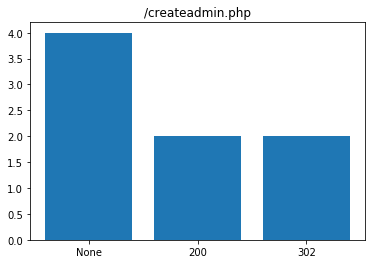

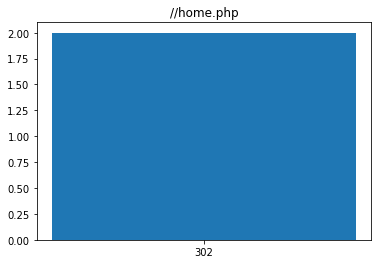

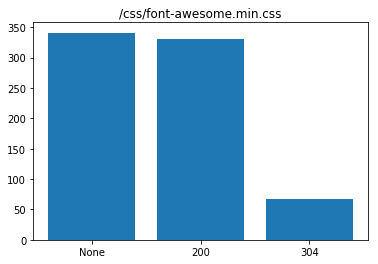

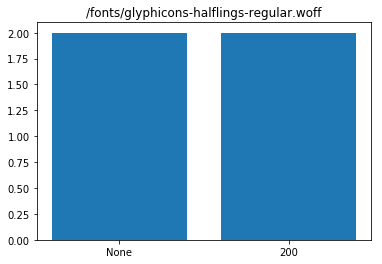

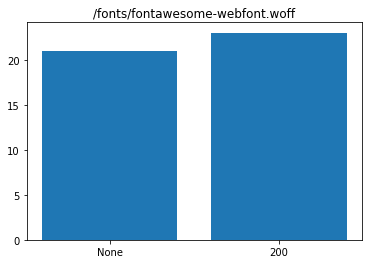

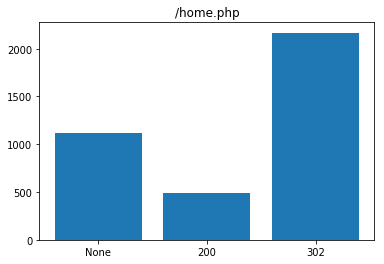

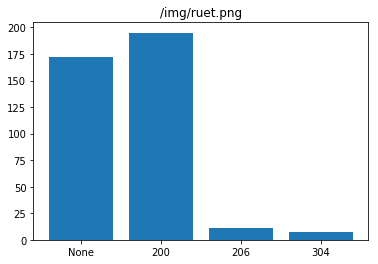

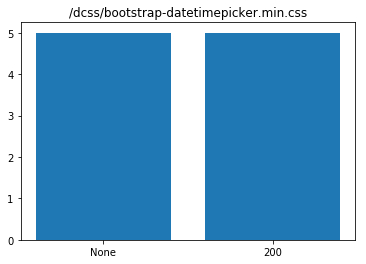

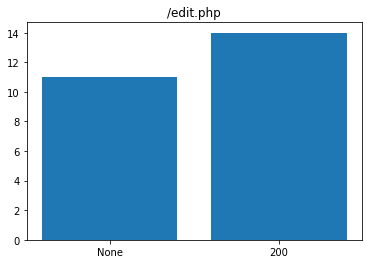

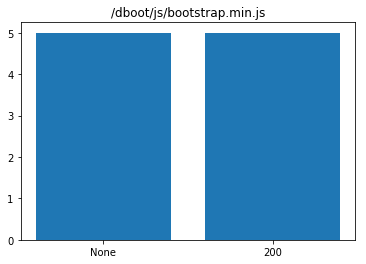

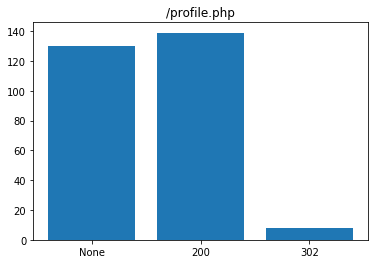

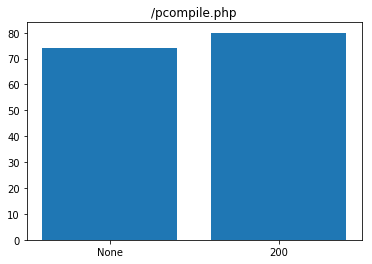

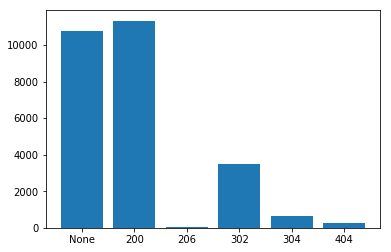

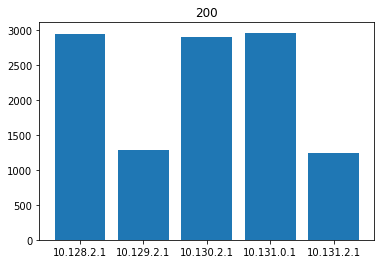

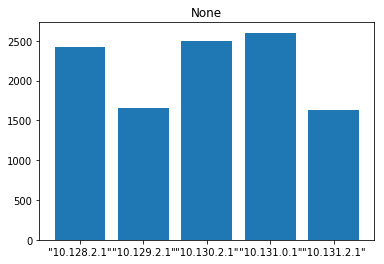

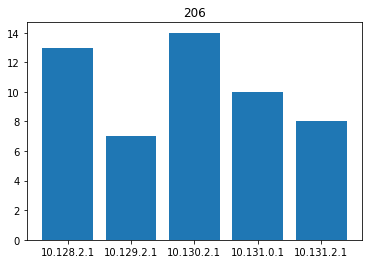

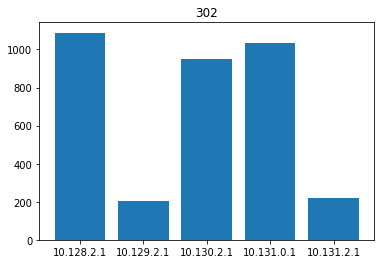

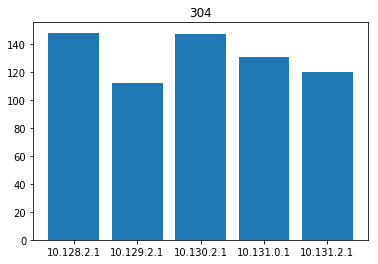

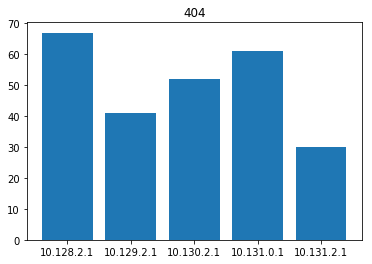

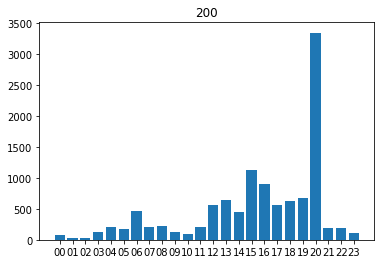

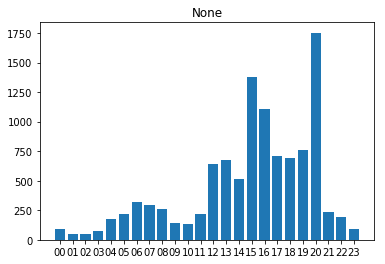

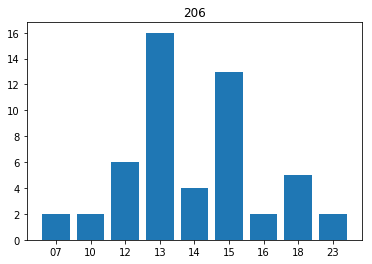

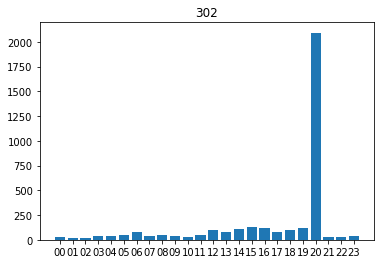

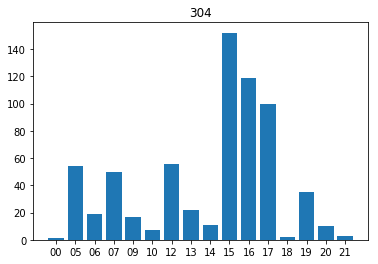

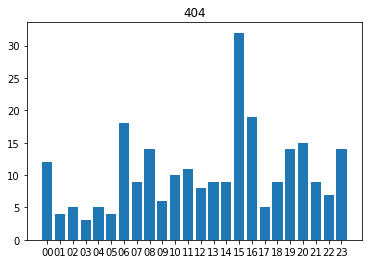

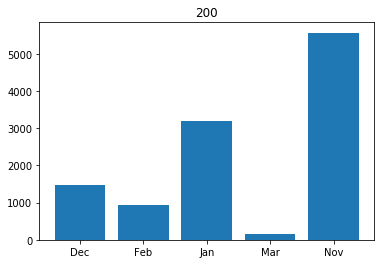

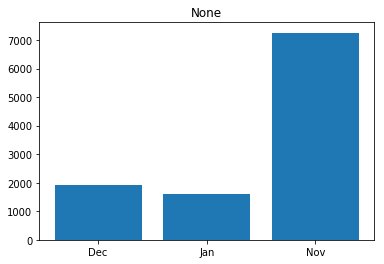

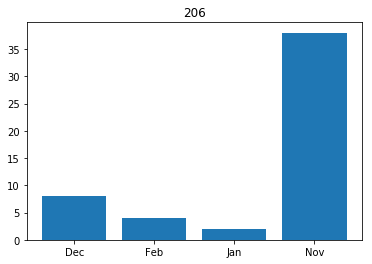

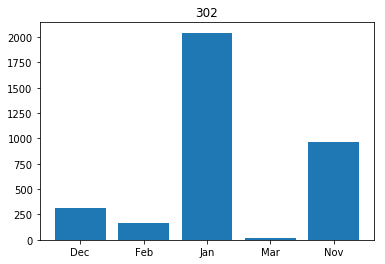

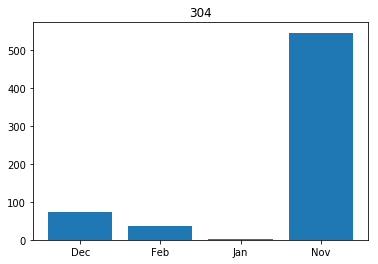

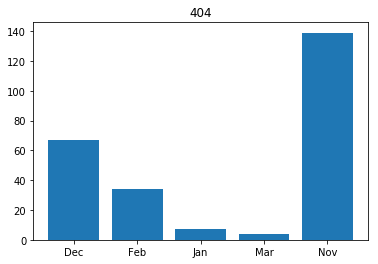

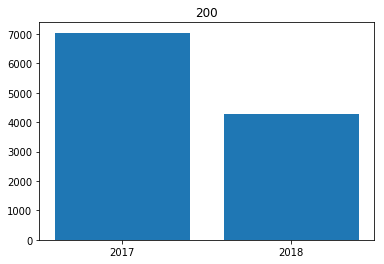

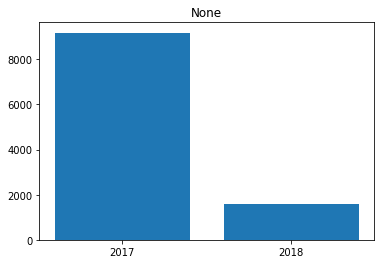

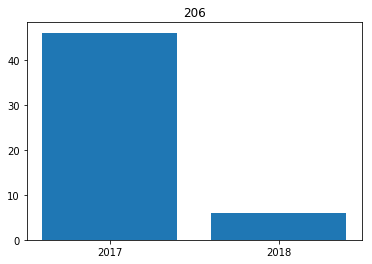

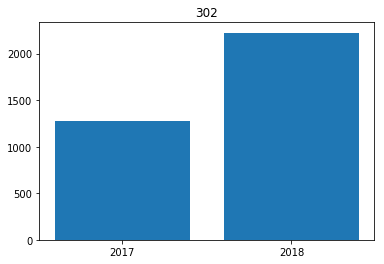

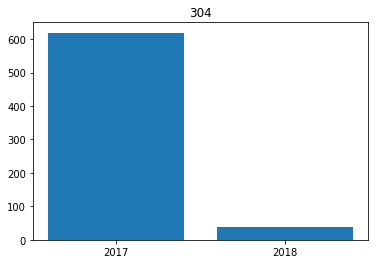

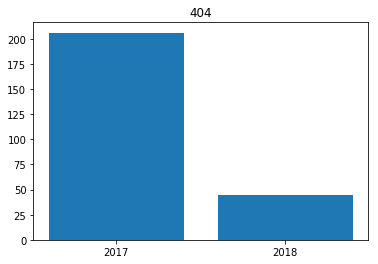

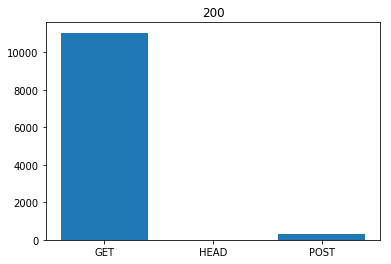

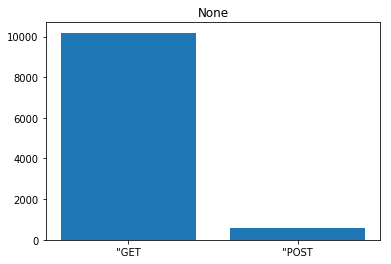

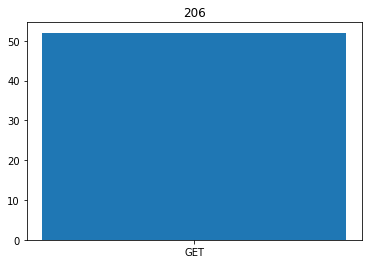

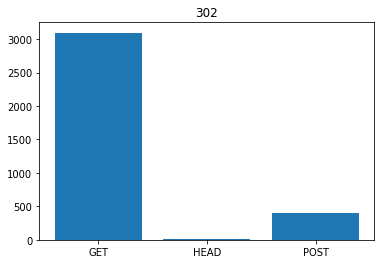

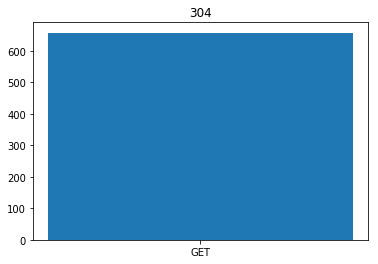

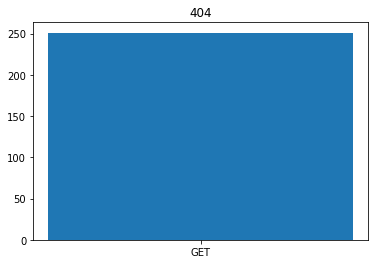

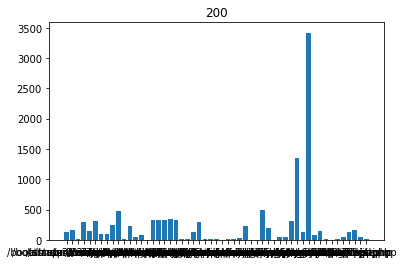

In [ ]:
for i in range(49):
    if i%7==0:
        total_bar(i)
    else:
        detail_bar(i)